In [1]:
%load_ext autoreload

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [3]:
input_folder = "/eos/user/v/vdurupt/reco_comparison/supercluster_regression/electrons"
output_folder = "/eos/user/v/vdurupt/reco_comparison/RecoPlots/RecoComparison_regression_UL18_SCregression/electrons"
os.makedirs(output_folder, exist_ok=True)

In [4]:
reco = "DeepSC_AlgoB"
df_1 = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco}_object.h5py", "r")["df"]
df_2 = pd.HDFStore(f"{input_folder}/ele_UL18_123X_Mustache_object.h5py", "r")["df"]
df_1.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
df_2.rename(columns={"output_object.csv":"obj_index"}, inplace=True)
# df_1.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)
# df_2.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)
df_1 = df_1.iloc[:-1]
df_2 = df_2.iloc[:-1]

# df_join = df_1.merge(df_2, on=["runId","eventId","caloindex"], suffixes=["_old", "_new"],indicator=True)

In [5]:
df_1.loc[df_1.sc_matched==True, "has_sc"] = 1
df_2.loc[df_2.sc_matched==True, "has_sc"] = 1
df_1.loc[df_1.sc_matched==False, "has_sc"] = 0
df_2.loc[df_2.sc_matched==False, "has_sc"] = 0

In [6]:
# Gen-matching study

In [7]:
df_1[df_1.ele_eta<1.566].genmatched

1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
         ...  
15825      1.0
15827   -999.0
15828      1.0
15829      1.0
15831      1.0
Name: genmatched, Length: 12502, dtype: float64

In [8]:
print(f"N. electrons tot in EB (DeepSC): {df_1[df_1.ele_eta<1.566].shape[0]}")
print(f"N. electrons tot in EB (Mustache): {df_2[df_2.ele_eta<1.566].shape[0]}")
print(f"N. electrons with matched SC in EB (DeepSC): {df_1[df_1.ele_eta<1.566].has_sc.sum()}")
print(f"N. electrons with matched SC in EB (Mustache): {df_2[df_2.ele_eta<1.566].has_sc.sum()}")
print(f"N. electrons GenMatched in EB (DeepSC): {df_1[(df_1.ele_eta<1.566)&(df_1.has_sc==1)].genmatched.sum()}")
print(f"N. electrons GenMatched in EB (Mustache): {df_2[(df_2.ele_eta<1.566)&(df_2.has_sc==1)].genmatched.sum()}")

N. electrons tot in EB (DeepSC): 12502
N. electrons tot in EB (Mustache): 12575
N. electrons with matched SC in EB (DeepSC): 10886.0
N. electrons with matched SC in EB (Mustache): 10941.0
N. electrons GenMatched in EB (DeepSC): 10258.0
N. electrons GenMatched in EB (Mustache): 10207.0


In [9]:
print(f"N. electrons tot in EE (DeepSC): {df_1[df_1.ele_eta>1.566].shape[0]}")
print(f"N. electrons tot in EE (Mustache): {df_2[df_2.ele_eta>1.566].shape[0]}")
print(f"N. electrons with matched SC in EE (DeepSC): {df_1[df_1.ele_eta>1.566].has_sc.sum()}")
print(f"N. electrons with matched SC in EE (Mustache): {df_2[df_2.ele_eta>1.566].has_sc.sum()}")
print(f"N. electrons GenMatched in EE (DeepSC): {df_1[(df_1.ele_eta>1.566)&(df_1.has_sc==1)].genmatched.sum()}")
print(f"N. electrons GenMatched in EE (Mustache): {df_2[(df_2.ele_eta>1.566)&(df_2.has_sc==1)].genmatched.sum()}")

N. electrons tot in EE (DeepSC): 3330
N. electrons tot in EE (Mustache): 3323
N. electrons with matched SC in EE (DeepSC): 3038.0
N. electrons with matched SC in EE (Mustache): 3034.0
N. electrons GenMatched in EE (DeepSC): 2809.0
N. electrons GenMatched in EE (Mustache): 2798.0


In [10]:
# Plotting basic distribution to compare matched and not-matched electrons

In [11]:
def plot_distribution(var, label, bins, xrange, output_folder, ylog=False, split_EEEB='Inclusive'):
    os.makedirs(output_folder, exist_ok=True)
#    os.system(f"cp /eos/user/d/dvalsecc/www/index.php {output_folder}")
    
    fig = plt.figure(figsize=(17,9), dpi=200)
    gs = fig.add_gridspec(2,2, hspace=0.05, height_ratios=[0.75,0.25])
    axs = gs.subplots(sharex=True)
    plt.subplots_adjust(wspace=0.3)
    
    ax =  axs[0][0]
    axr =  axs[1][0]
    az = axs[0][1]
    azr =  axs[1][1]
    
    if split_EEEB == "EB":
        B, binX, _ = ax.hist(df_2[(df_2.genmatched!=1)&(df_2.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        A, binX, _ = ax.hist(df_1[(df_1.genmatched!=1)&(df_1.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC", histtype='step', linewidth=2)
    elif split_EEEB == "EE":
        B, binX, _ = ax.hist(df_2[(df_2.genmatched!=1)&(df_2.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        A, binX, _ = ax.hist(df_1[(df_1.genmatched!=1)&(df_1.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC", histtype='step', linewidth=2)
    elif split_EEEB == "Inclusive":
        B, binX, _ = ax.hist(df_2[(df_2.genmatched!=1)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        A, binX, _ = ax.hist(df_1[(df_1.genmatched!=1)][var], 
                             bins=bins, range=xrange, label="DeepSC", histtype='step', linewidth=2)
    ax.legend()
    axr.set_xlabel(label)
    ax.text(0.1,0.8, f"Not-matched\nelectron\n{split_EEEB}", transform=ax.transAxes, fontsize=18)
    hep.cms.label(rlabel="14 TeV", loc=0, ax=ax) 
    if ylog:
        ax.set_ylim(max(min(A), 1e-3), max(A)*500)
        ax.set_yscale("log")
    else:
        ax.set_ylim(0, max(A)*1.4)

    errA = np.sqrt(A)
    errB = np.sqrt(B)
    errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)

    axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
                                fmt=".", linestyle='none', elinewidth=1, c="black")

    deltaM = np.max(np.abs((A/B)-1))
    if np.isnan(deltaM):
        deltaM = 2

    axr.set_ylim(1-deltaM*1.2, 1+deltaM*1.2)
    axr.set_ylabel("D/M")
    axr.grid(which="both",axis="y")
    axr.plot([binX[0], binX[-2]], [1.,1.], linewidth=2, c="black")


    if split_EEEB == "EB":
        B, binX, _ = az.hist(df_2[(df_2.genmatched==1)&(df_2.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        A, binX, _ = az.hist(df_1[(df_1.genmatched==1)&(df_1.ele_eta.abs()<1.4442)][var], 
                             bins=bins, range=xrange, label="DeepSC", histtype='step', linewidth=2)
    elif split_EEEB == "EE":
        B, binX, _ = az.hist(df_2[(df_2.genmatched==1)&(df_2.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        A, binX, _ = az.hist(df_1[(df_1.genmatched==1)&(df_1.ele_eta.abs()>1.566)][var], 
                             bins=bins, range=xrange, label="DeepSC", histtype='step', linewidth=2)
    elif split_EEEB == "Inclusive":
        B, binX, _ = az.hist(df_2[(df_2.genmatched==1)][var], 
                             bins=bins, range=xrange, label="Mustache", histtype='step', linewidth=2)
        A, binX, _ = az.hist(df_1[(df_1.genmatched==1)][var], 
                             bins=bins, range=xrange, label="DeepSC", histtype='step', linewidth=2)
    az.legend()
    azr.set_xlabel(label)
    az.text(0.1,0.8, f"GEN-matched\nelectrons\n{split_EEEB}", transform=az.transAxes,fontsize=18)
    hep.cms.label(rlabel="14 TeV", loc=0, ax=az) 
    if ylog:
        az.set_ylim(max(min(A), 1e-3), max(A)*100)
        az.set_yscale("log")
    else:
        az.set_ylim(0, max(A)*1.4)

    errA = np.sqrt(A)
    errB = np.sqrt(B)
    errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)

    azr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
                                fmt=".", linestyle='none', elinewidth=1,c="black")
    azr.grid(which="both",axis="y")
    azr.plot([binX[0], binX[-2]], [1.,1.], linewidth=2, c="black")
    azr.set_ylabel("D/M")
    deltaM = np.max(np.abs((A/B)-1))
    if np.isnan(deltaM):
        deltaM = 2
    azr.set_ylim(1-deltaM*1.2, 1+deltaM*1.2)

    fig.savefig(output_folder + f"/{var}_{split_EEEB}_matched_notmatched_comparison.png")
    fig.savefig(output_folder + f"/{var}_{split_EEEB}matched_notmatched_comparison.pdf")
    fig.savefig(output_folder + f"/{var}_{split_EEEB}matched_notmatched_comparison.svg")
    

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

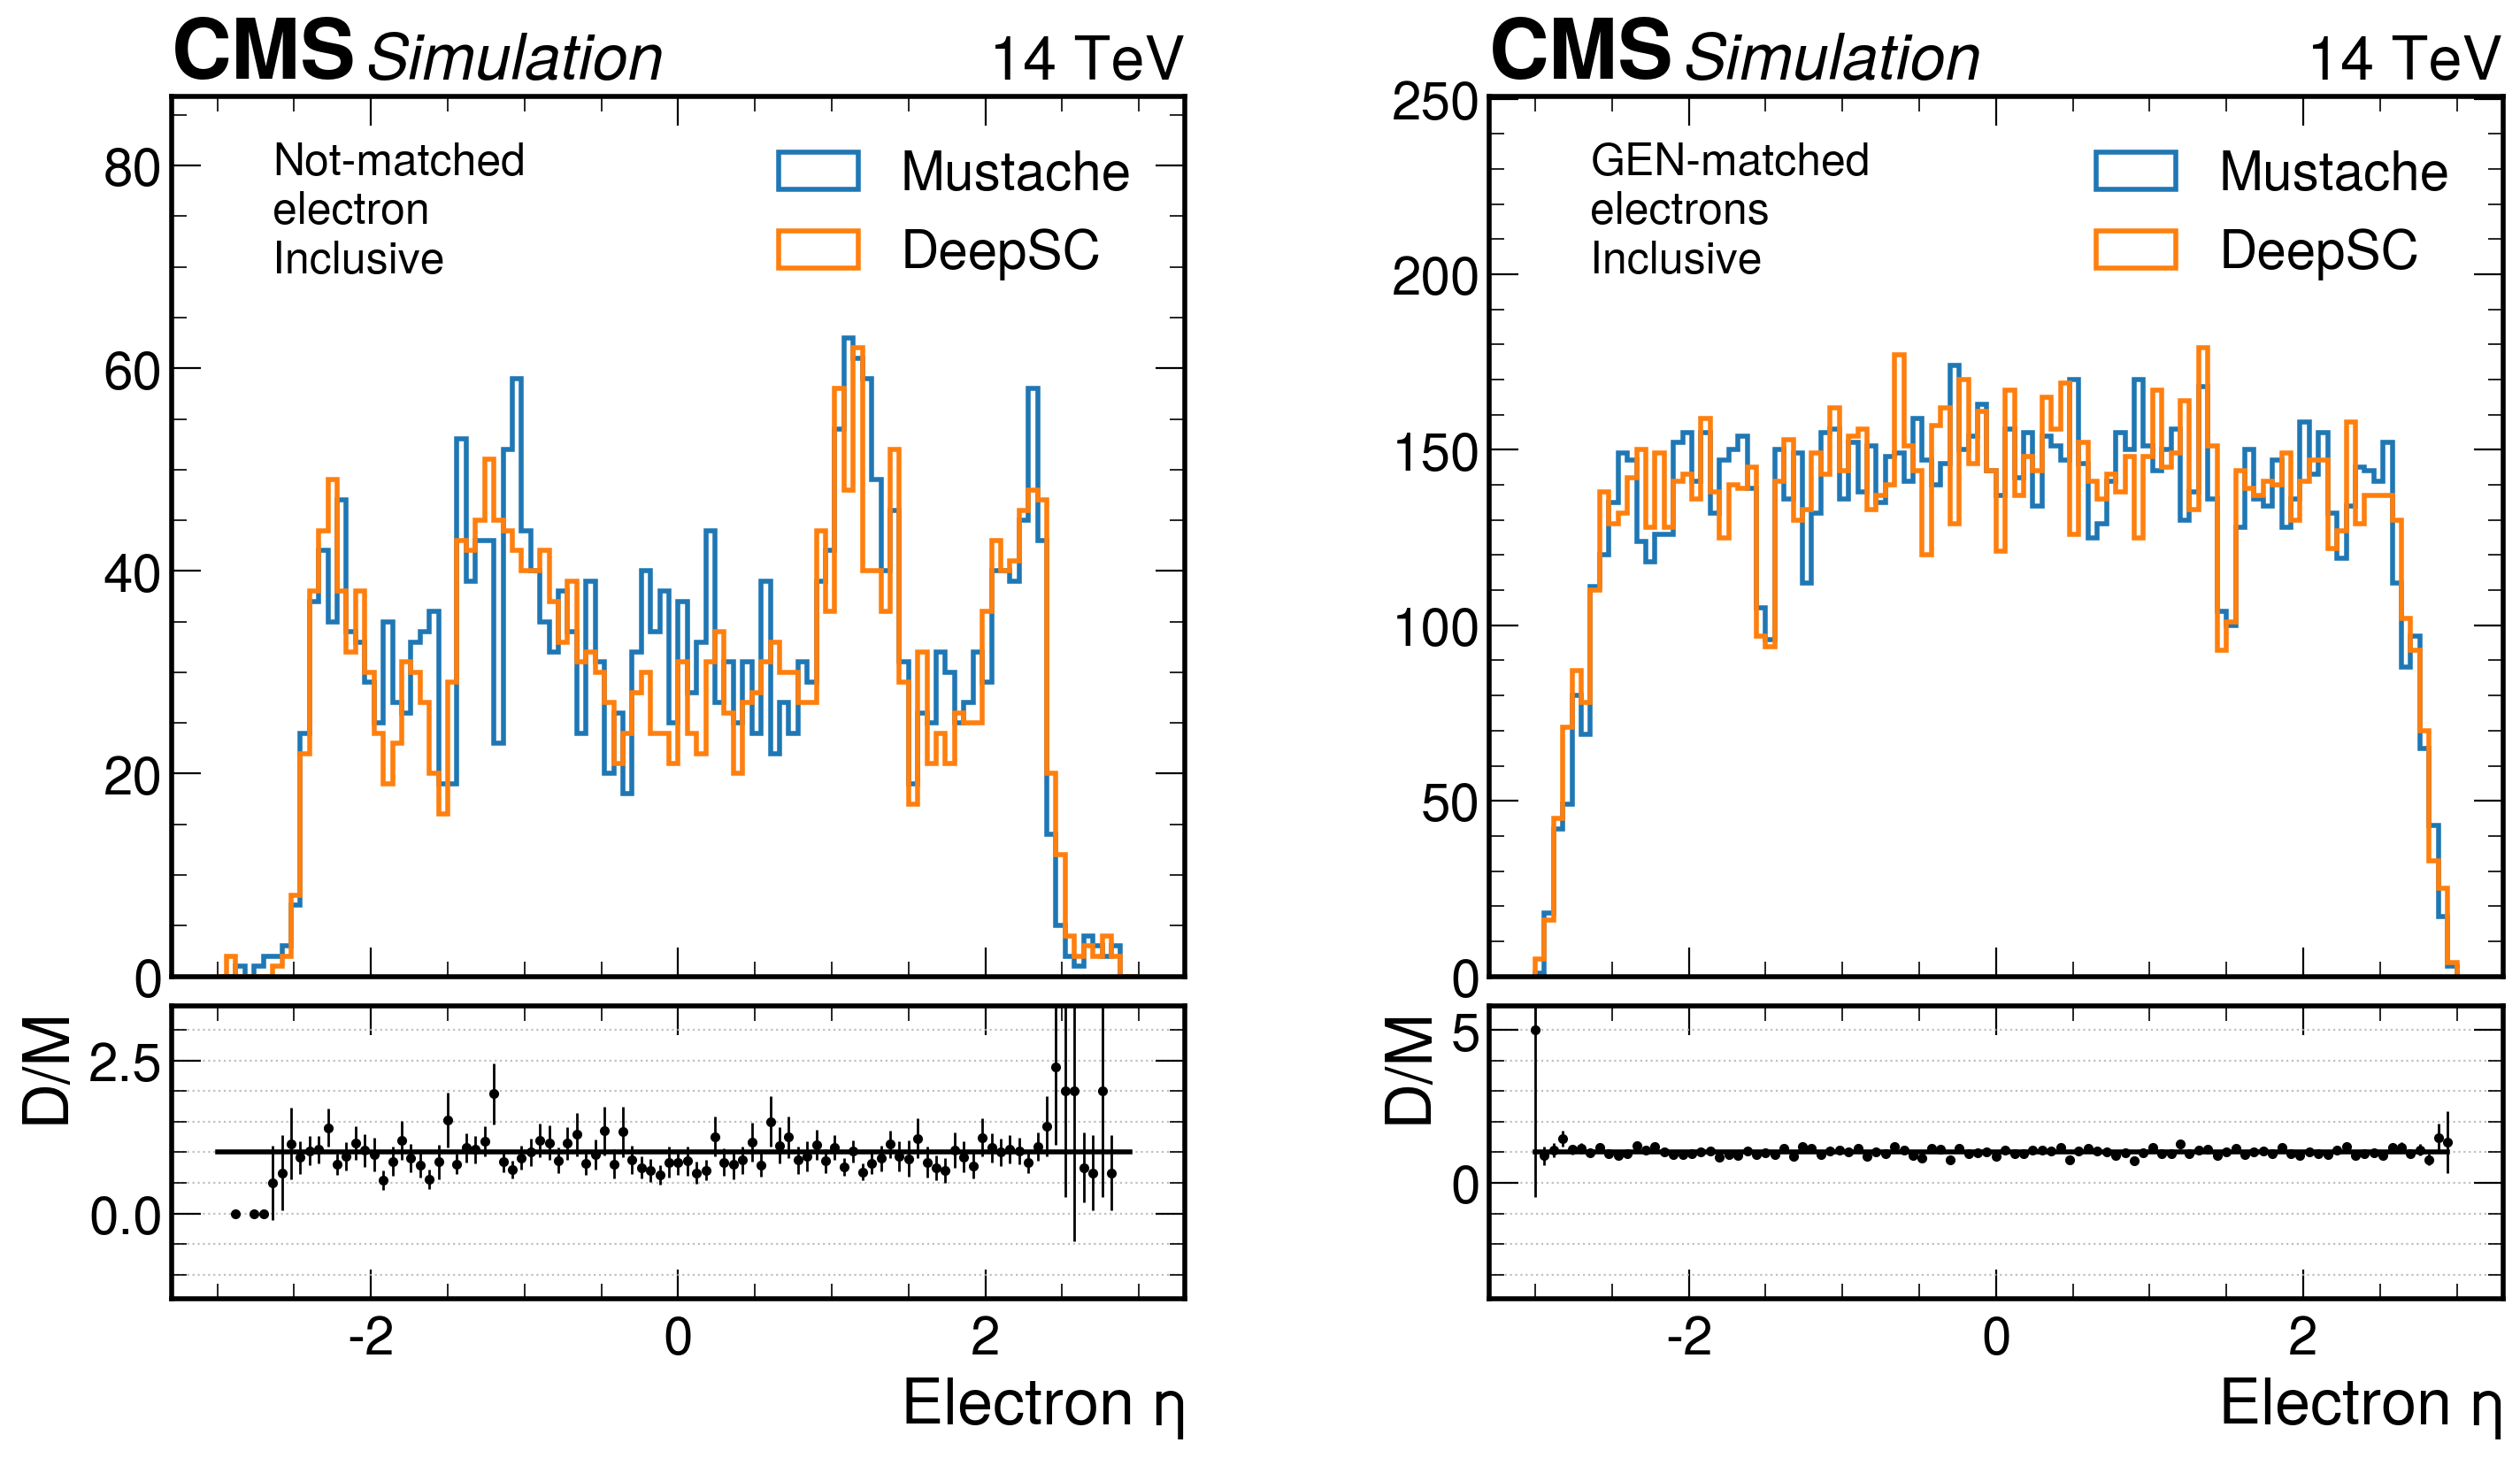

In [12]:
plot_distribution("ele_eta", "Electron $\eta$", 100, (-3,3), output_folder+"/basic_distribution_comparison")

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

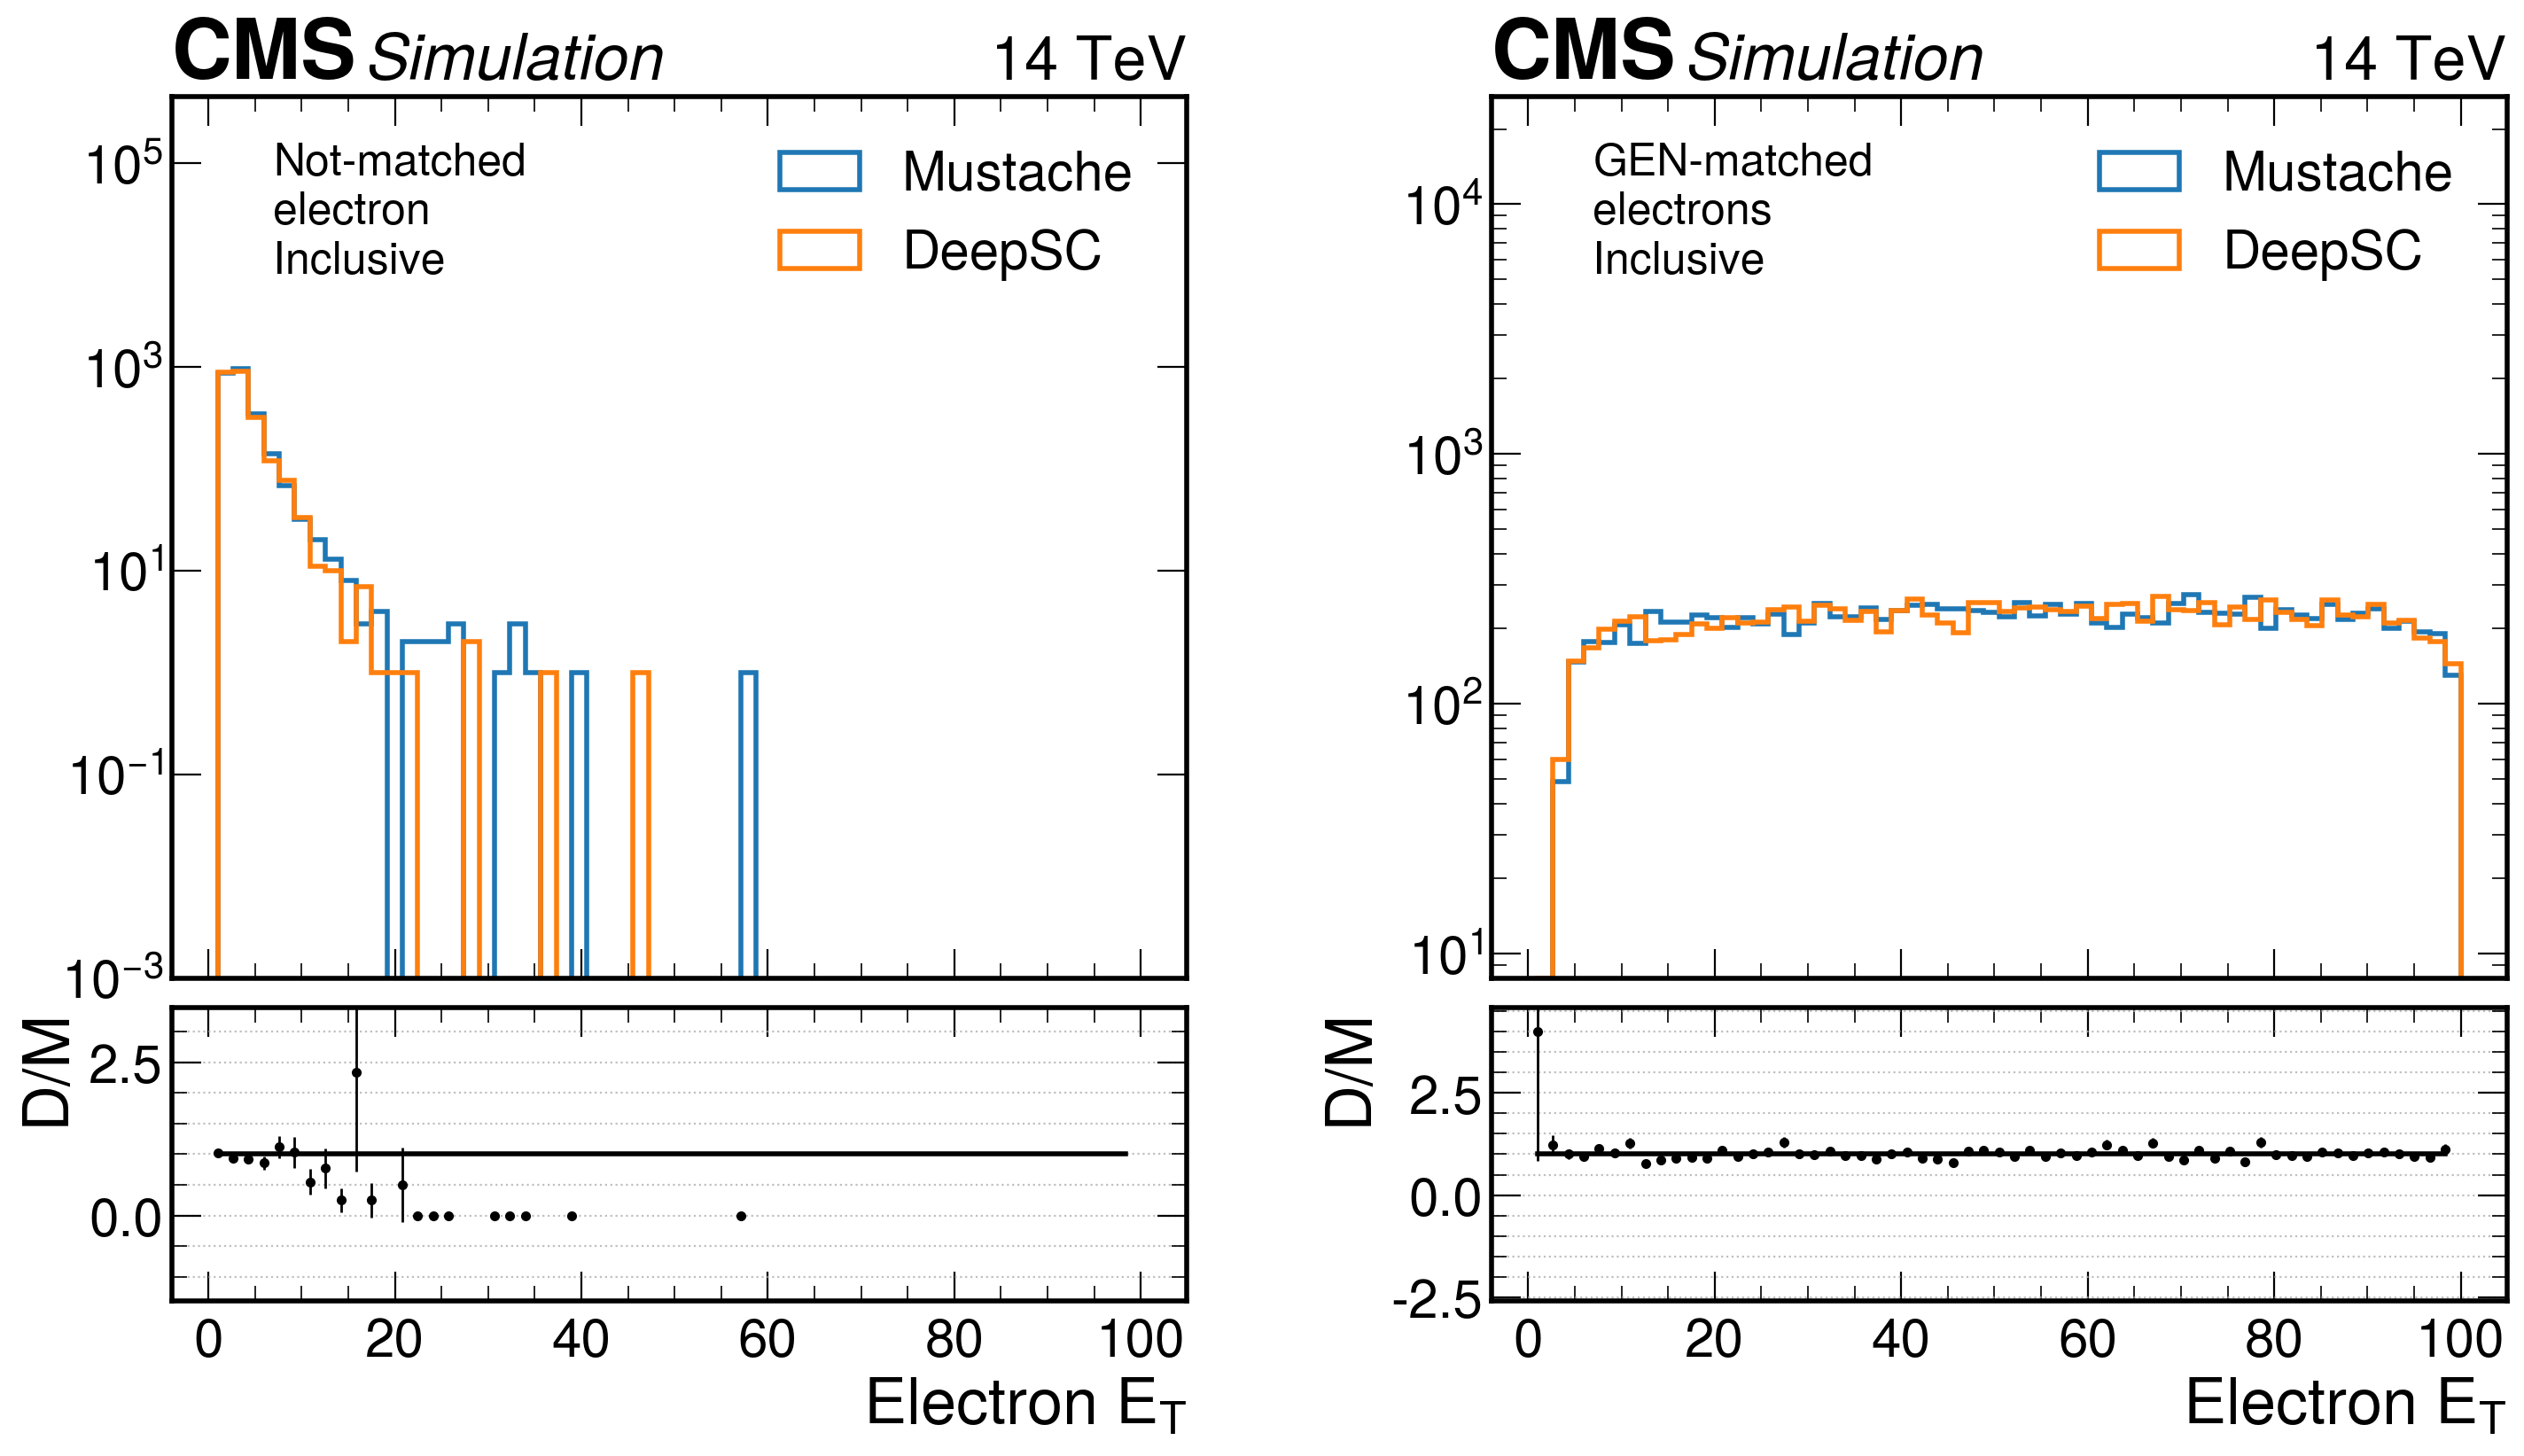

In [13]:
plot_distribution("ele_et", "Electron $E_T$", 60, (1,100), output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="Inclusive")

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

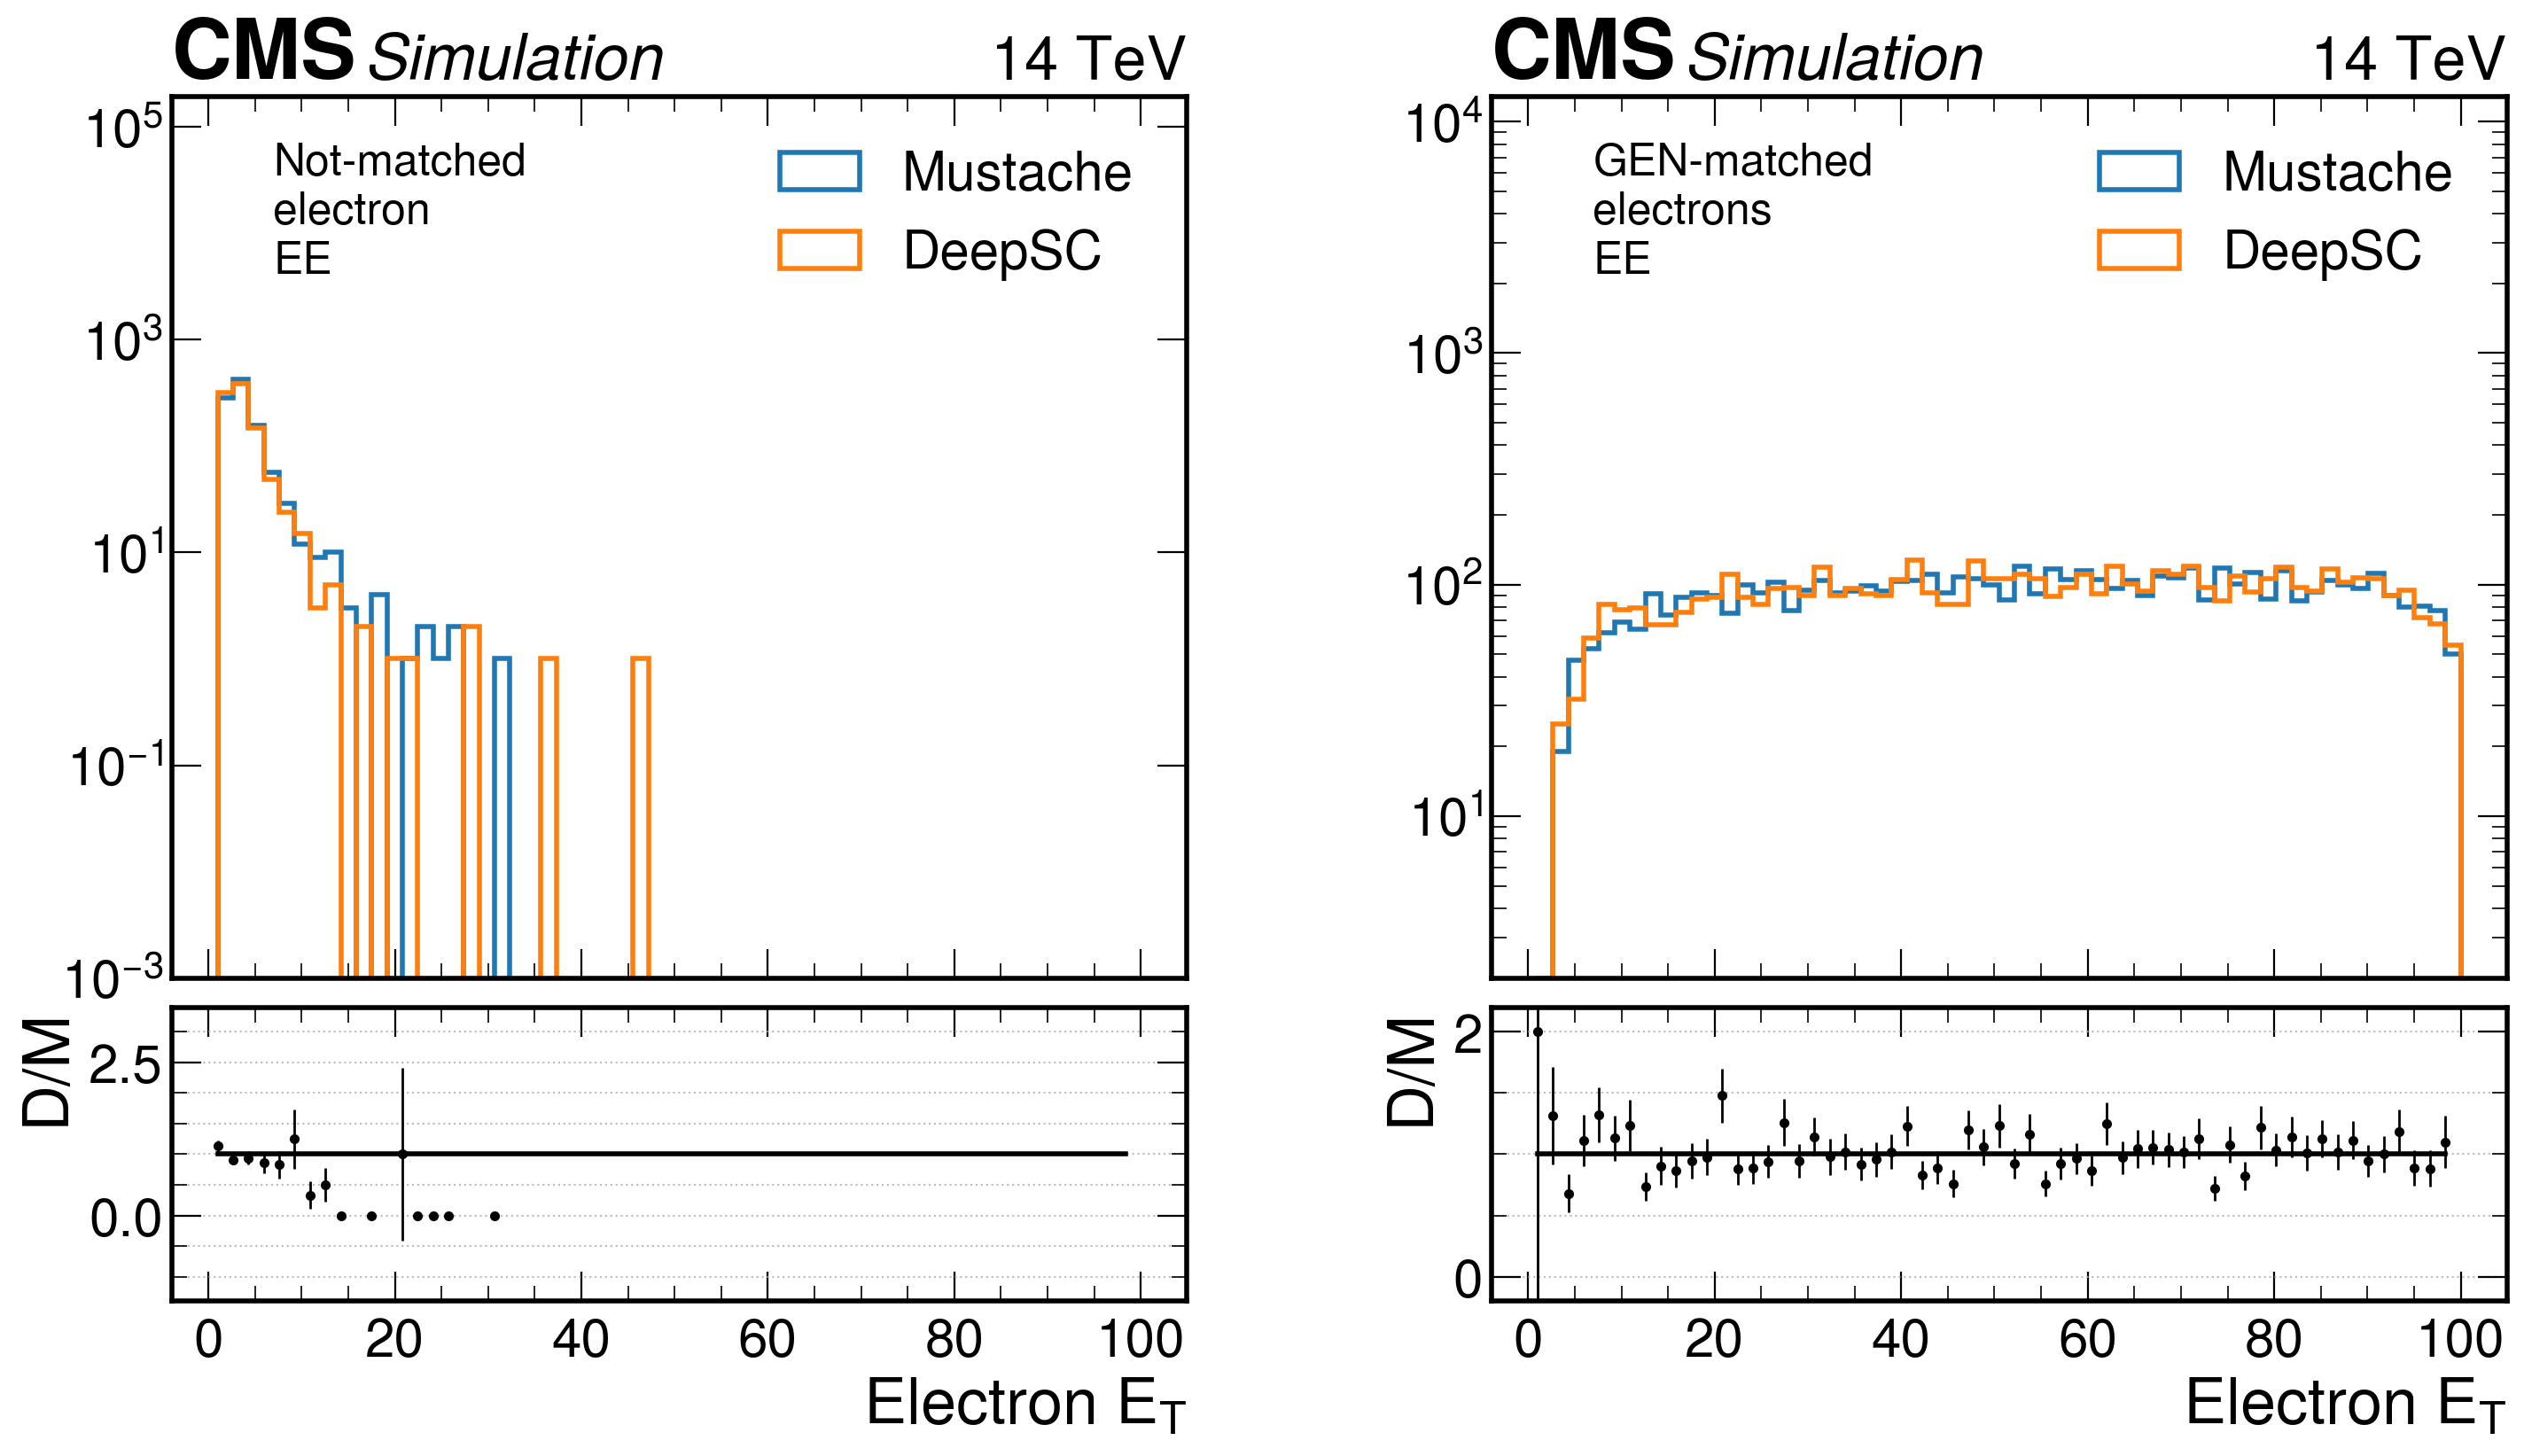

In [14]:
plot_distribution("ele_et", "Electron $E_T$", 60, (1,100), output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="EE")

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

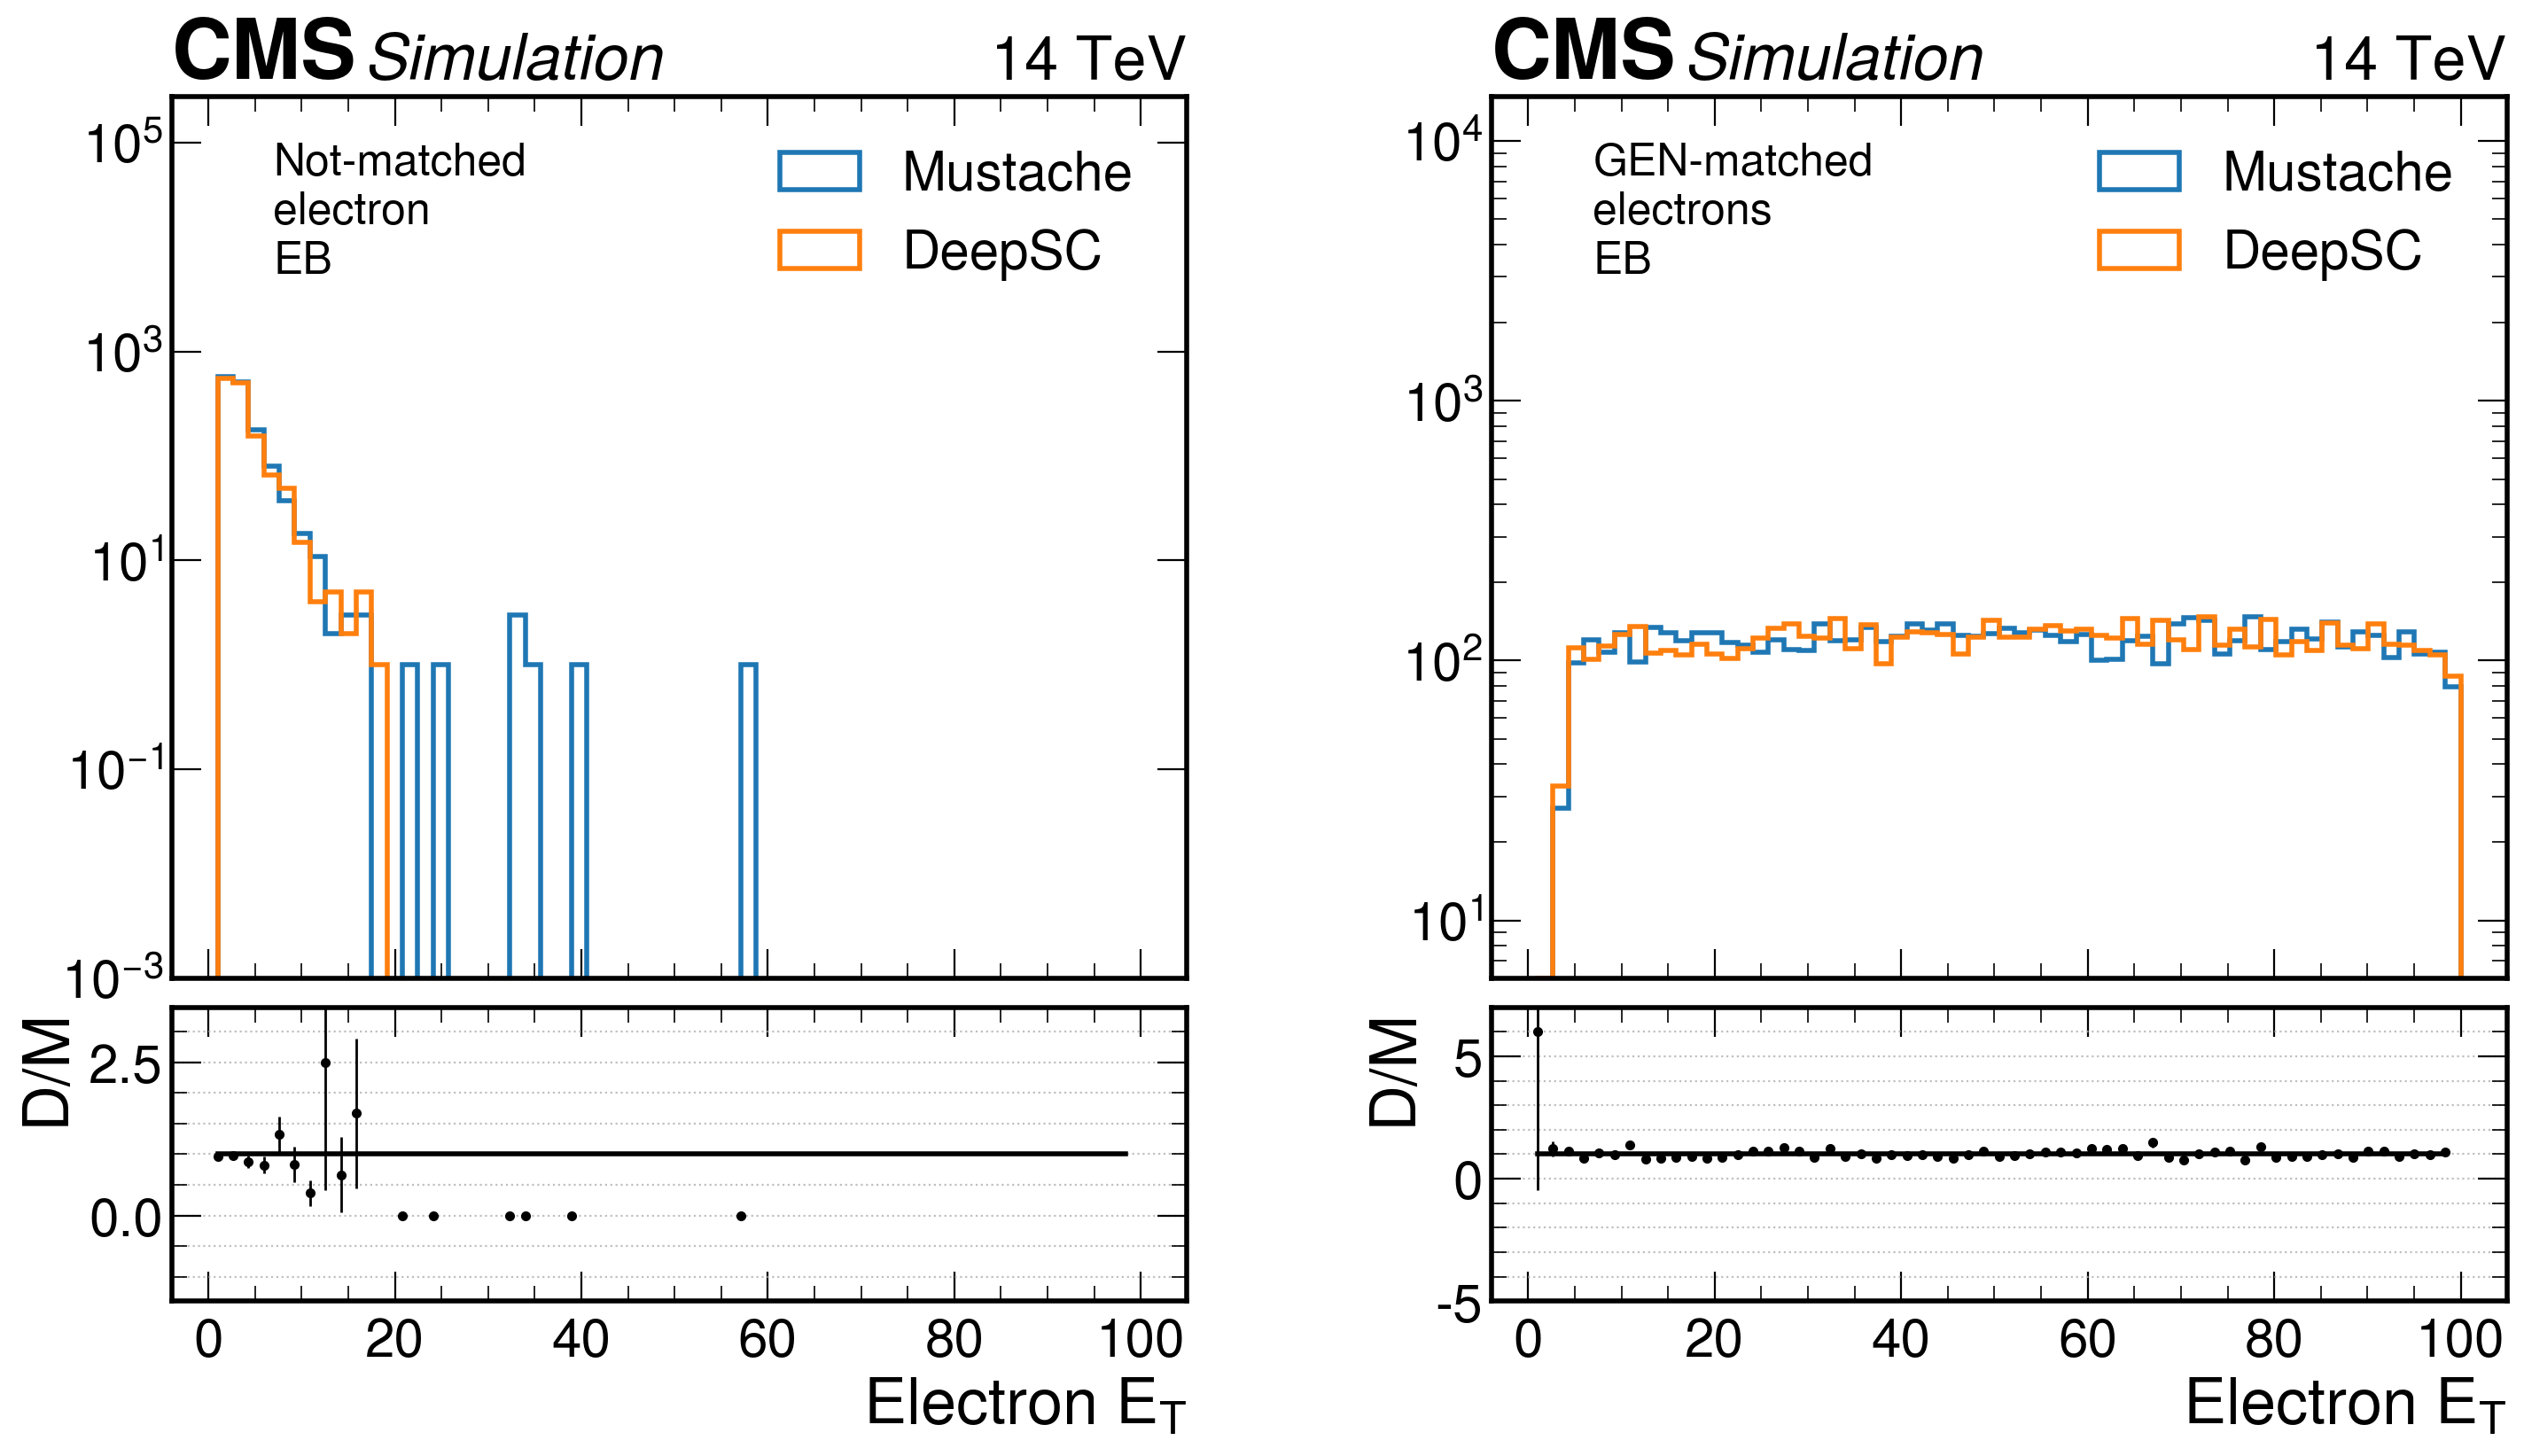

In [15]:
plot_distribution("ele_et", "Electron $E_T$", 60, (1,100), output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="EB")

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

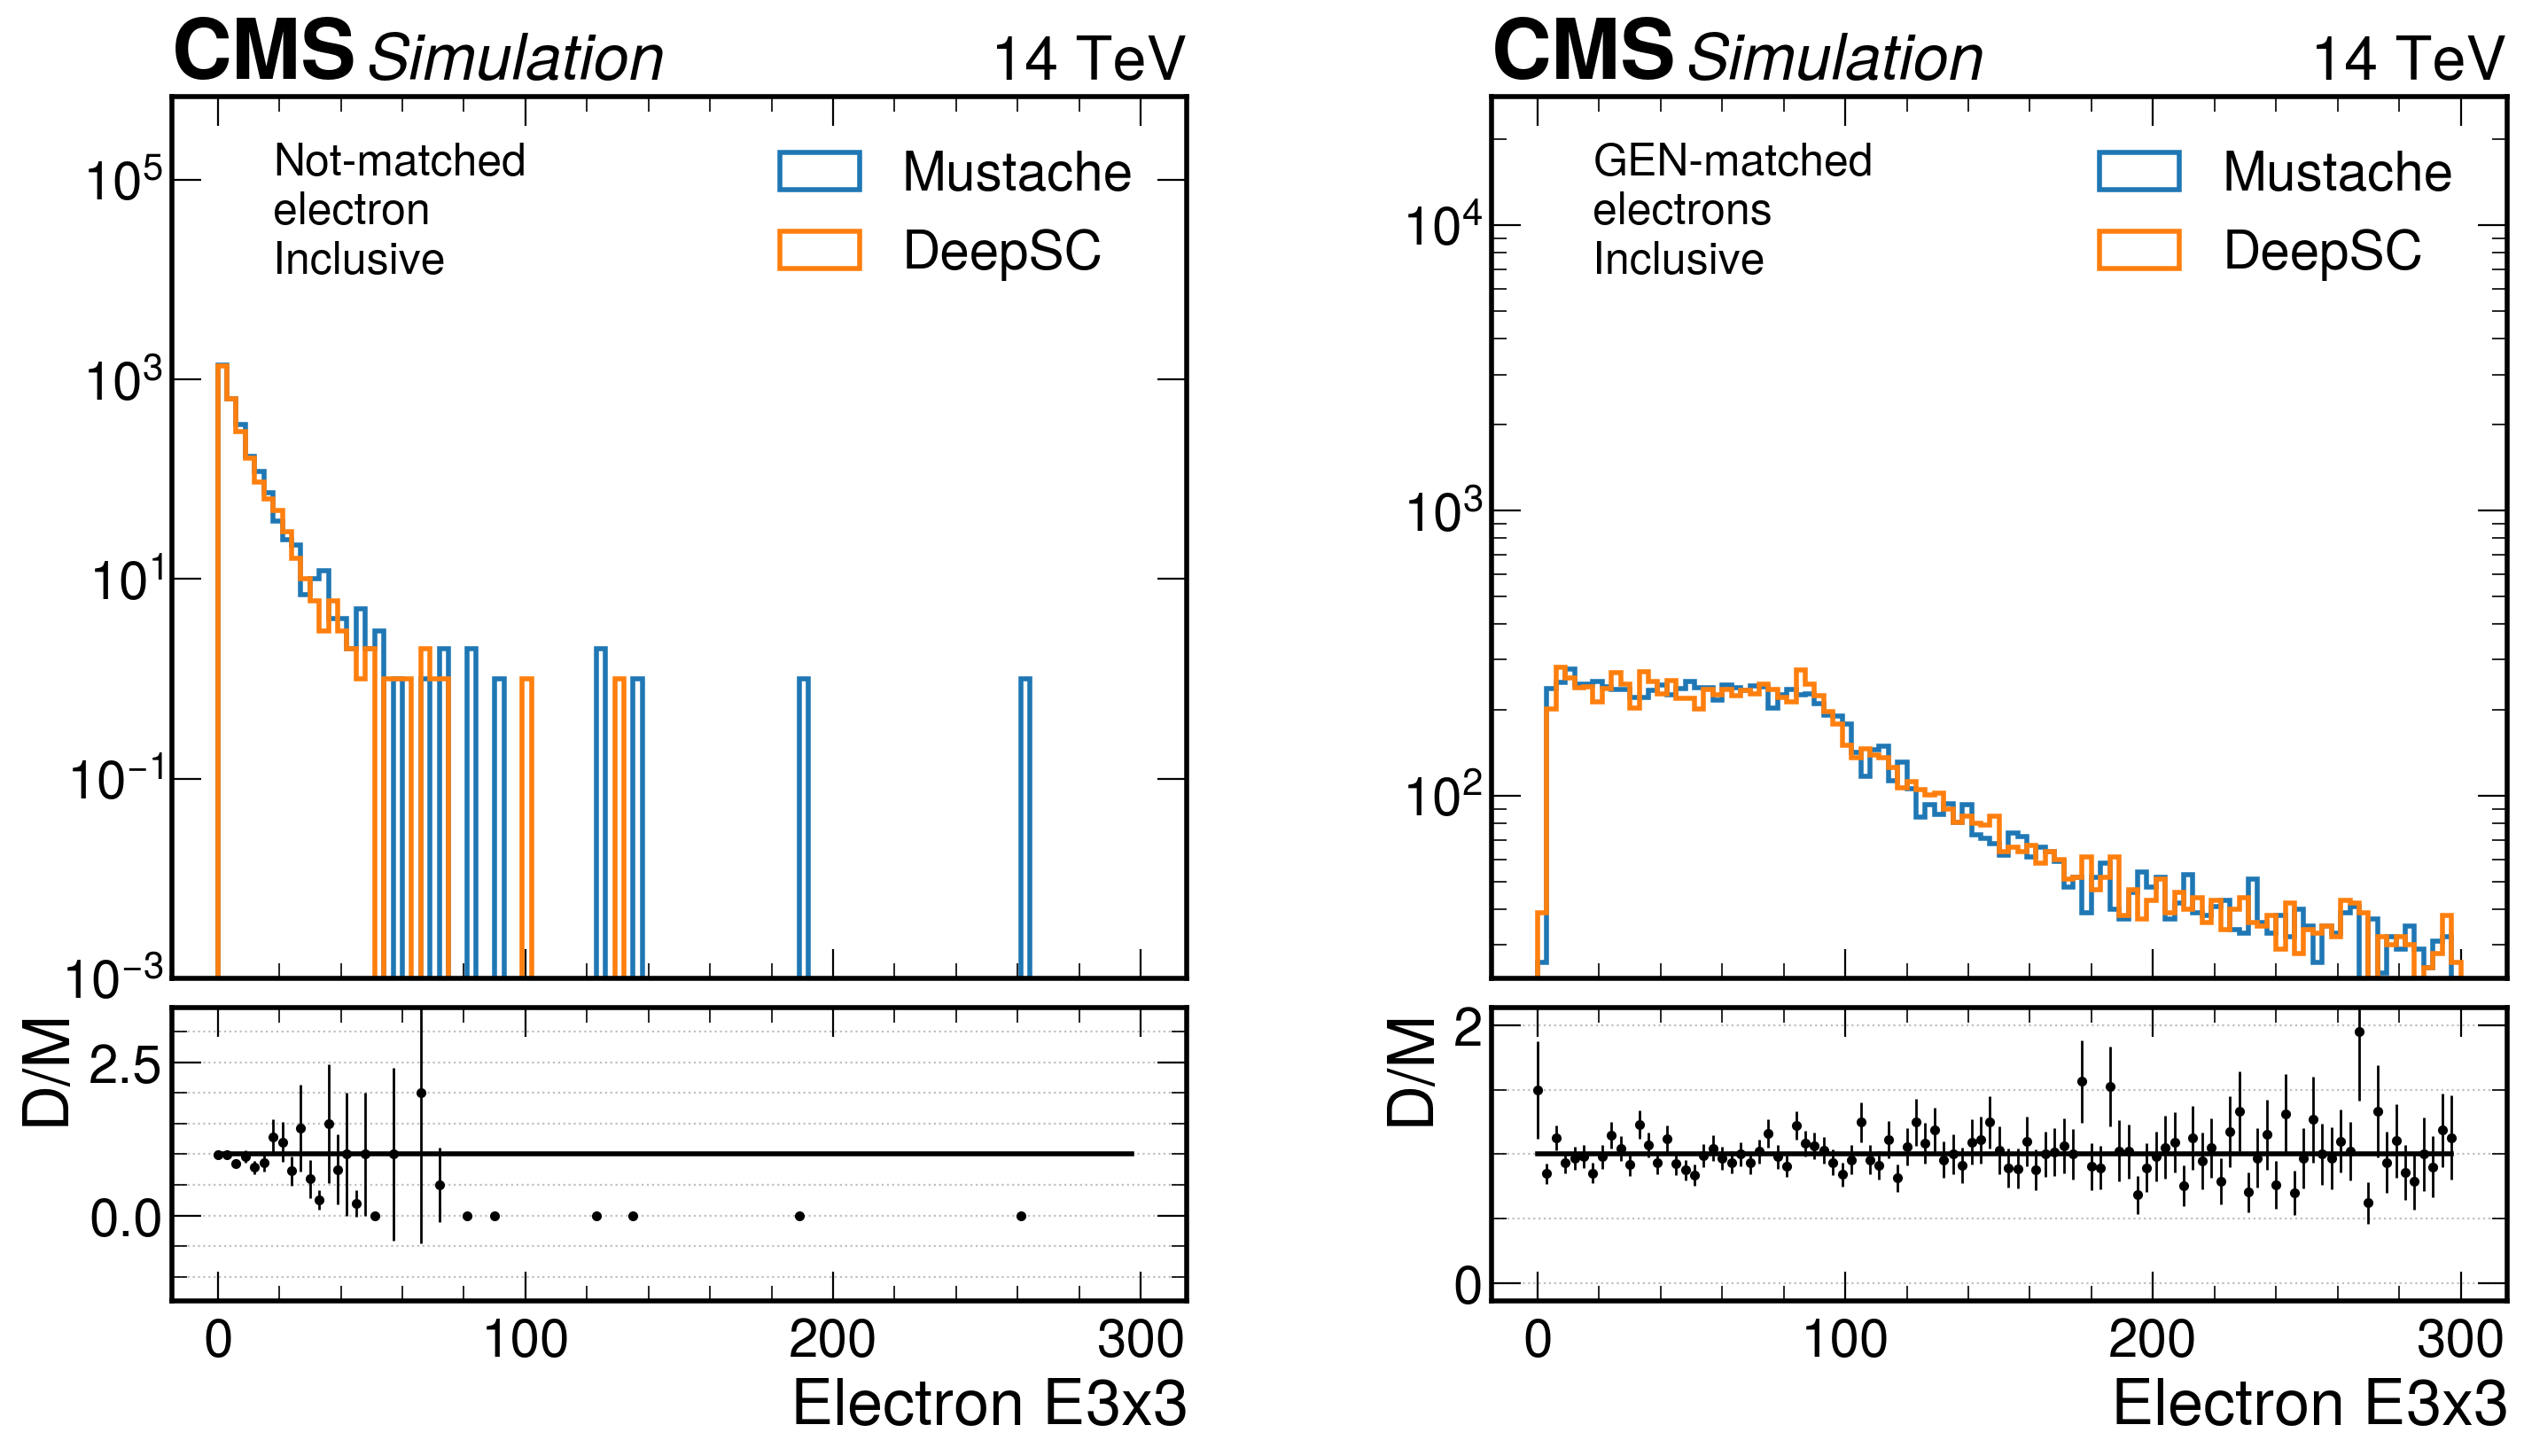

In [16]:
plot_distribution("ele_e3x3", "Electron $E3x3$", 100, (0,300), output_folder+"/basic_distribution_comparison", ylog=True)

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

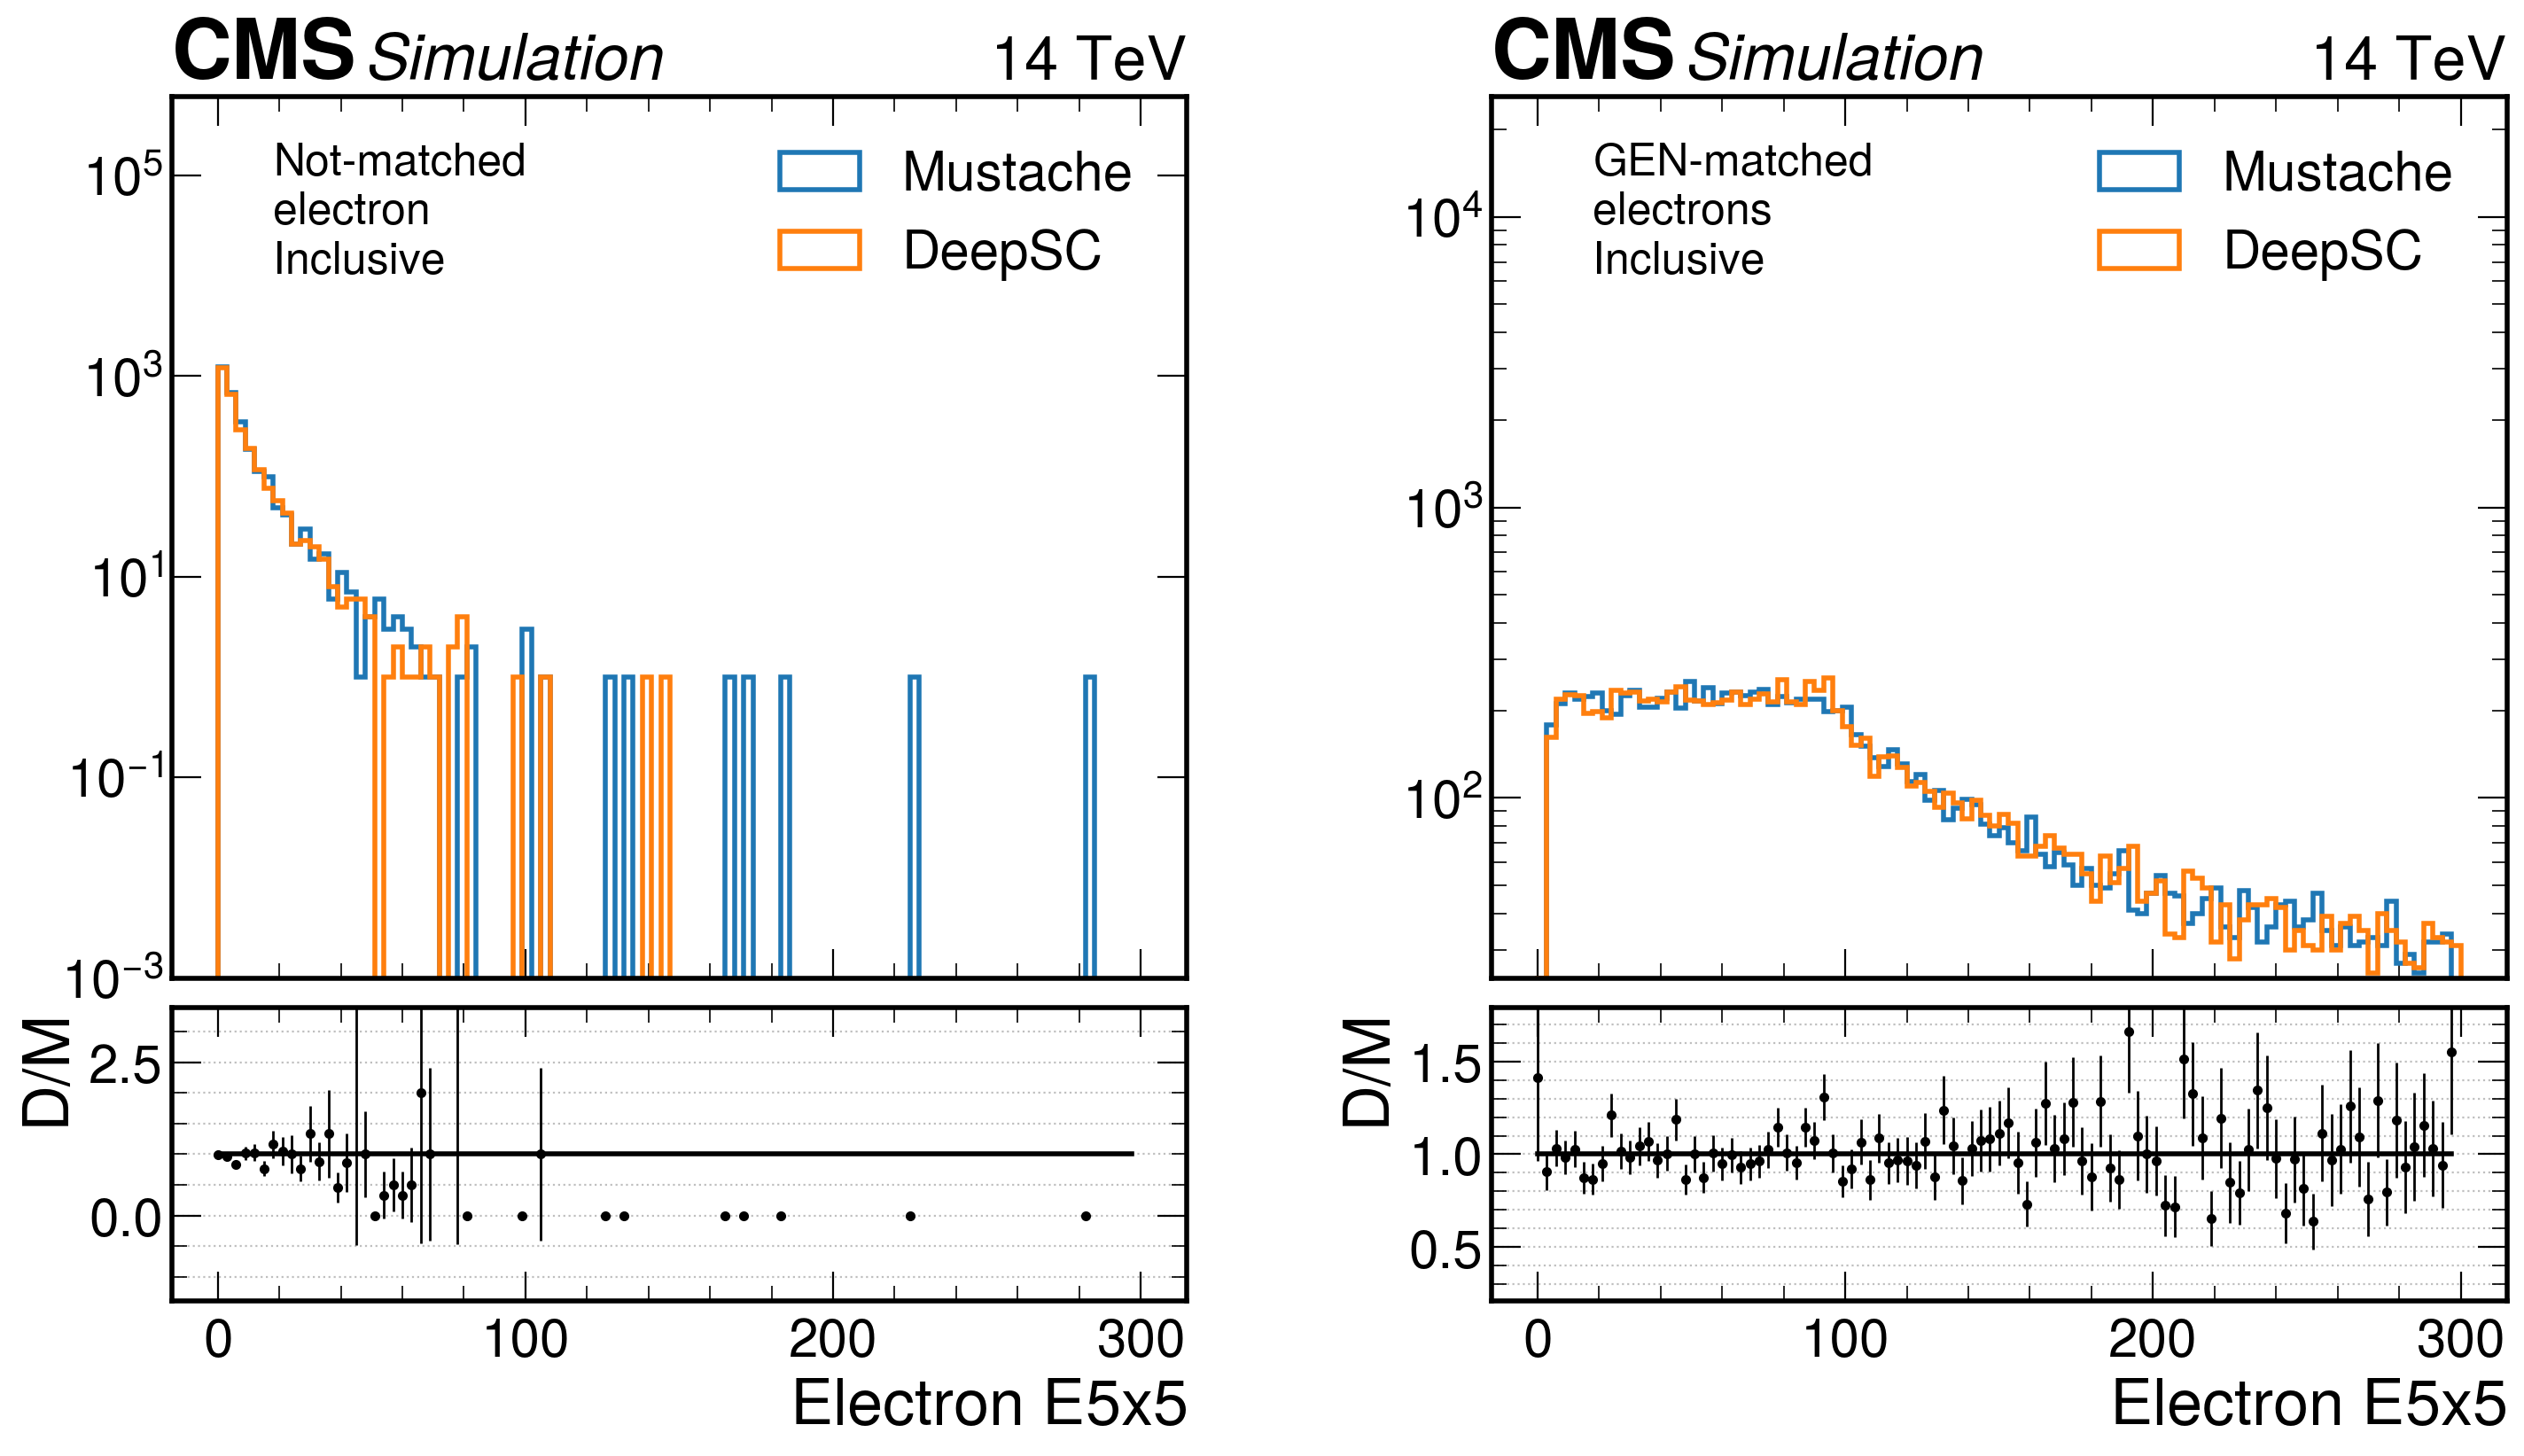

In [17]:
plot_distribution("ele_e5x5", "Electron $E5x5$", 100, (0,300), output_folder+"/basic_distribution_comparison", ylog=True)

/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:86: RuntimeWarning: invalid value encountered in true_divide
  azr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:91: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))


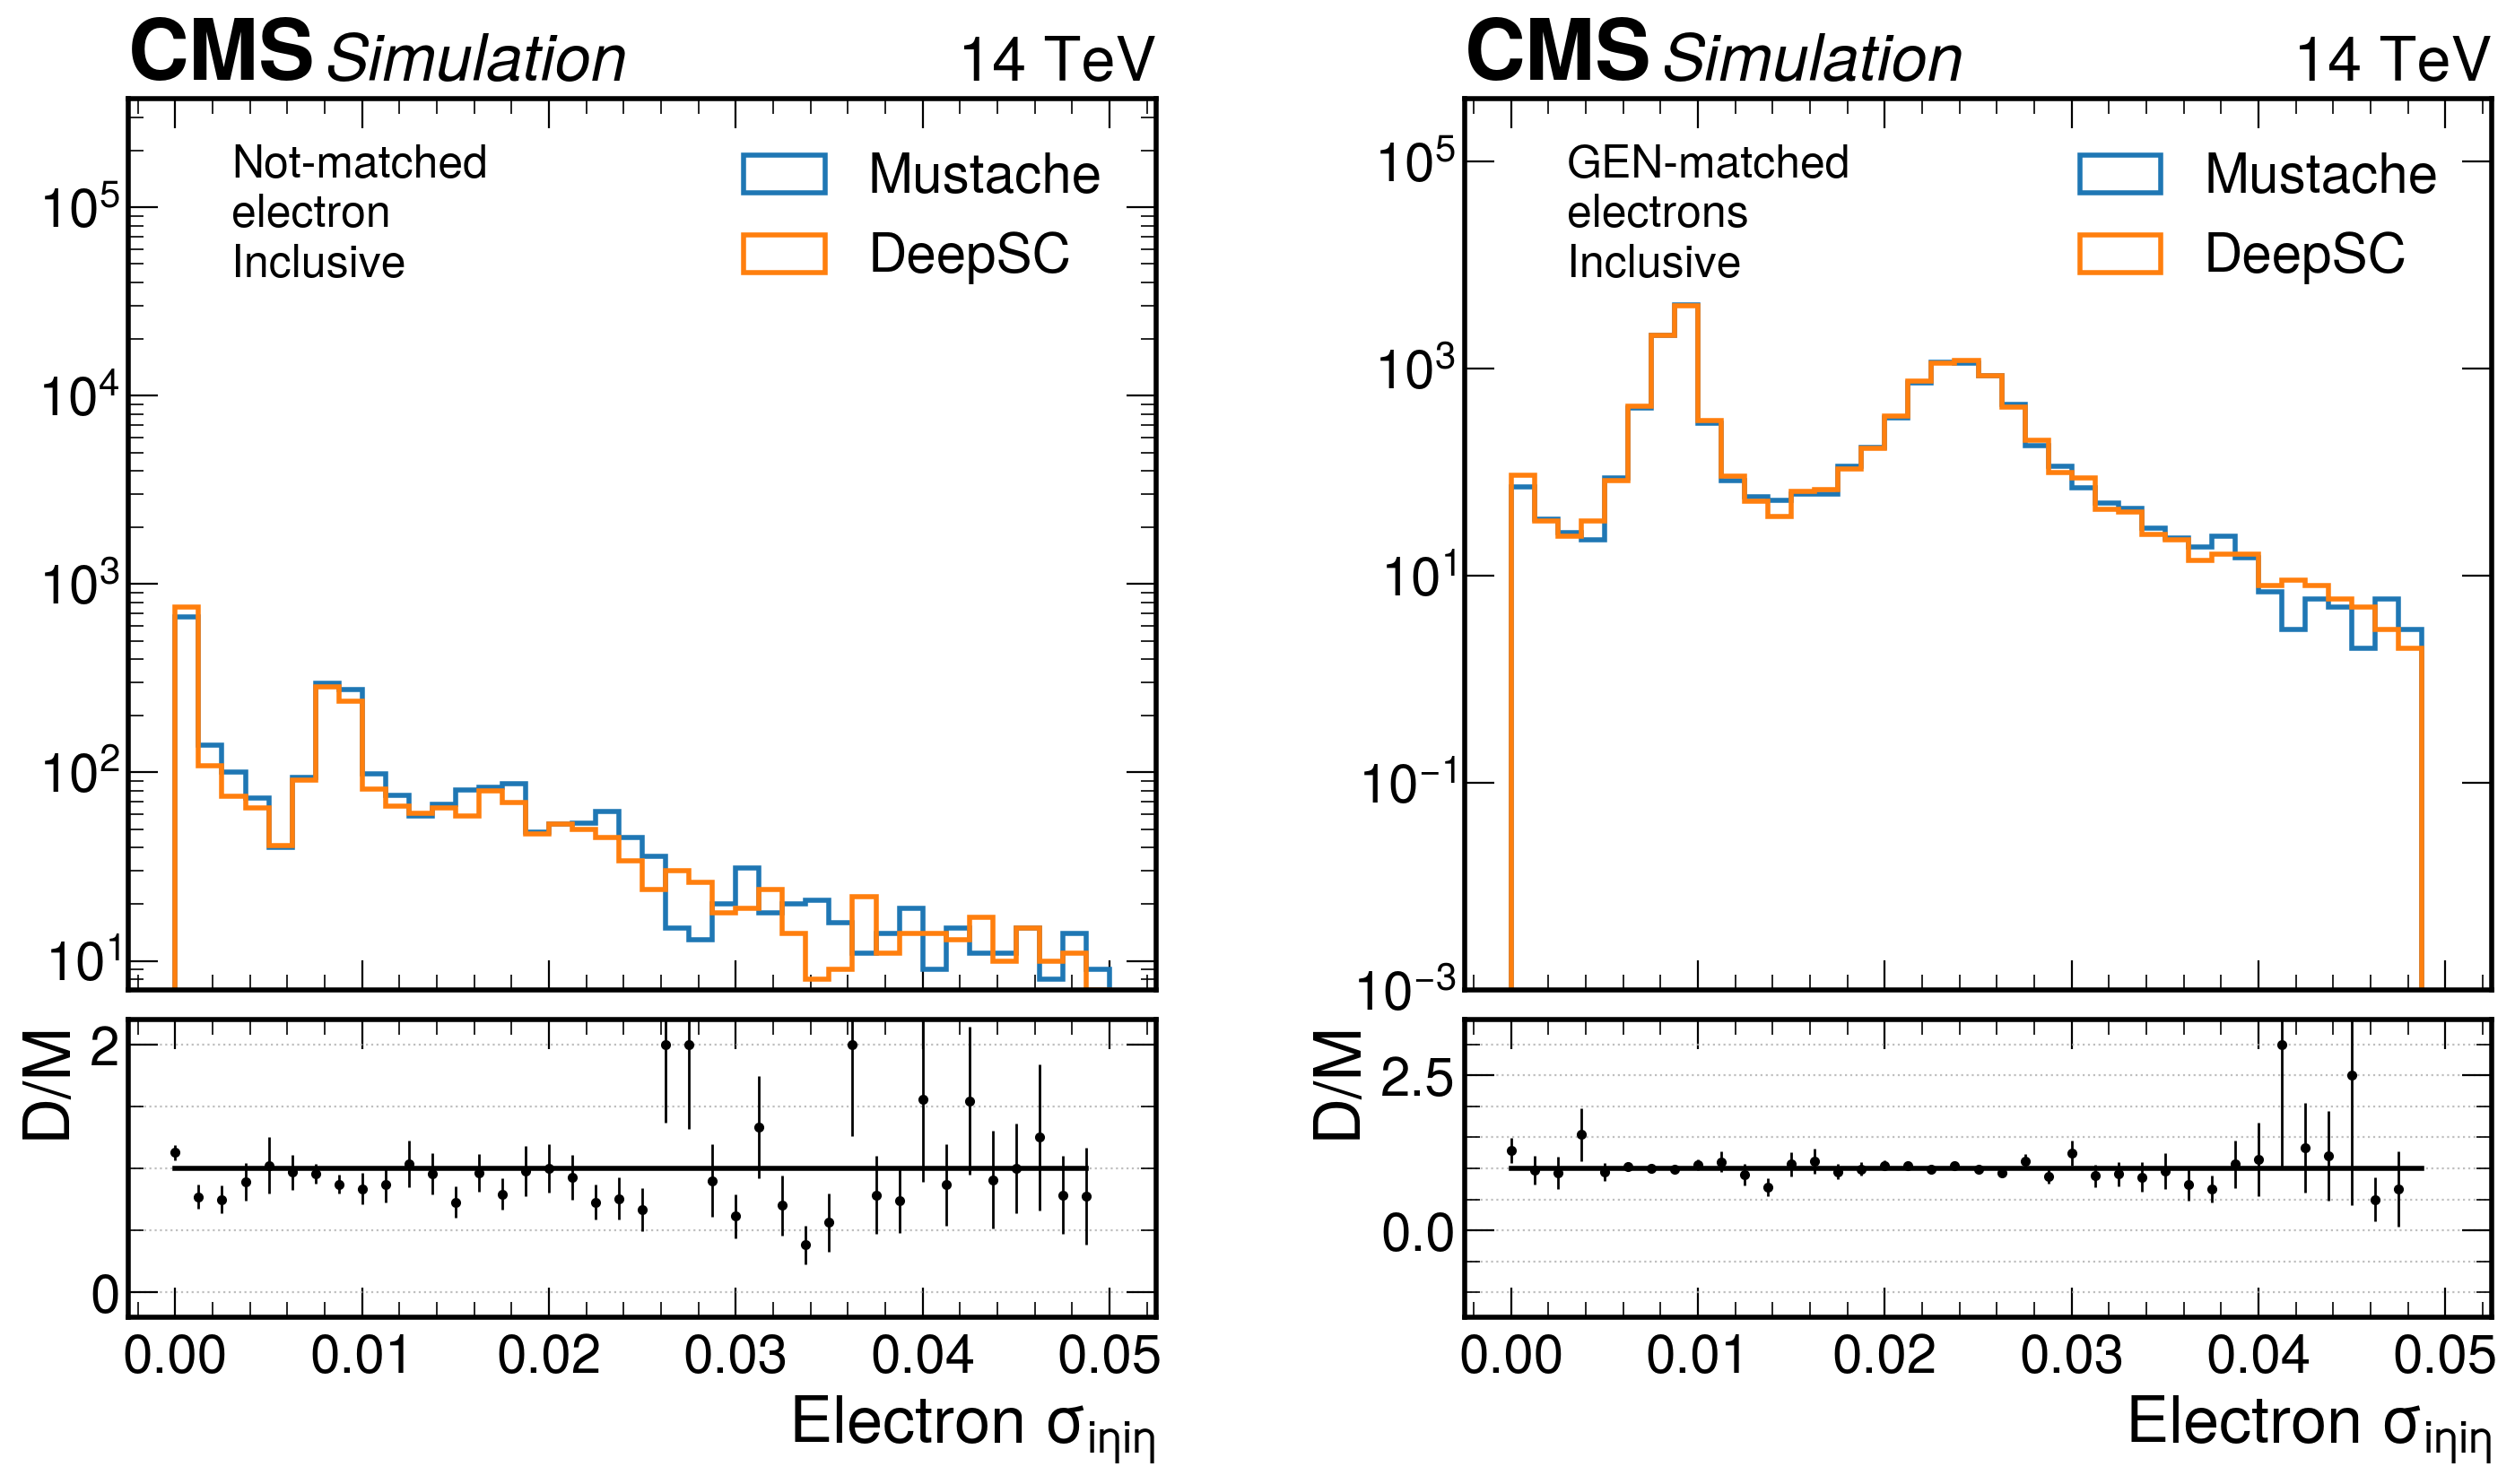

In [18]:
plot_distribution("ele_sigmaIEtaIEta", "Electron $\sigma_{i\eta i\eta}$", 40, (0,0.05), output_folder+"/basic_distribution_comparison", ylog=True)

/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:86: RuntimeWarning: invalid value encountered in true_divide
  azr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:91: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))


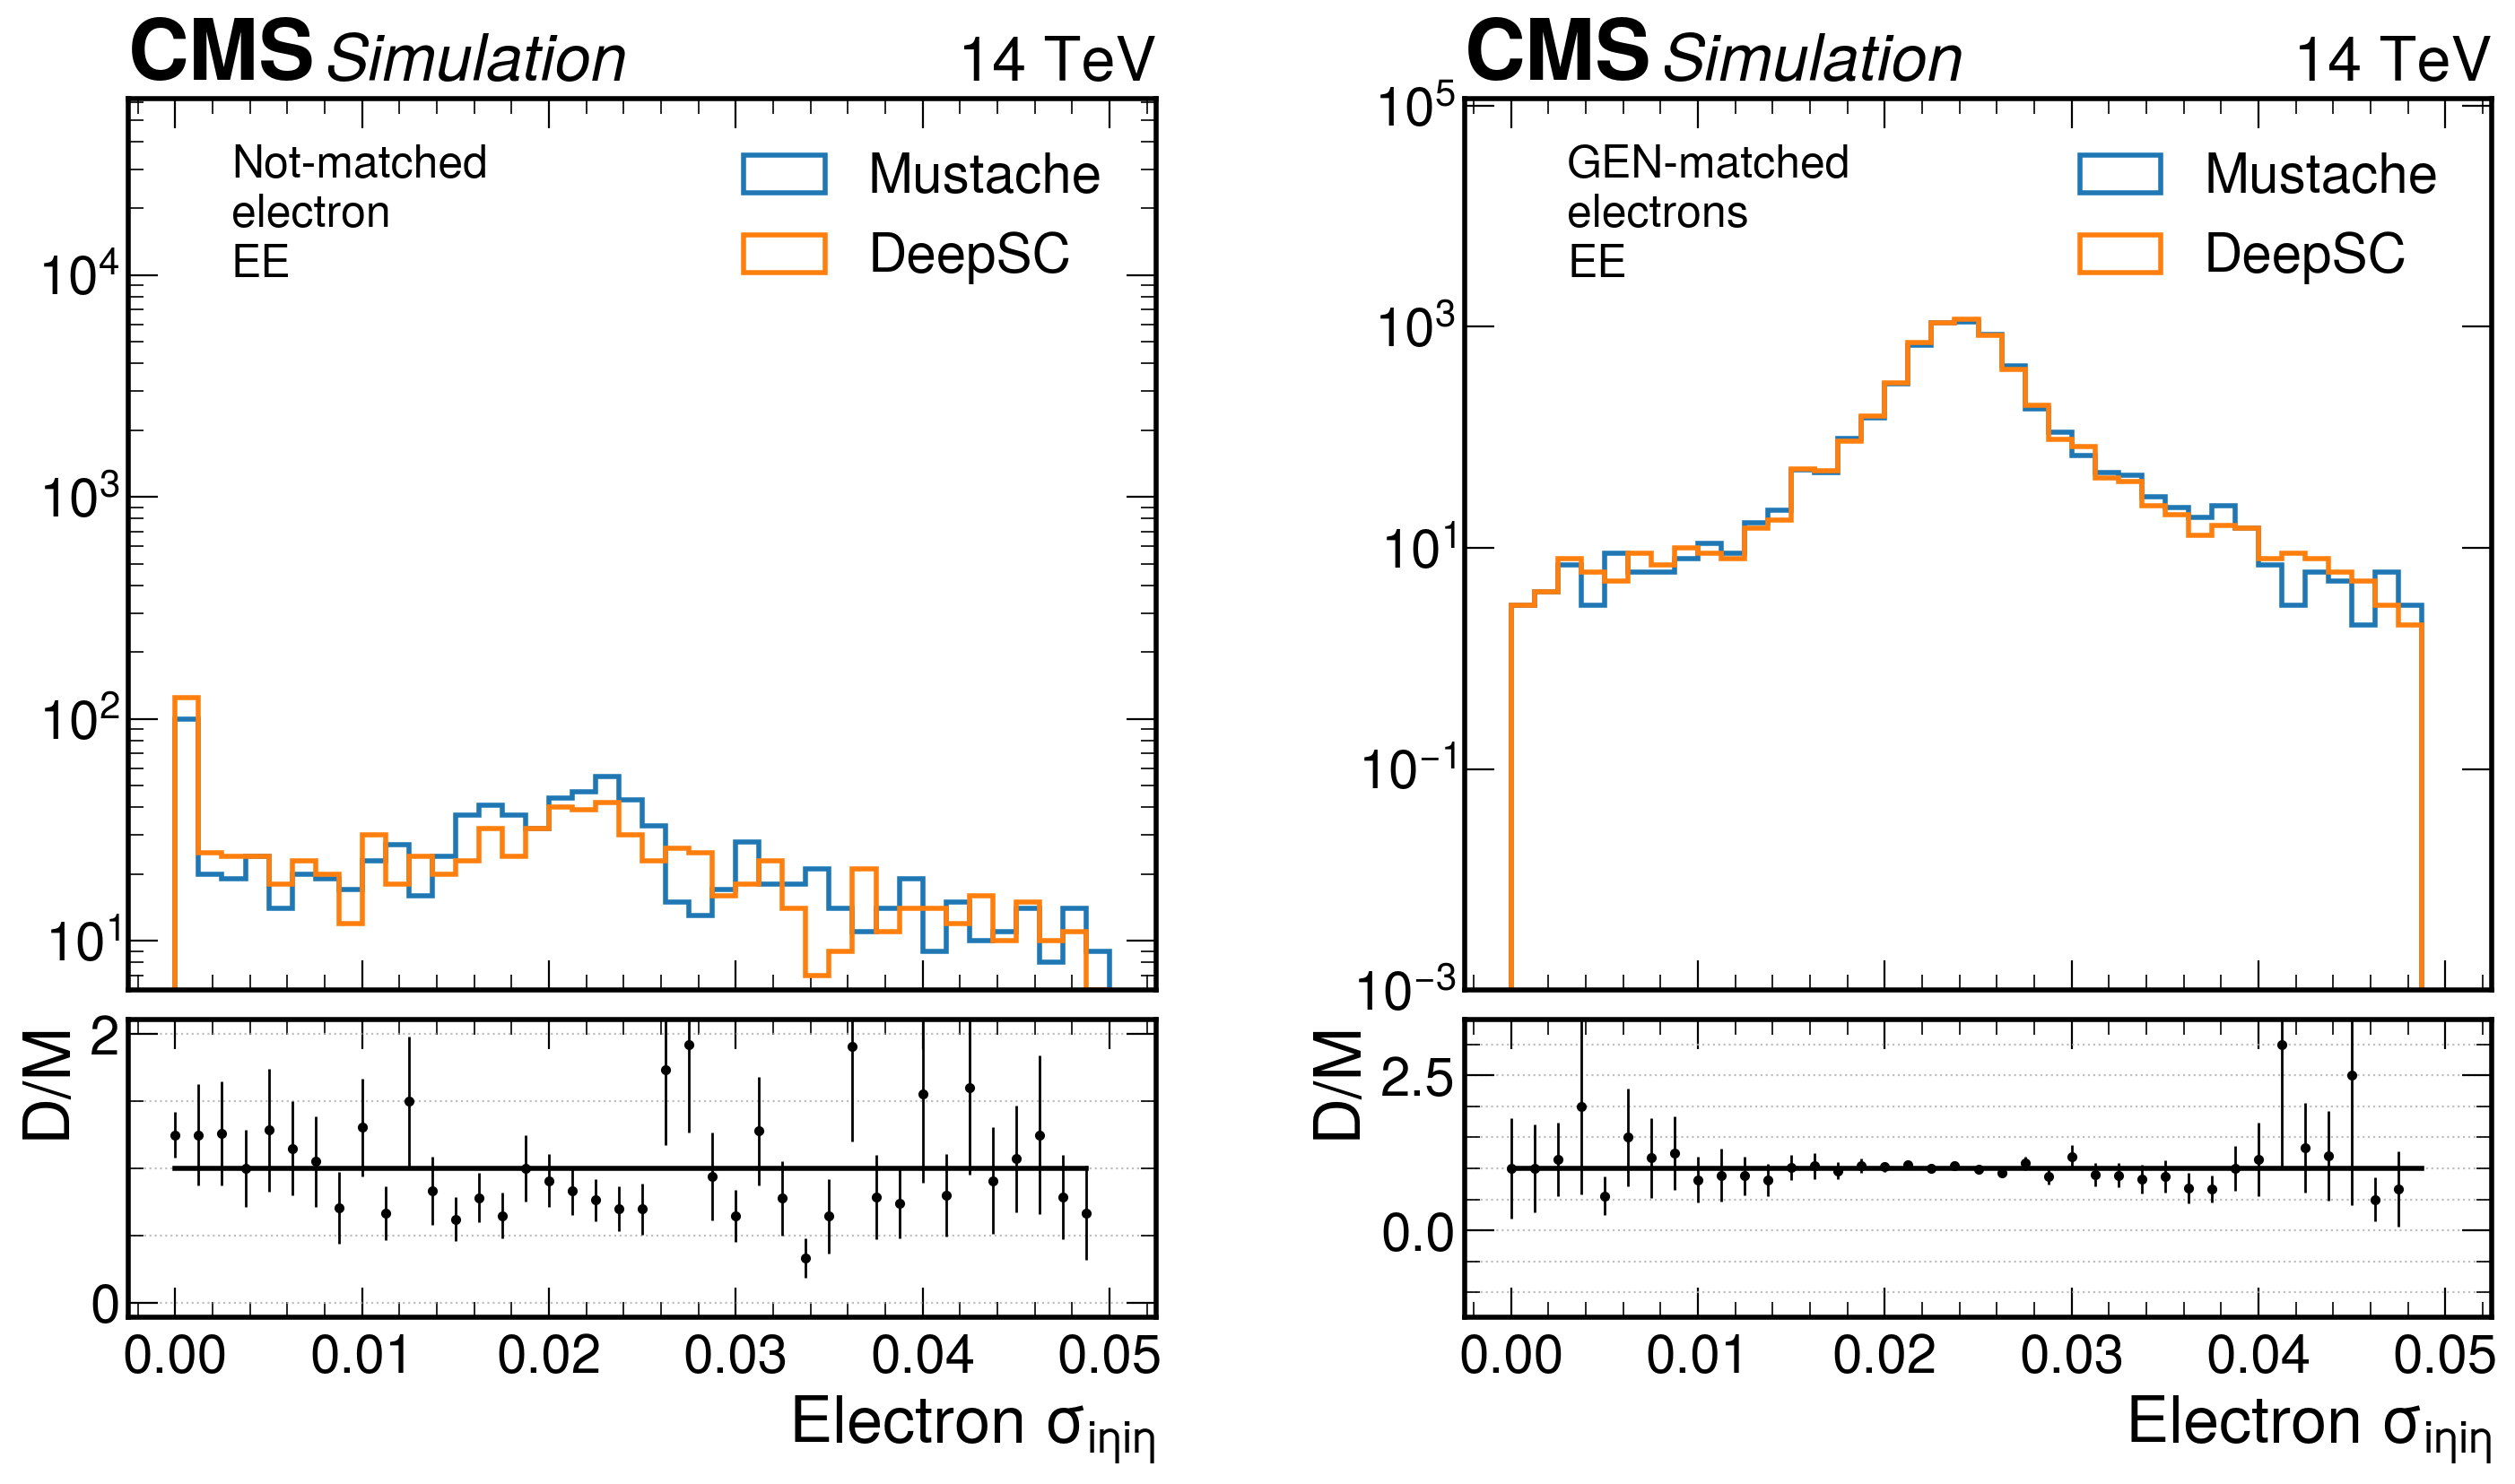

In [19]:
plot_distribution("ele_sigmaIEtaIEta", "Electron $\sigma_{i\eta i\eta}$", 40, (0,0.05), 
                  output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="EE")

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

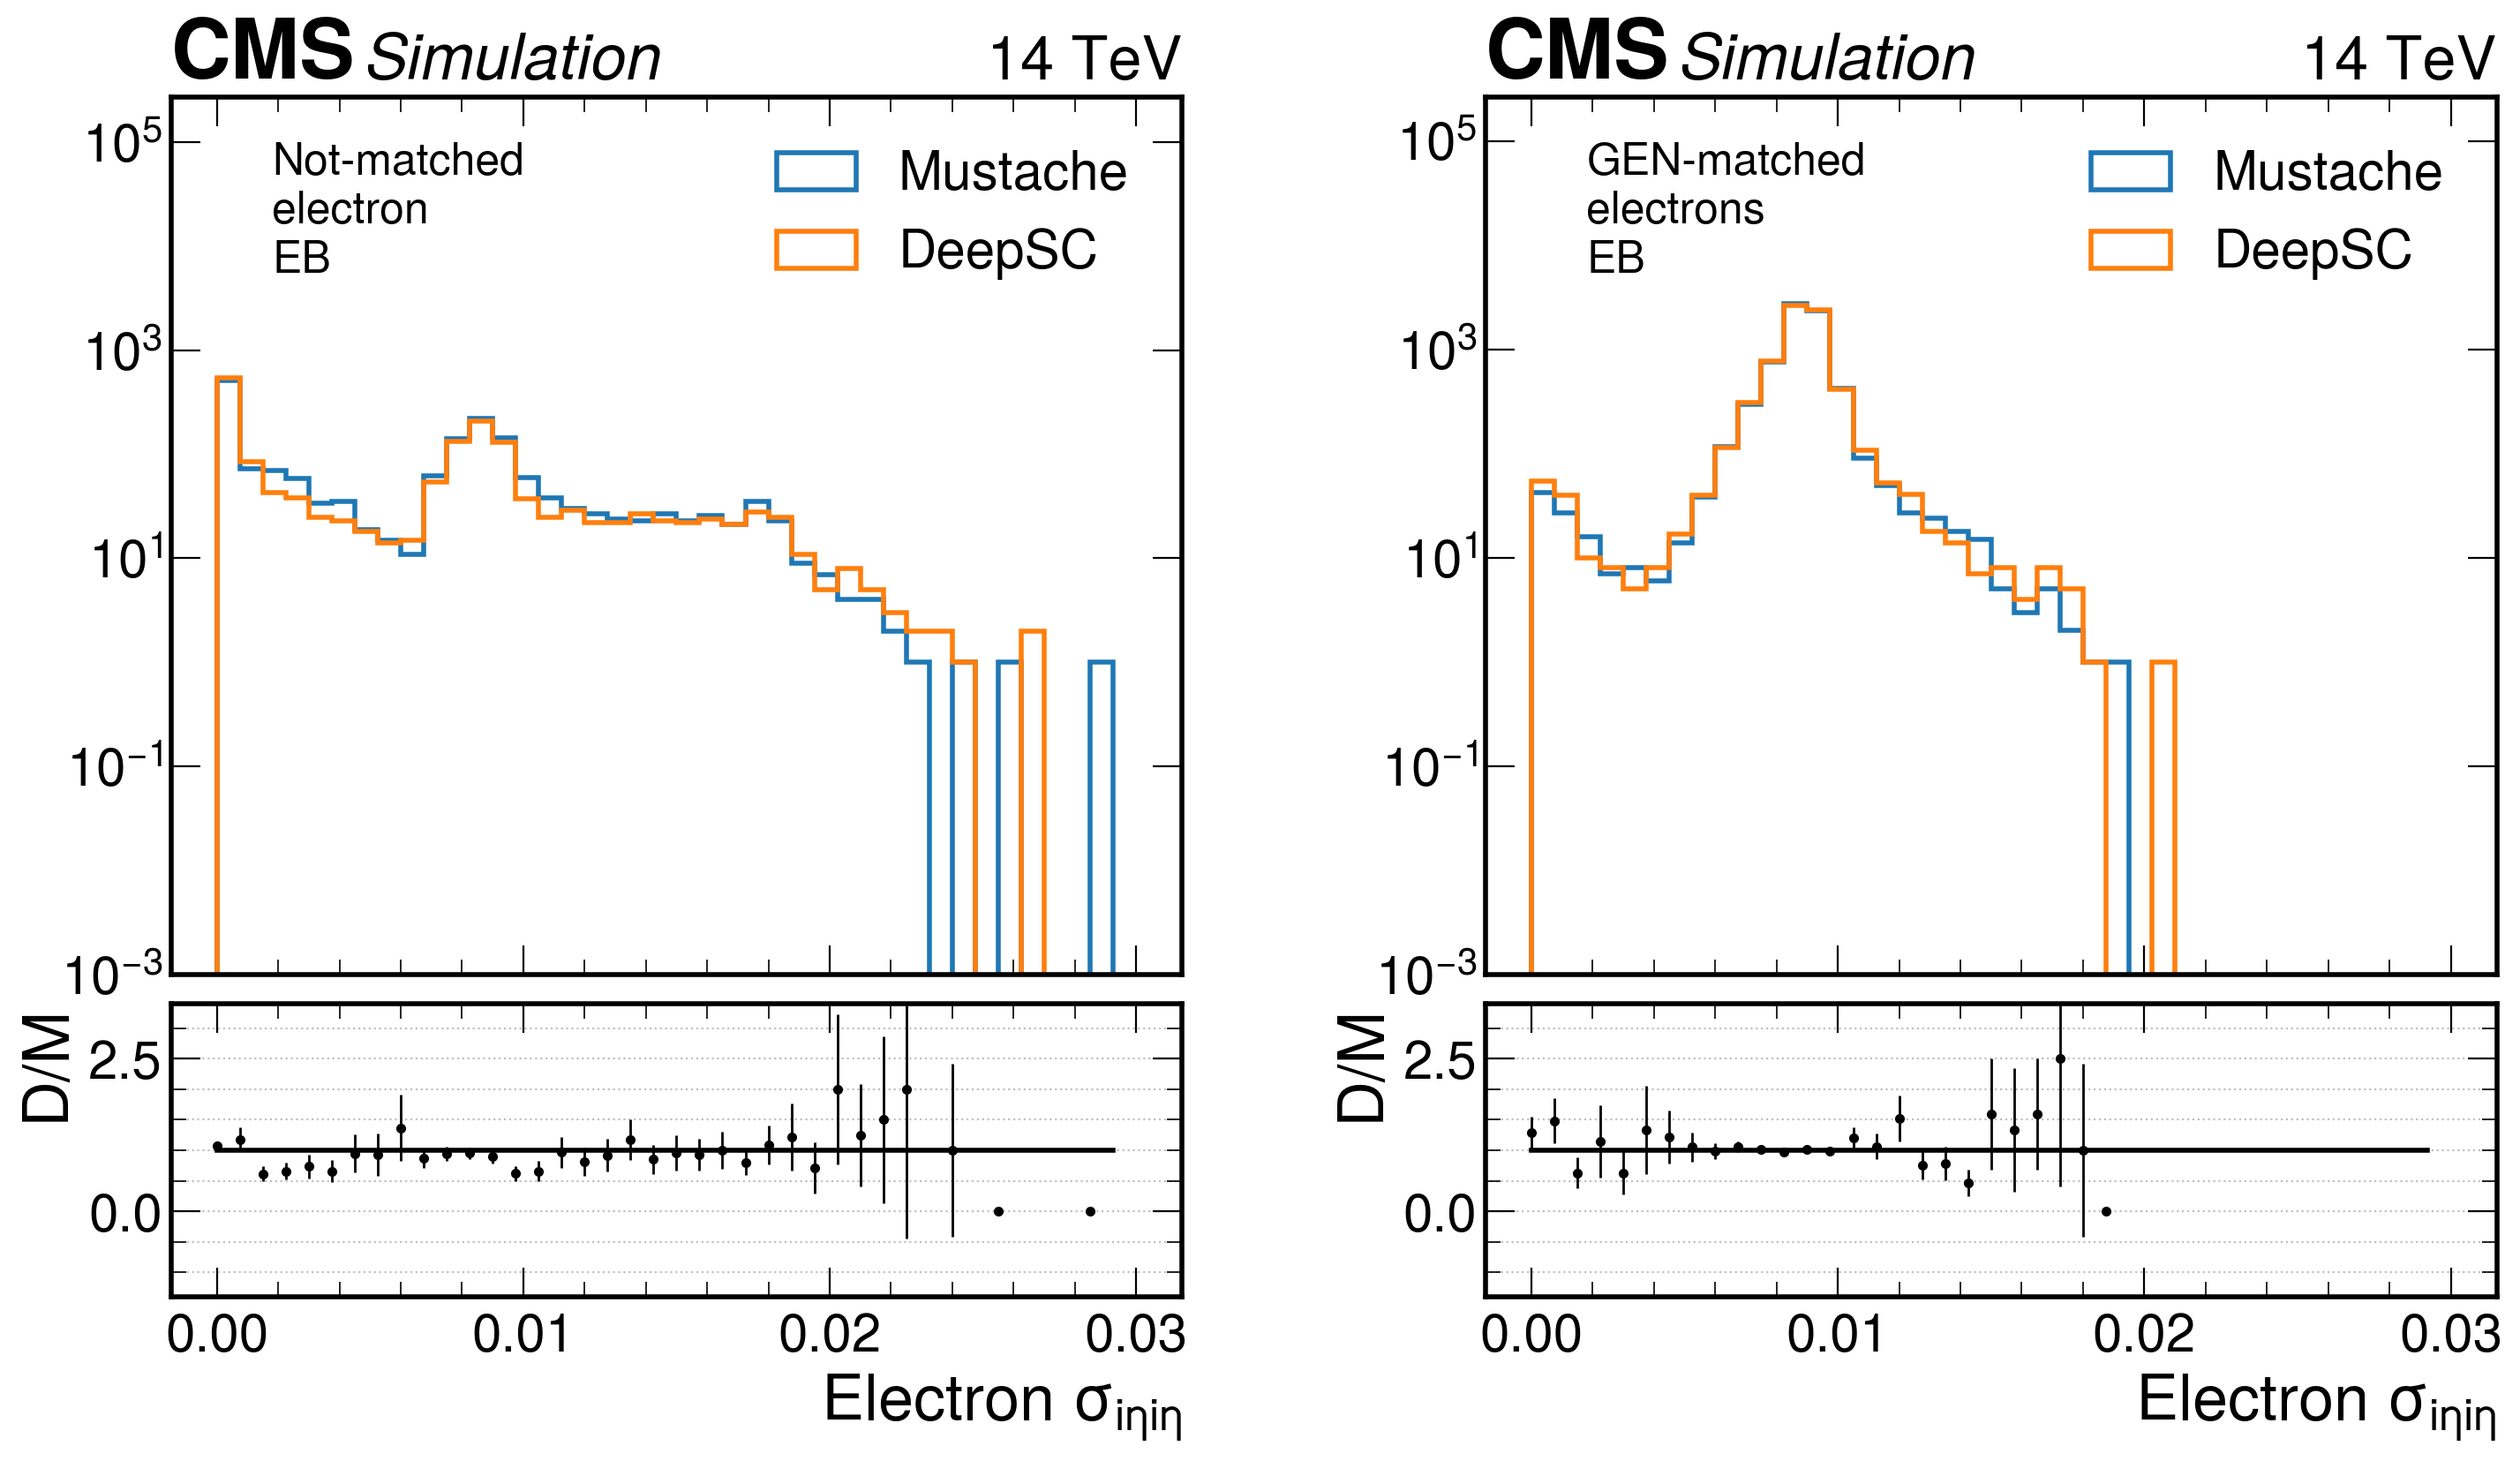

In [20]:
plot_distribution("ele_sigmaIEtaIEta", "Electron $\sigma_{i\eta i\eta}$", 40, (0,0.03), 
                  output_folder+"/basic_distribution_comparison", ylog=True, split_EEEB="EB")

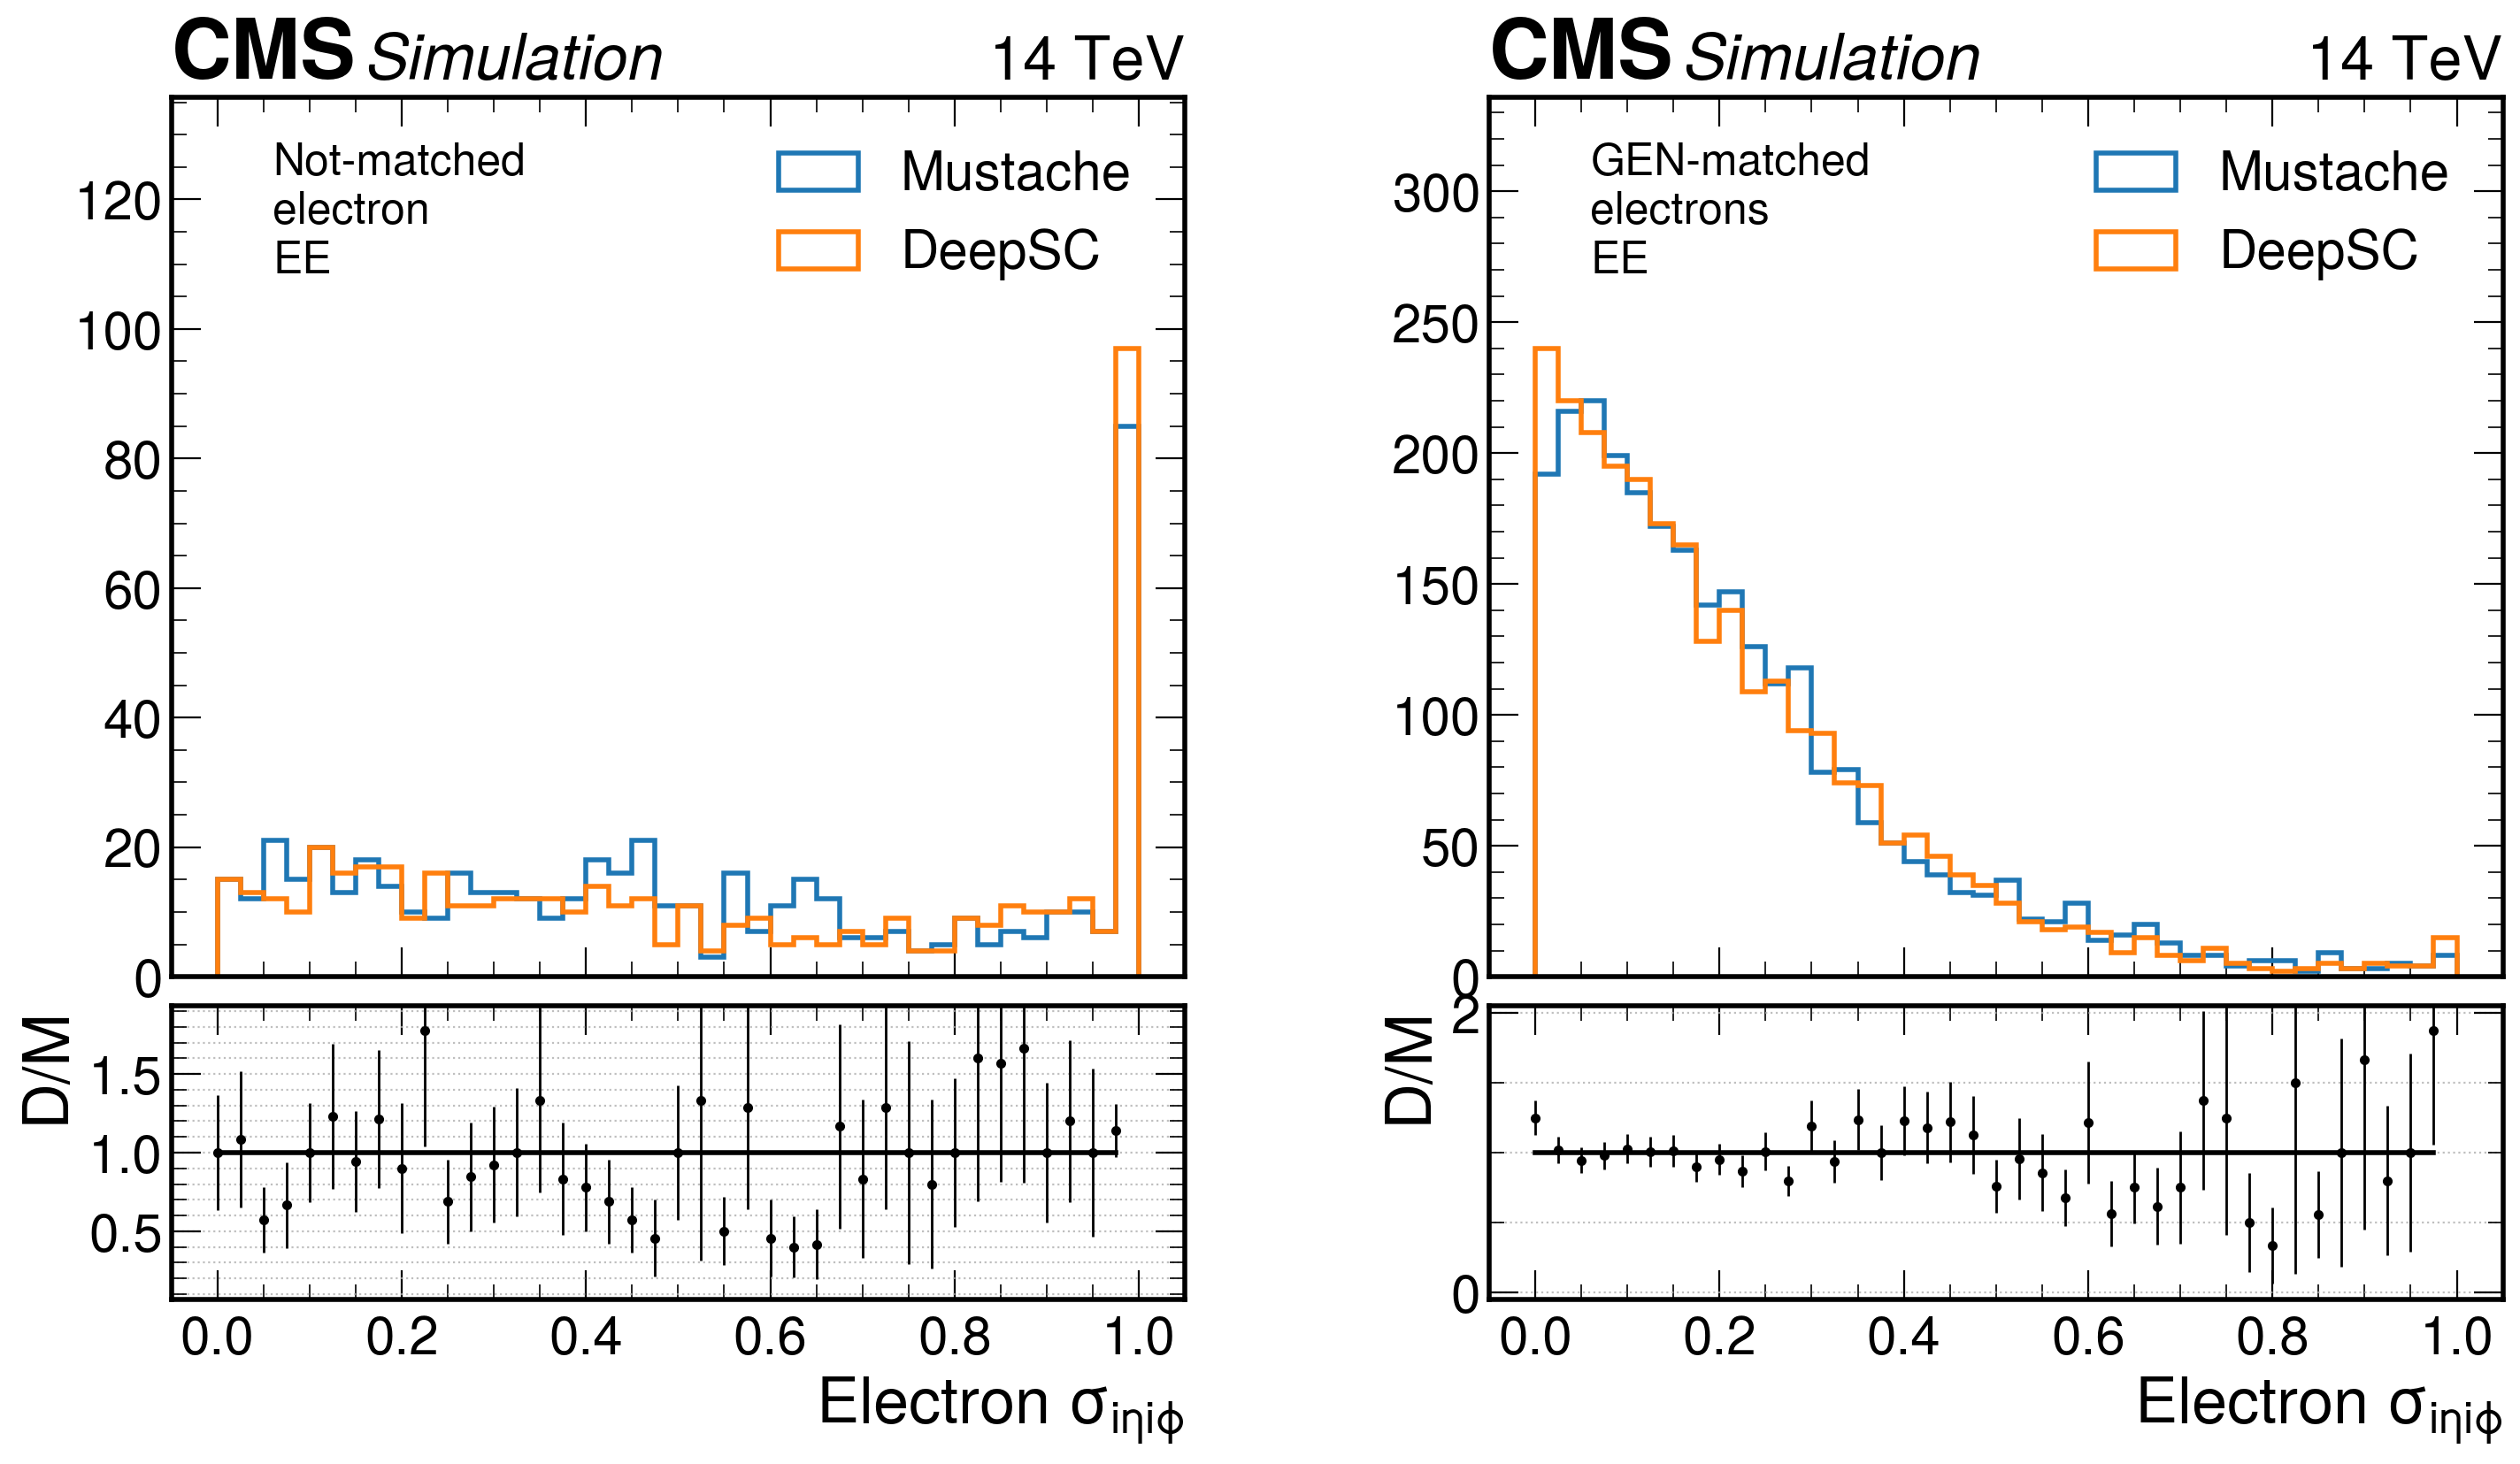

In [21]:
plot_distribution("ele_sigmaIEtaIPhi", "Electron $\sigma_{i\eta i\phi}$", 40, (0,1), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EE")

/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:86: RuntimeWarning: divide by zero encountered in true_divide
  azr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:86: RuntimeWarning: invalid value encountered in true_divide
  azr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:91: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:91: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

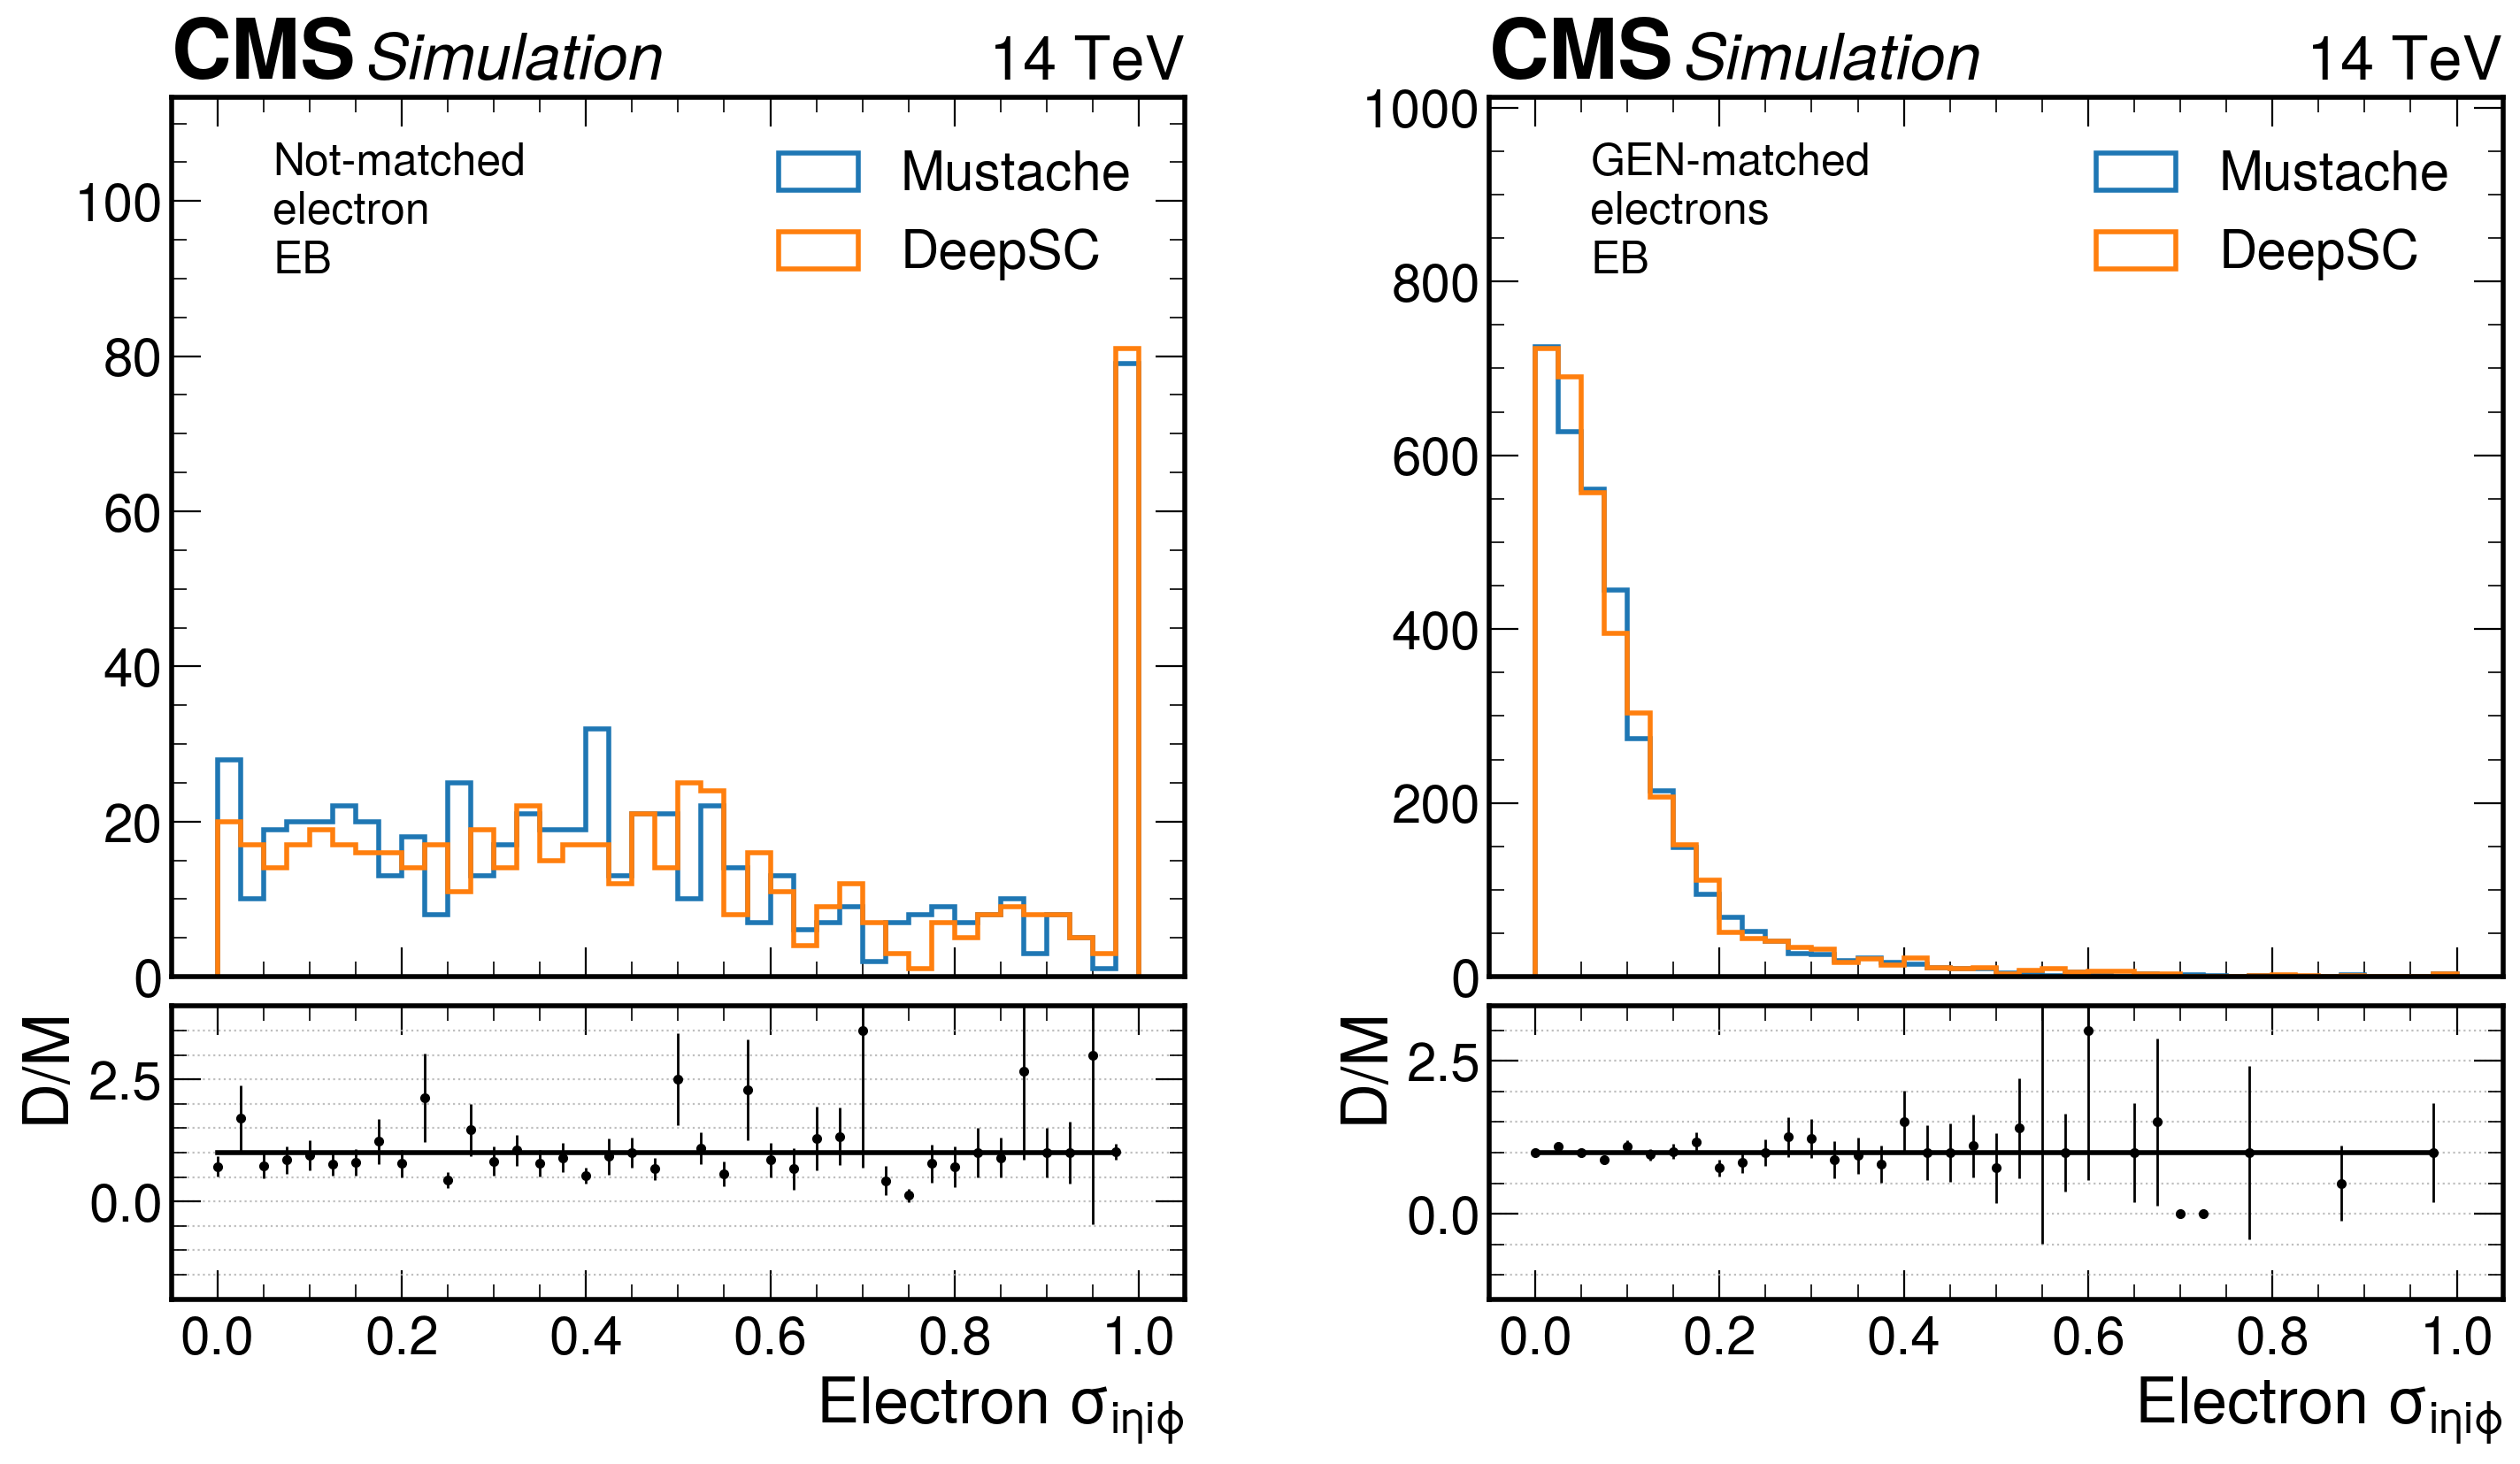

In [22]:
plot_distribution("ele_sigmaIEtaIPhi", "Electron $\sigma_{i\eta i\phi}$", 40, (0,1), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EB")

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

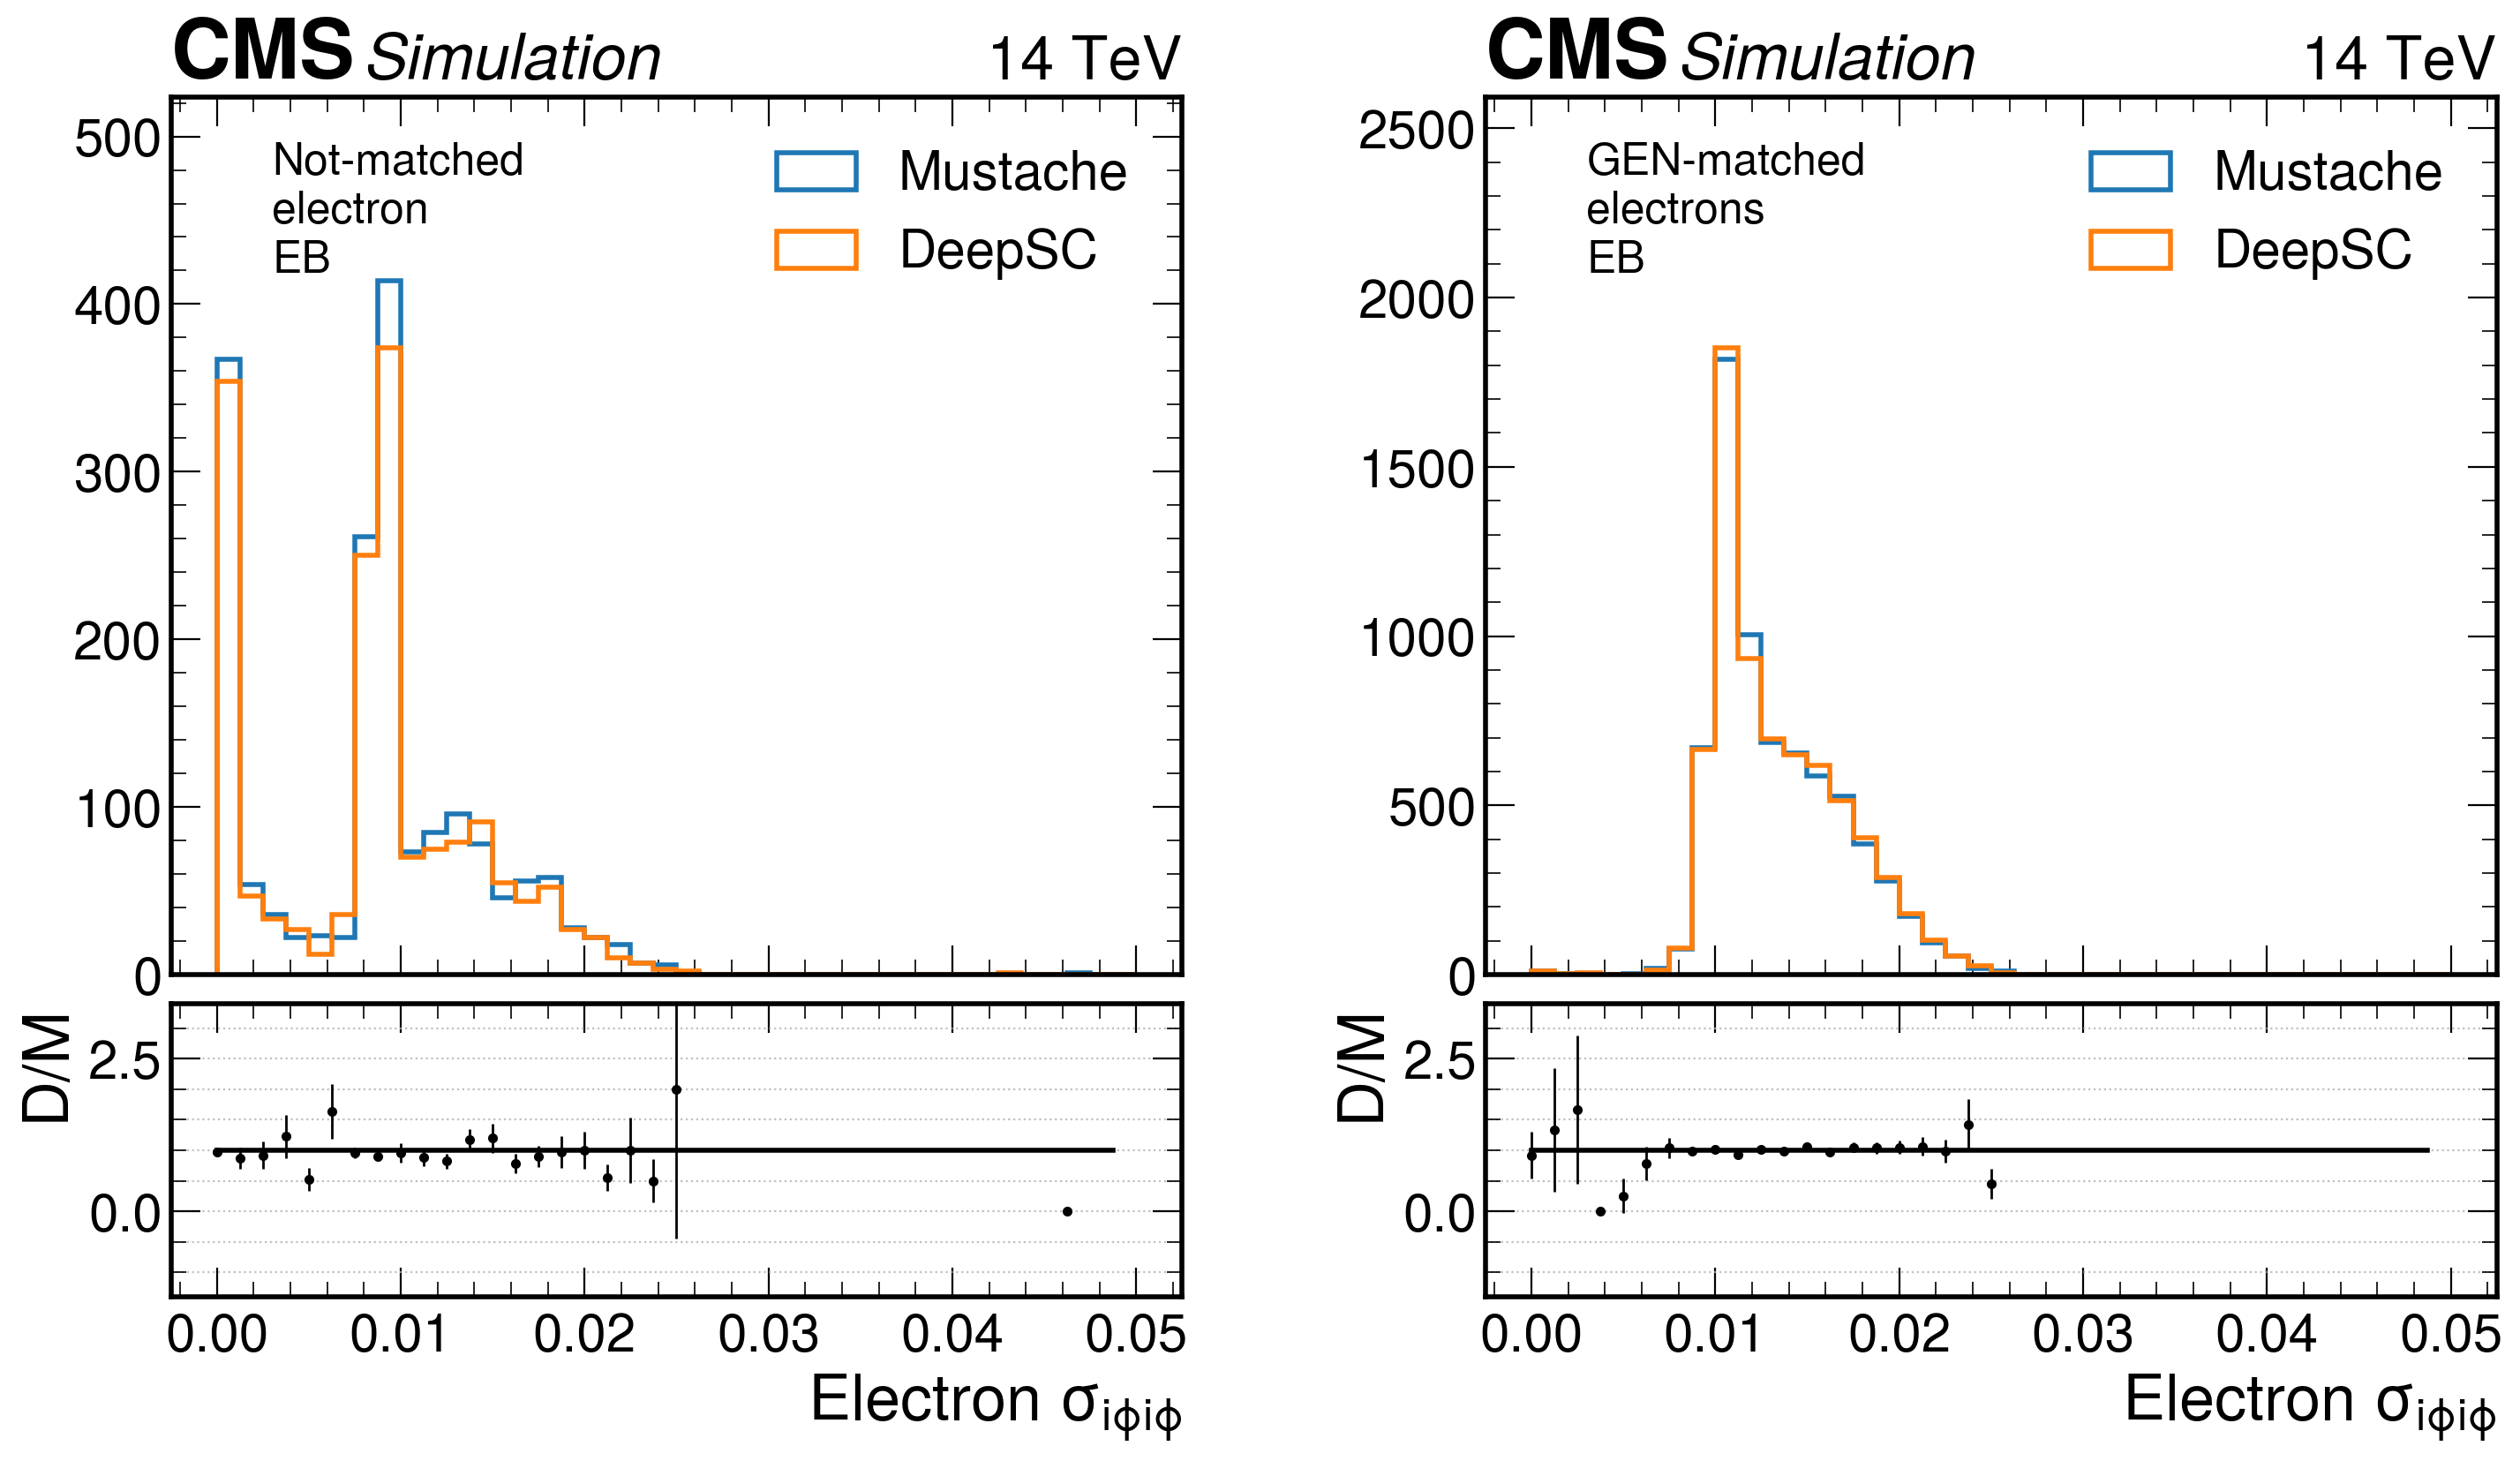

In [23]:
plot_distribution("ele_sigmaIPhiIPhi", "Electron $\sigma_{i\phi i\phi}$", 40, (0,0.05), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EB")

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt(

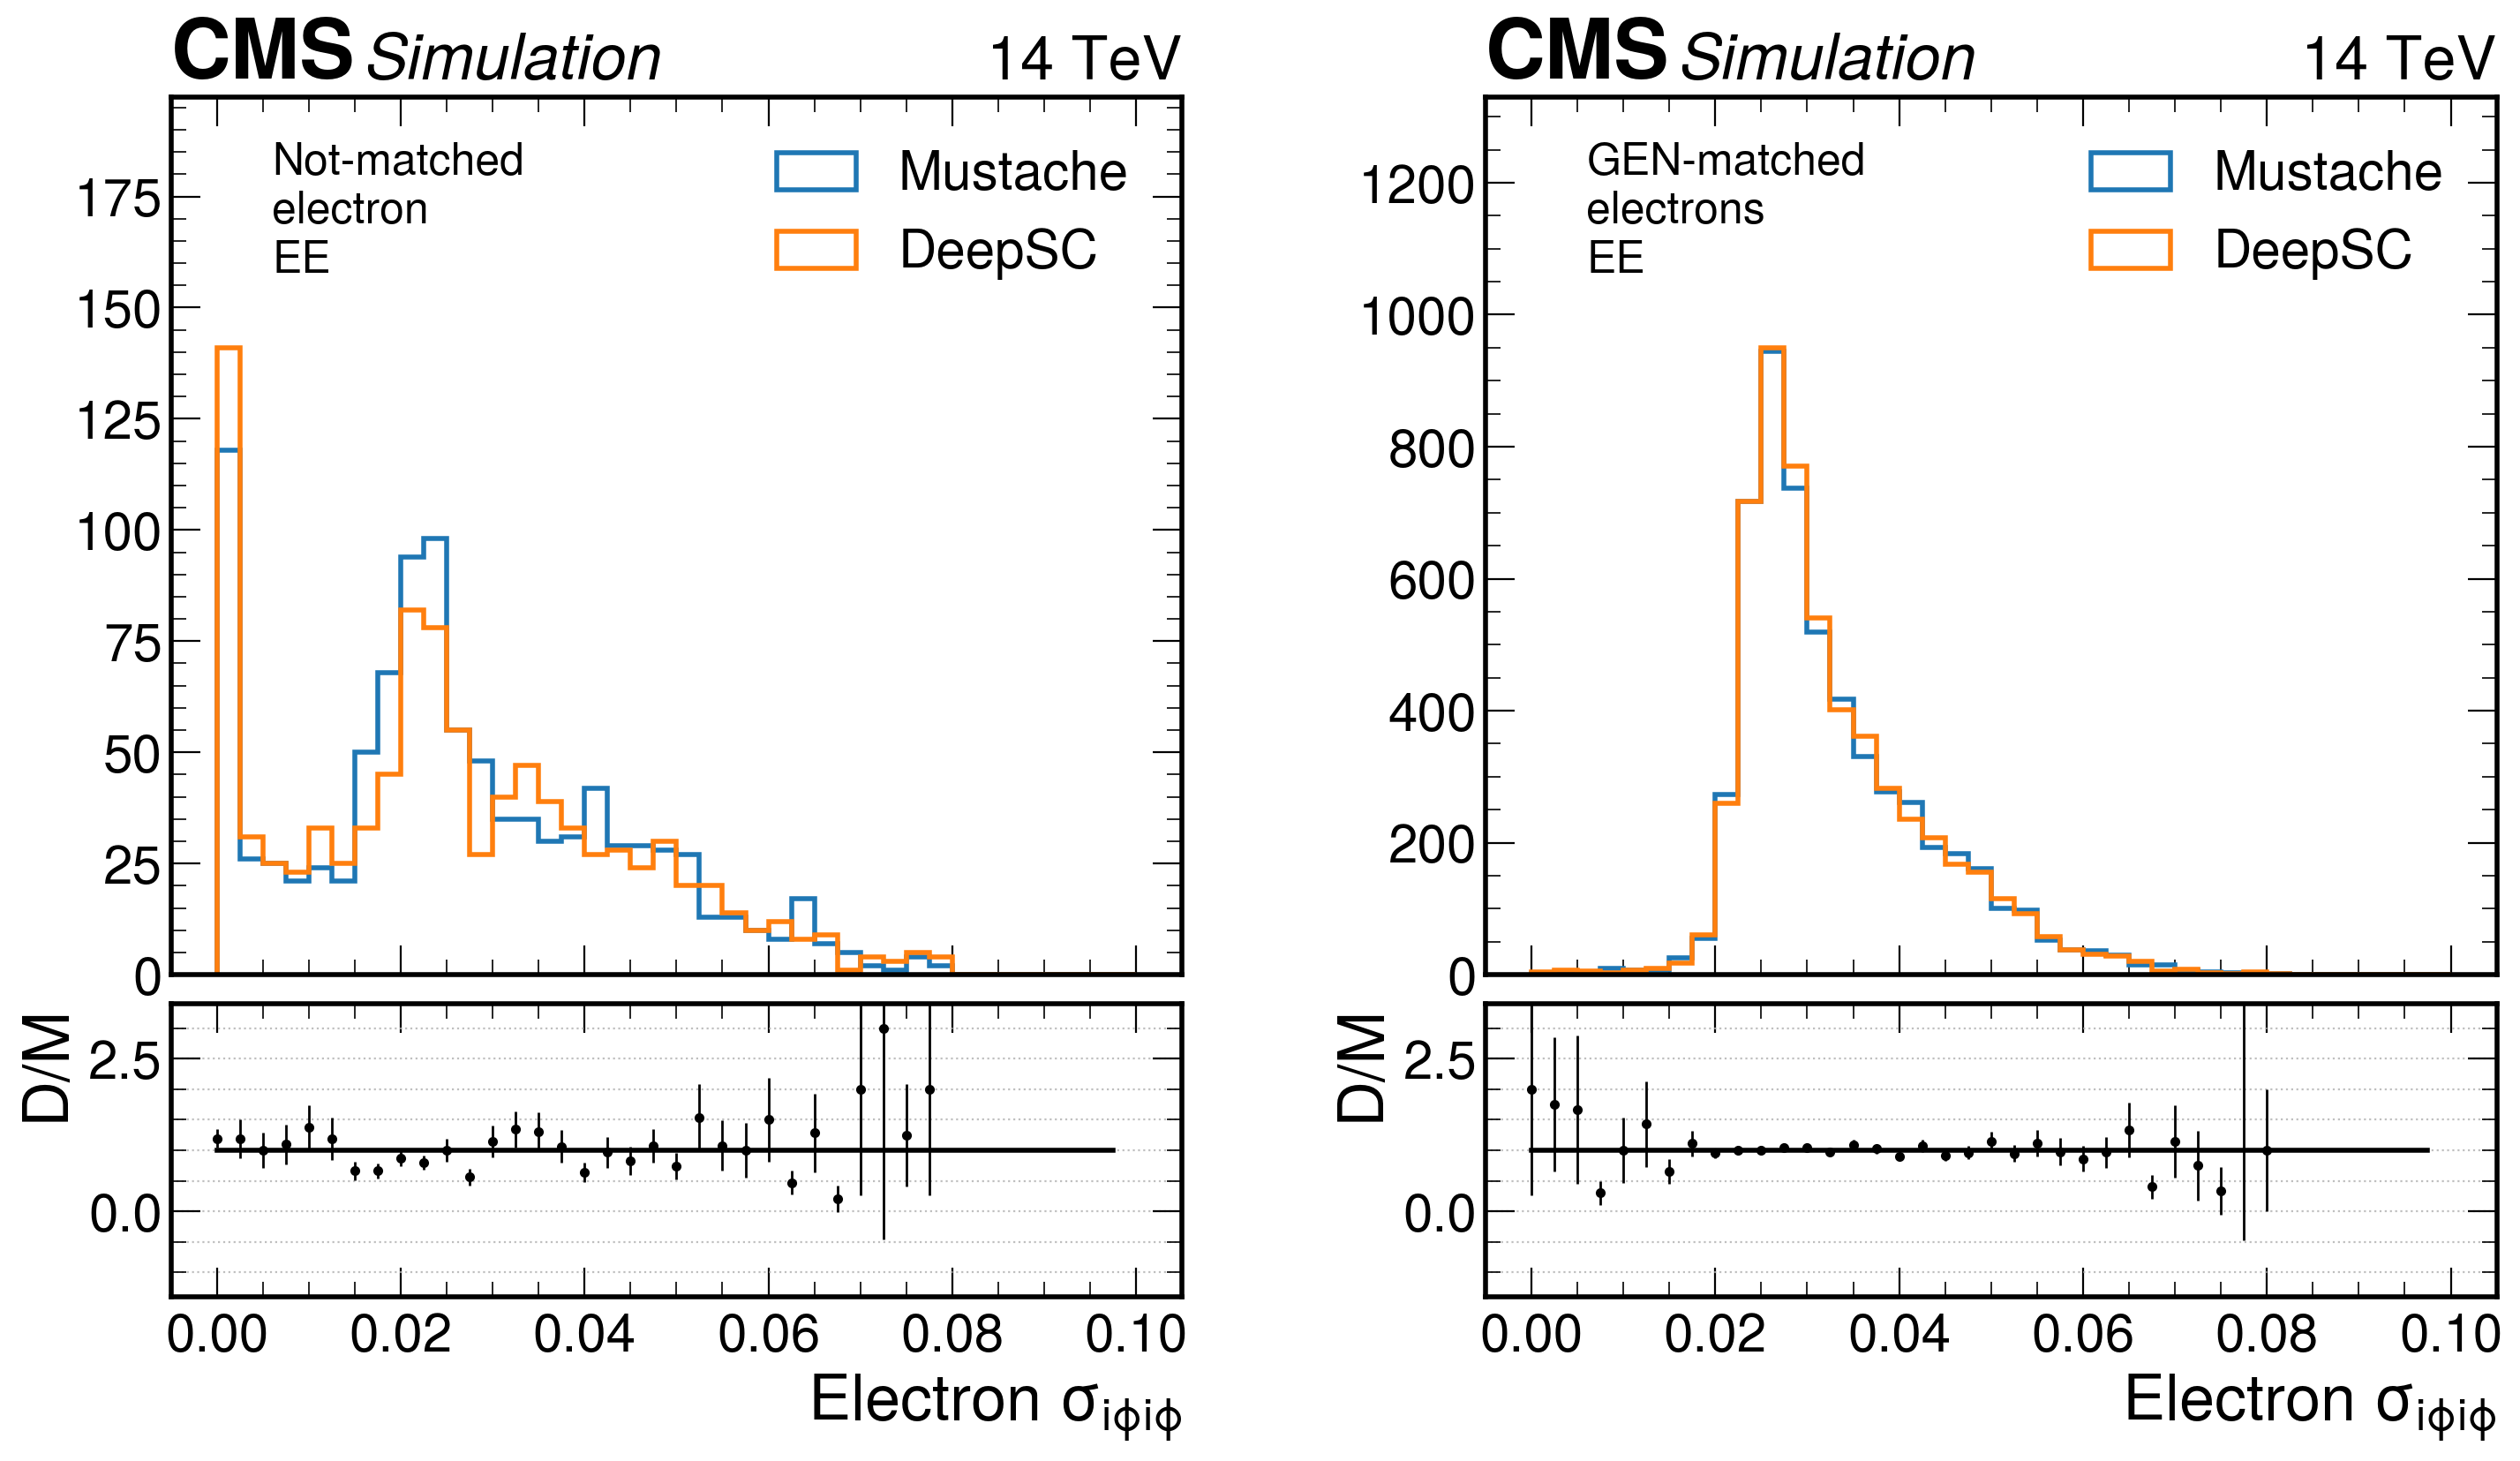

In [24]:
plot_distribution("ele_sigmaIPhiIPhi", "Electron $\sigma_{i\phi i\phi}$", 40, (0,0.1), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EE")

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

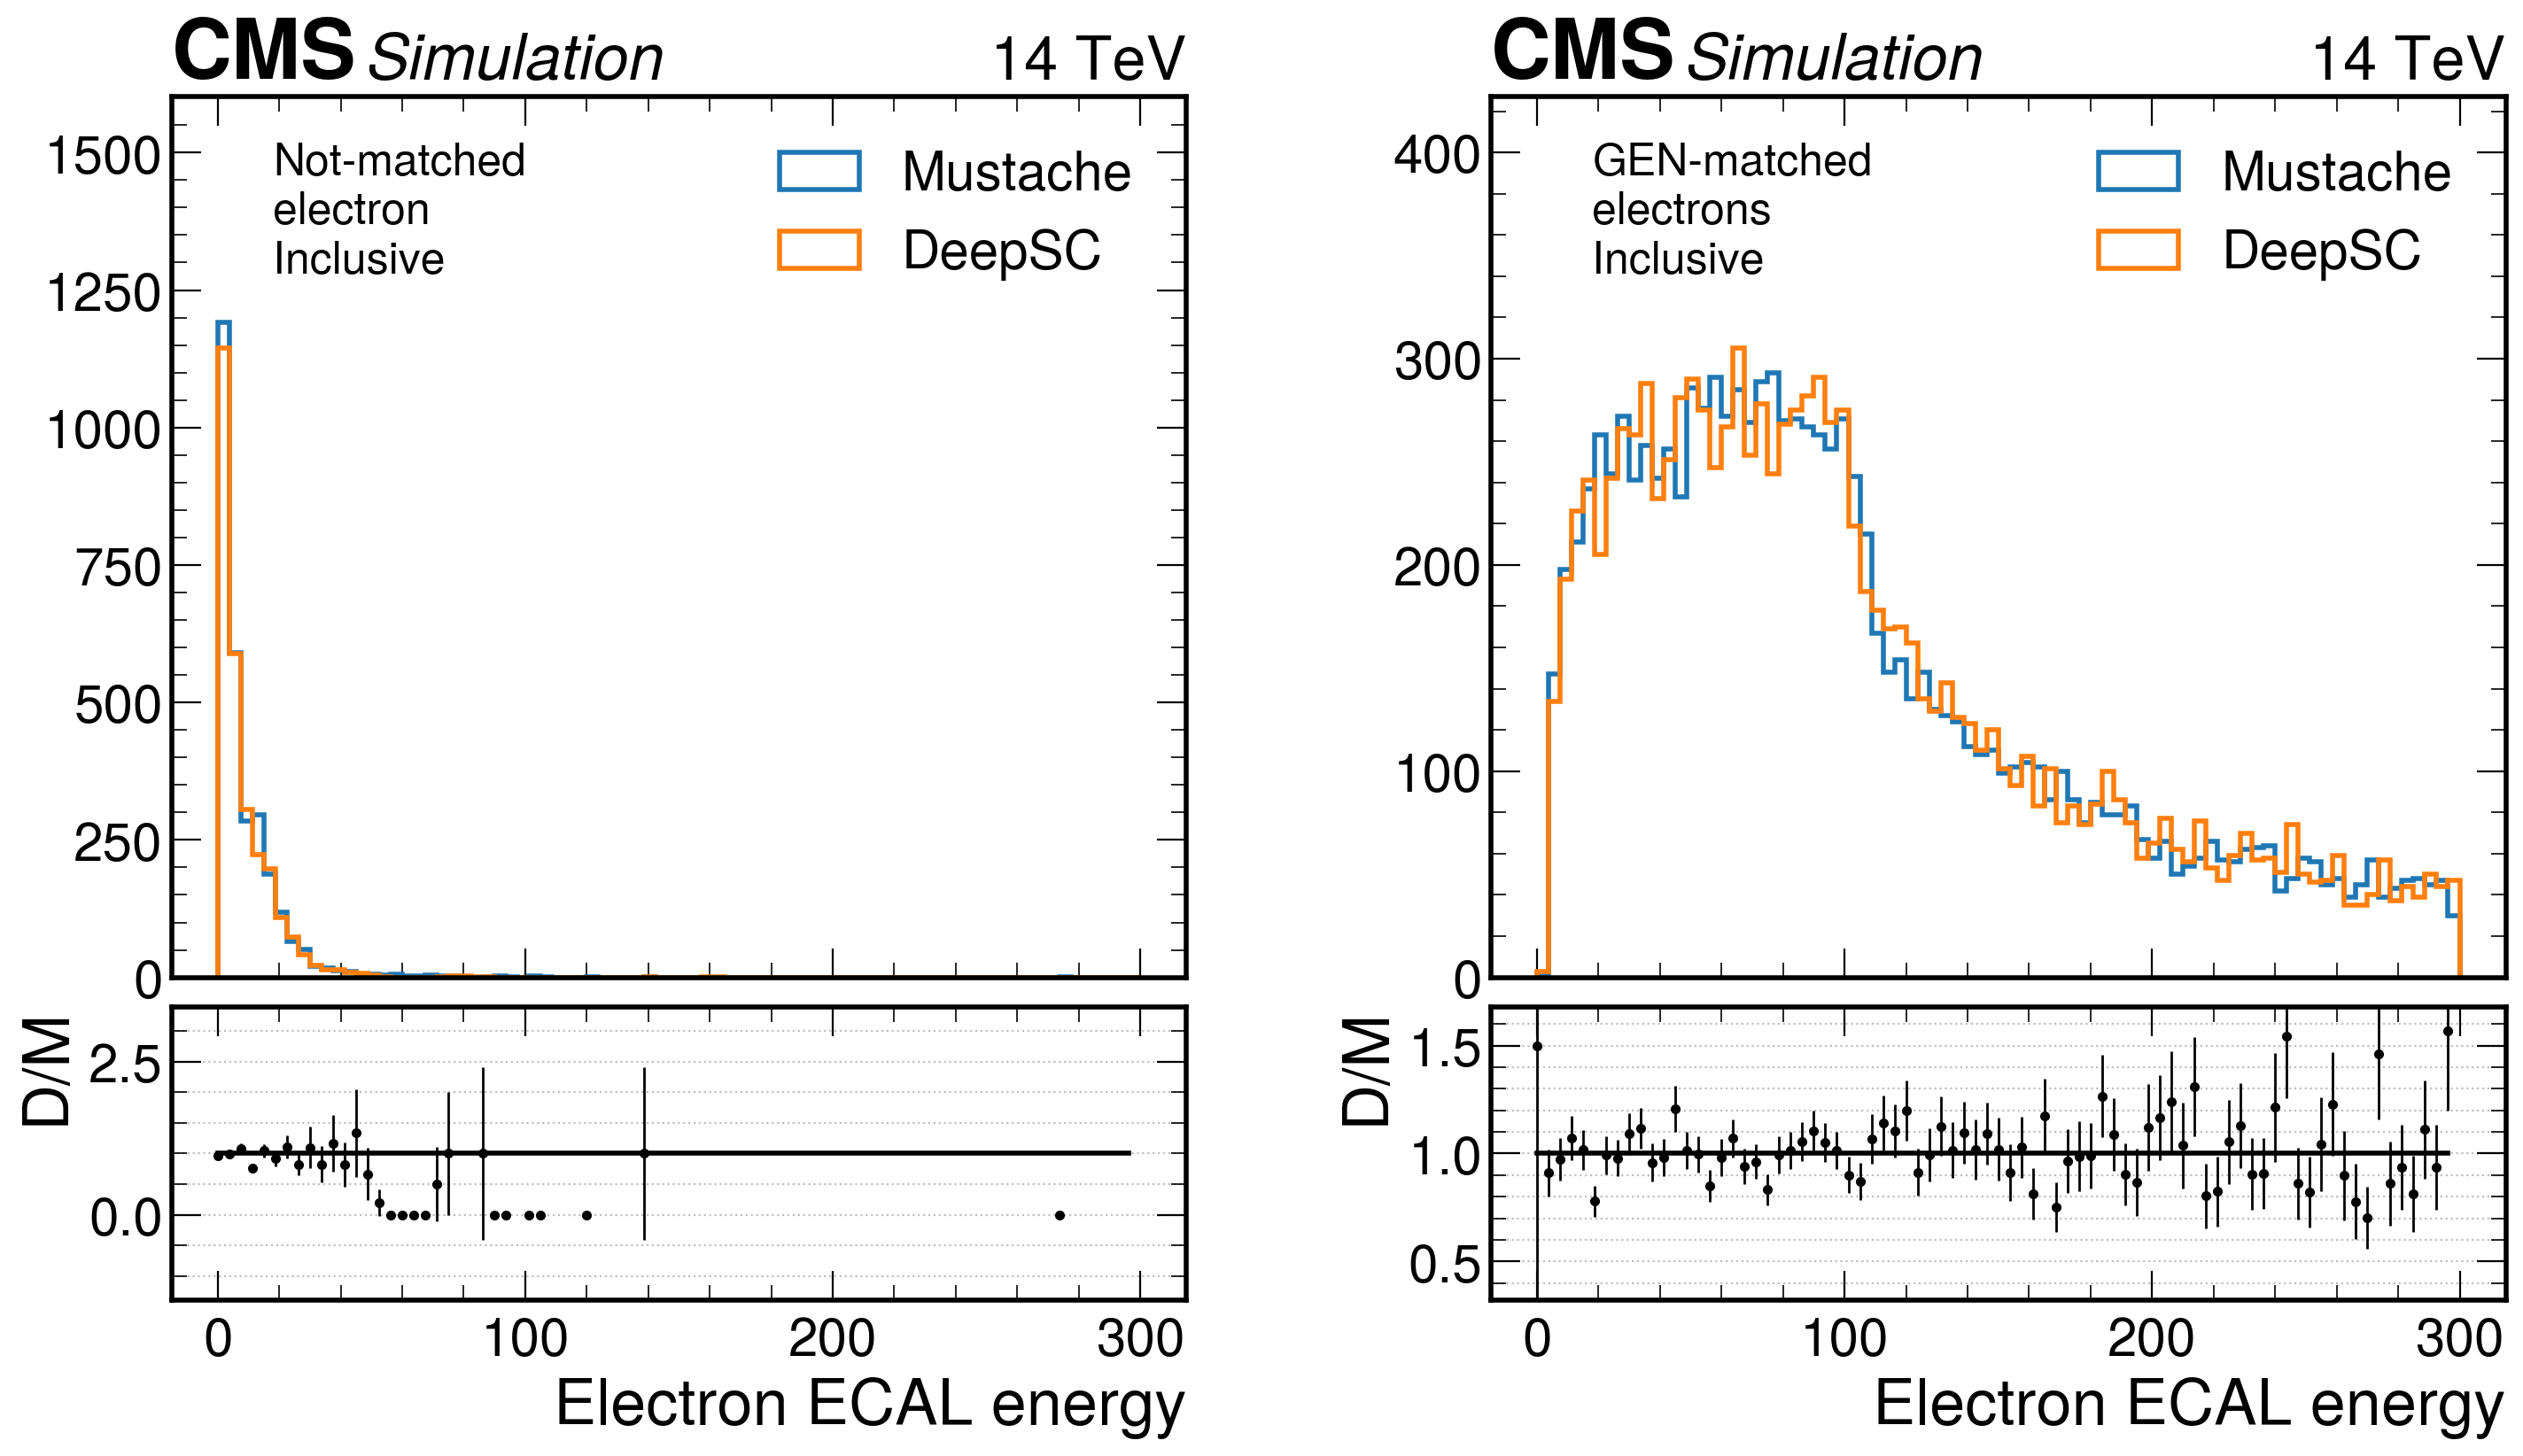

In [25]:
plot_distribution("ele_ecalEnergy", "Electron ECAL energy", 80, (0,300), 
                  output_folder+"/basic_distribution_comparison", ylog=False)

In [26]:
df_1.columns

Index(['obj_index', 'sc_matched', 'calomatched', 'caloindex', 'genmatched',
       'genindex', 'sc_index', 'seed_index', 'en_seed', 'et_seed',
       'en_seed_calib', 'et_seed_calib', 'seed_eta', 'seed_phi', 'seed_iz',
       'ele_eta', 'ele_phi', 'ele_energy', 'ele_et', 'ele_ecalEnergy',
       'ele_scRawEnergy', 'ele_scRawESEnergy', 'ele_fbrem', 'ele_e5x5',
       'ele_e3x3', 'ele_sigmaIEtaIEta', 'ele_sigmaIEtaIPhi',
       'ele_sigmaIPhiIPhi', 'ele_ecalDriveSeed', 'ele_hademCone',
       'ele_trkPModeErr', 'ele_trkPMode', 'ele_trkEtaMode', 'ele_trkPhiMode',
       'ncls_sel', 'ncls_sel_true', 'ncls_sel_false', 'ncls_true', 'ncls_tot',
       'ncls_missing', 'en_sc_raw', 'et_sc_raw', 'en_sc_calib', 'et_sc_calib',
       'calo_en_gen', 'calo_et_gen', 'calo_en_sim', 'calo_et_sim',
       'calo_geneta', 'calo_genphi', 'calo_simeta', 'calo_simphi',
       'calo_genpt', 'genpart_en', 'genpart_et', 'gen_eta', 'gen_phi',
       'gen_pt', 'nVtx', 'rho', 'obsPU', 'truePU', 'eventId', 'runId',

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

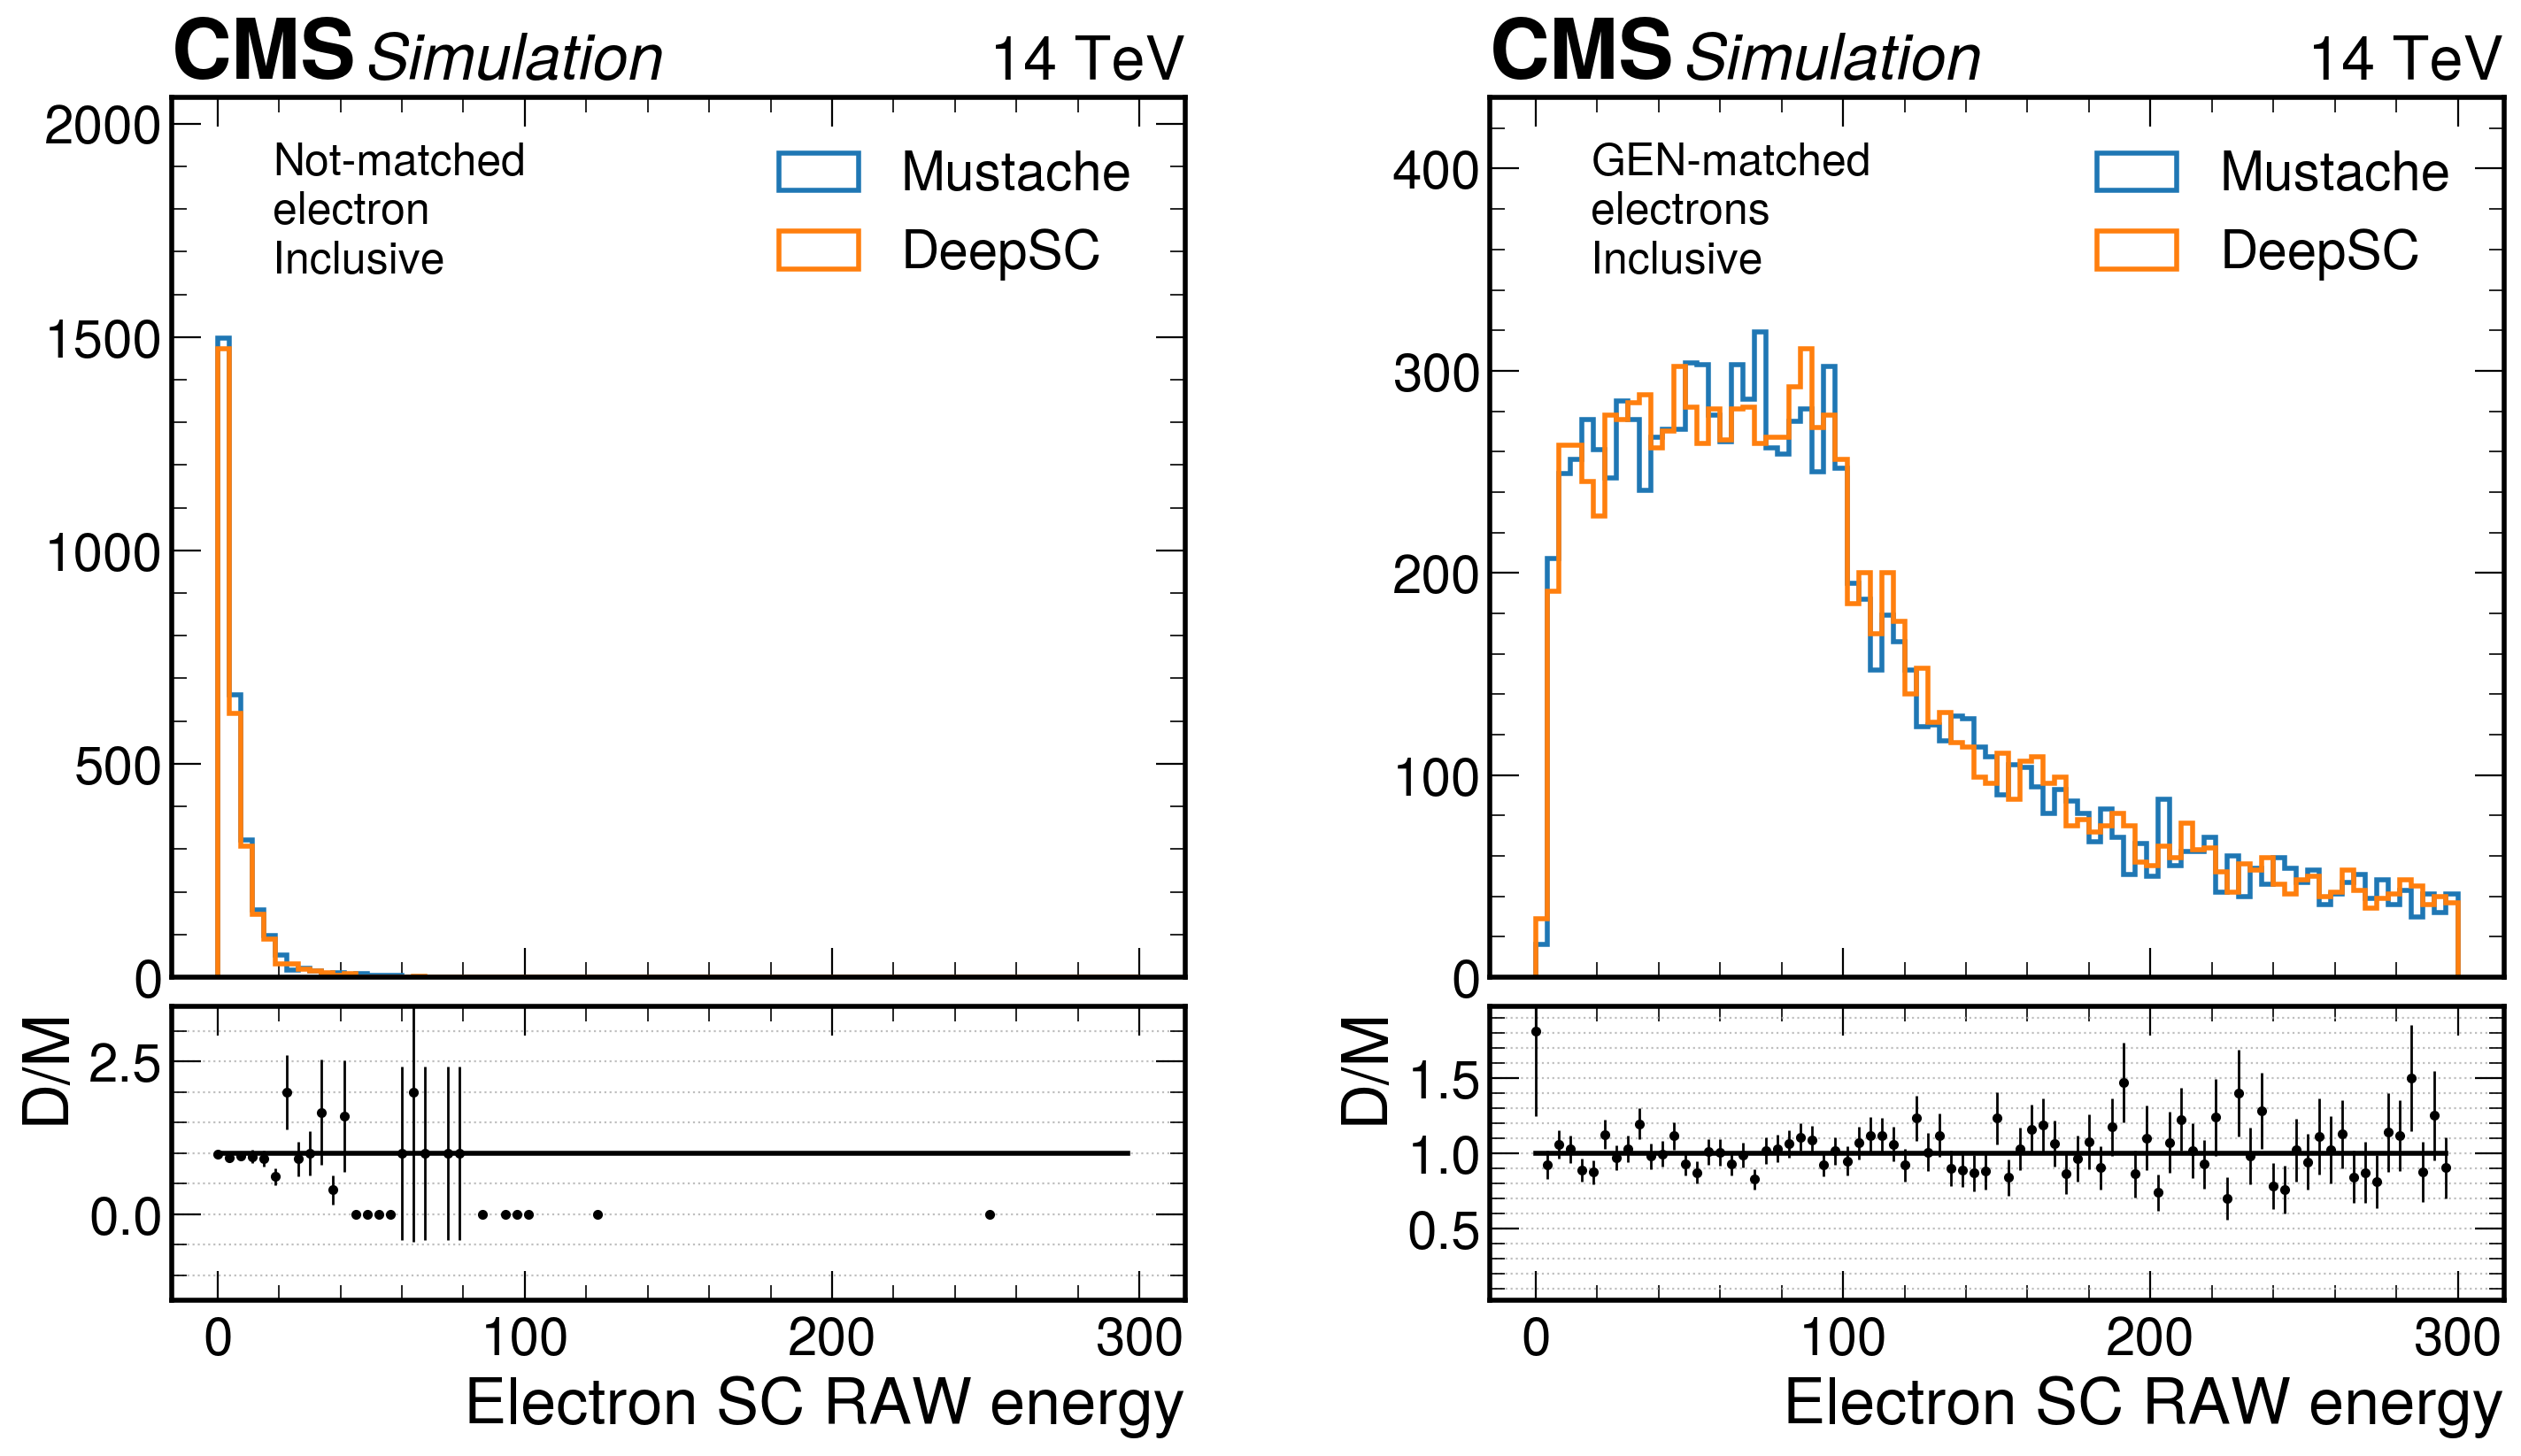

In [27]:
plot_distribution("ele_scRawEnergy", "Electron SC RAW energy", 80, (0,300), 
                  output_folder+"/basic_distribution_comparison", ylog=False)

/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:84: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:86: RuntimeWarning: divide by zero encountered in true_divide
  azr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:86: RuntimeWarning: invalid value encountered in true_divide
  azr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:91: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:91: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

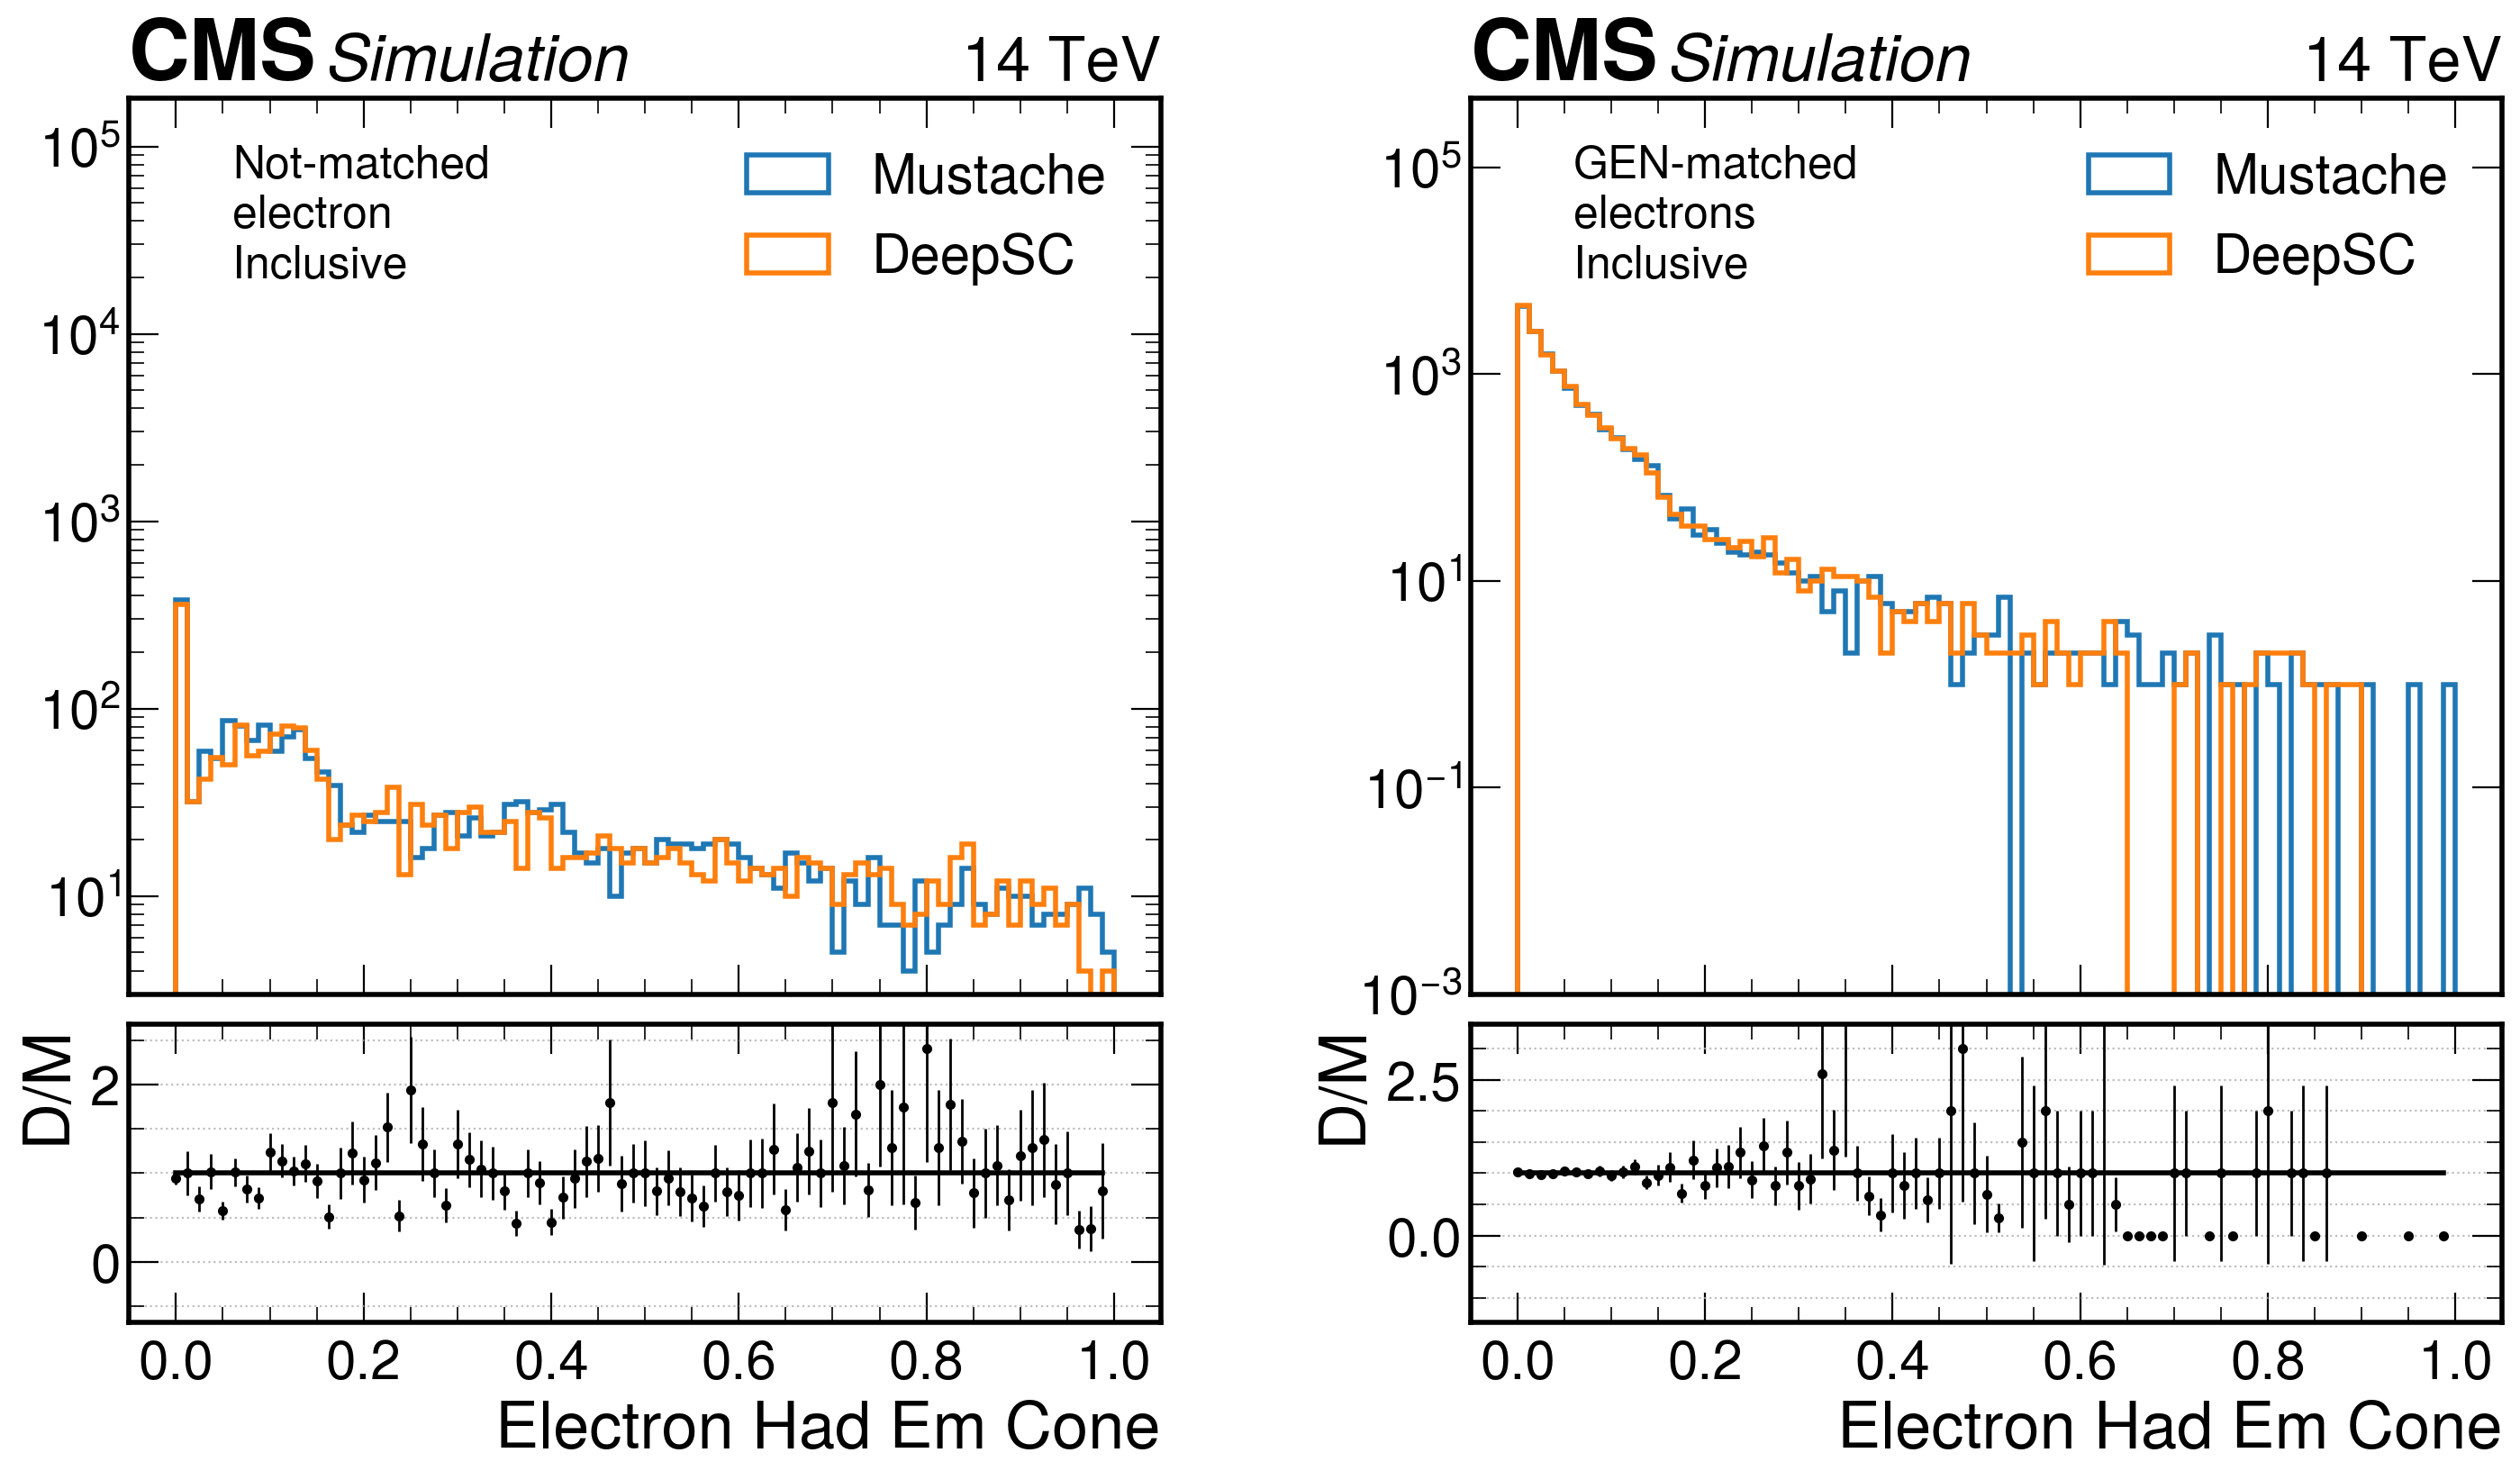

In [28]:
plot_distribution("ele_hademCone", "Electron Had Em Cone", 80, (0,1), 
                  output_folder+"/basic_distribution_comparison", ylog=True)

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: divide by zero encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: divide by zero encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs

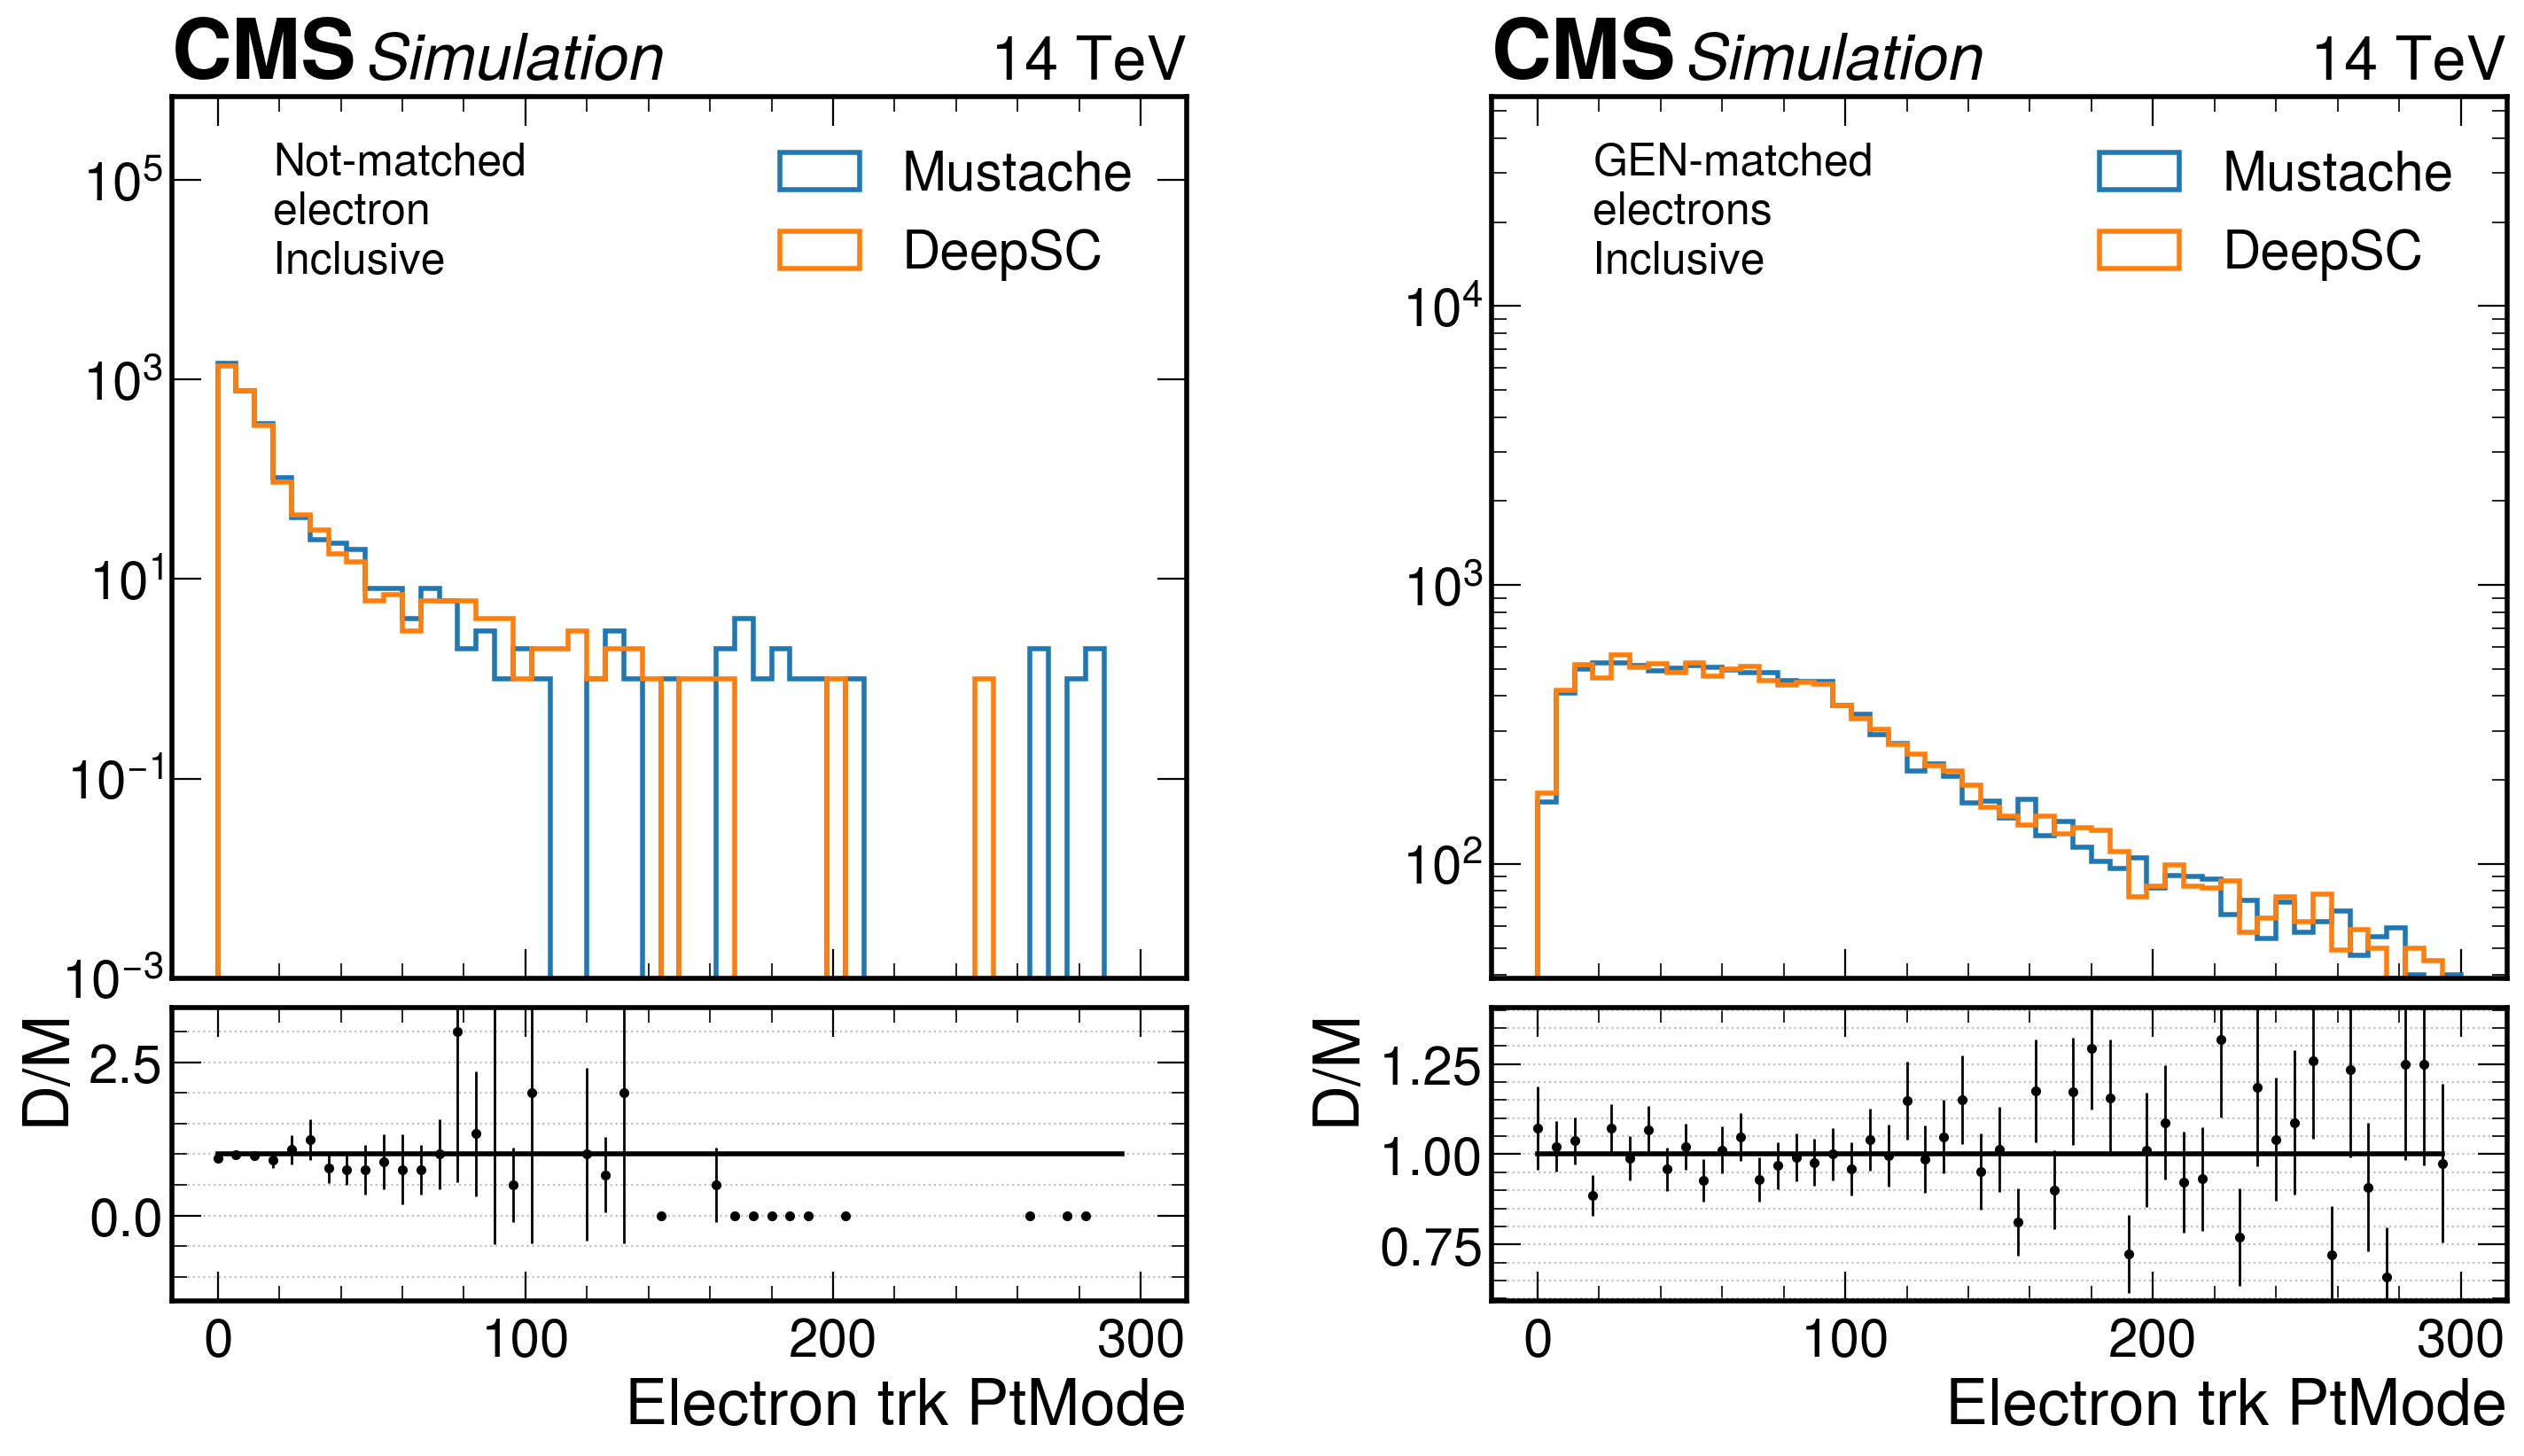

In [29]:
plot_distribution("ele_trkPMode", "Electron trk PtMode", 50, (0,300), 
                  output_folder+"/basic_distribution_comparison", ylog=True)

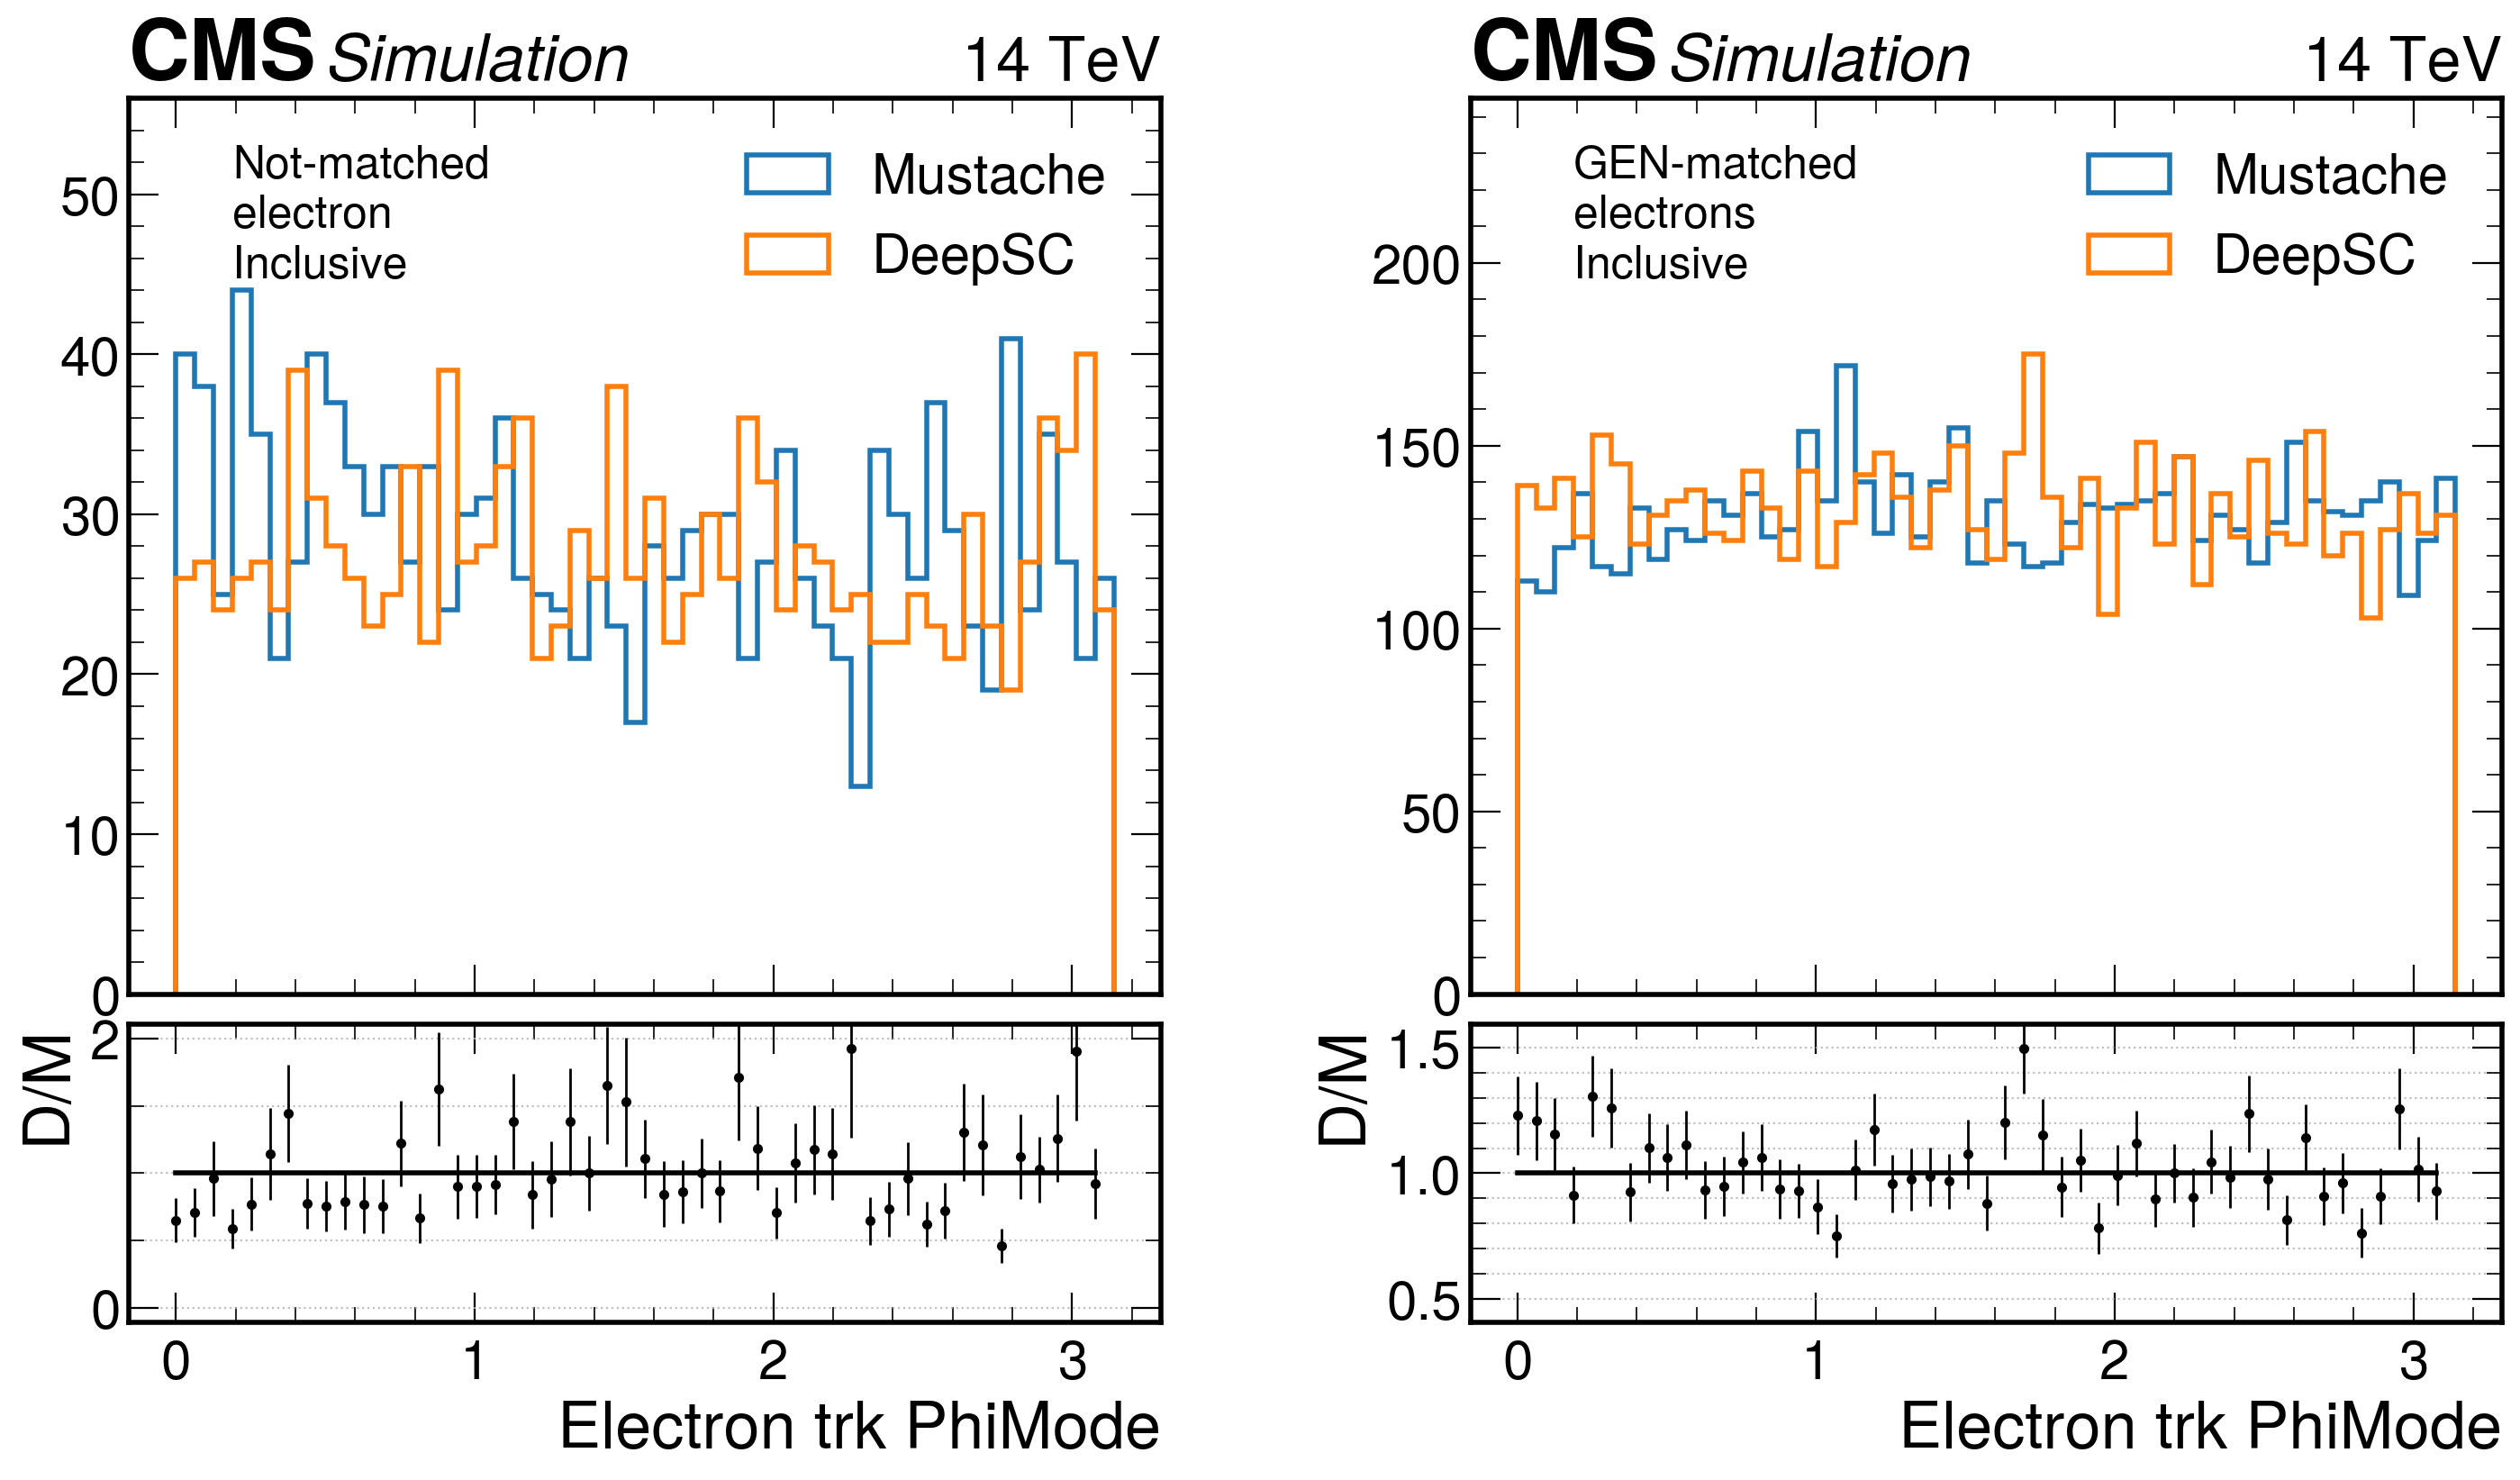

In [30]:
plot_distribution("ele_trkPhiMode", "Electron trk PhiMode", 50, (0,3.14), 
                  output_folder+"/basic_distribution_comparison", ylog=False)

/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:42: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_751/4264340616.py:44: RuntimeWarning: invalid value encountered in true_divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_751/4264340616.py:47: RuntimeWarning: invalid value encountered in true_divide
  deltaM = np.max(np.abs((A/B)-1))


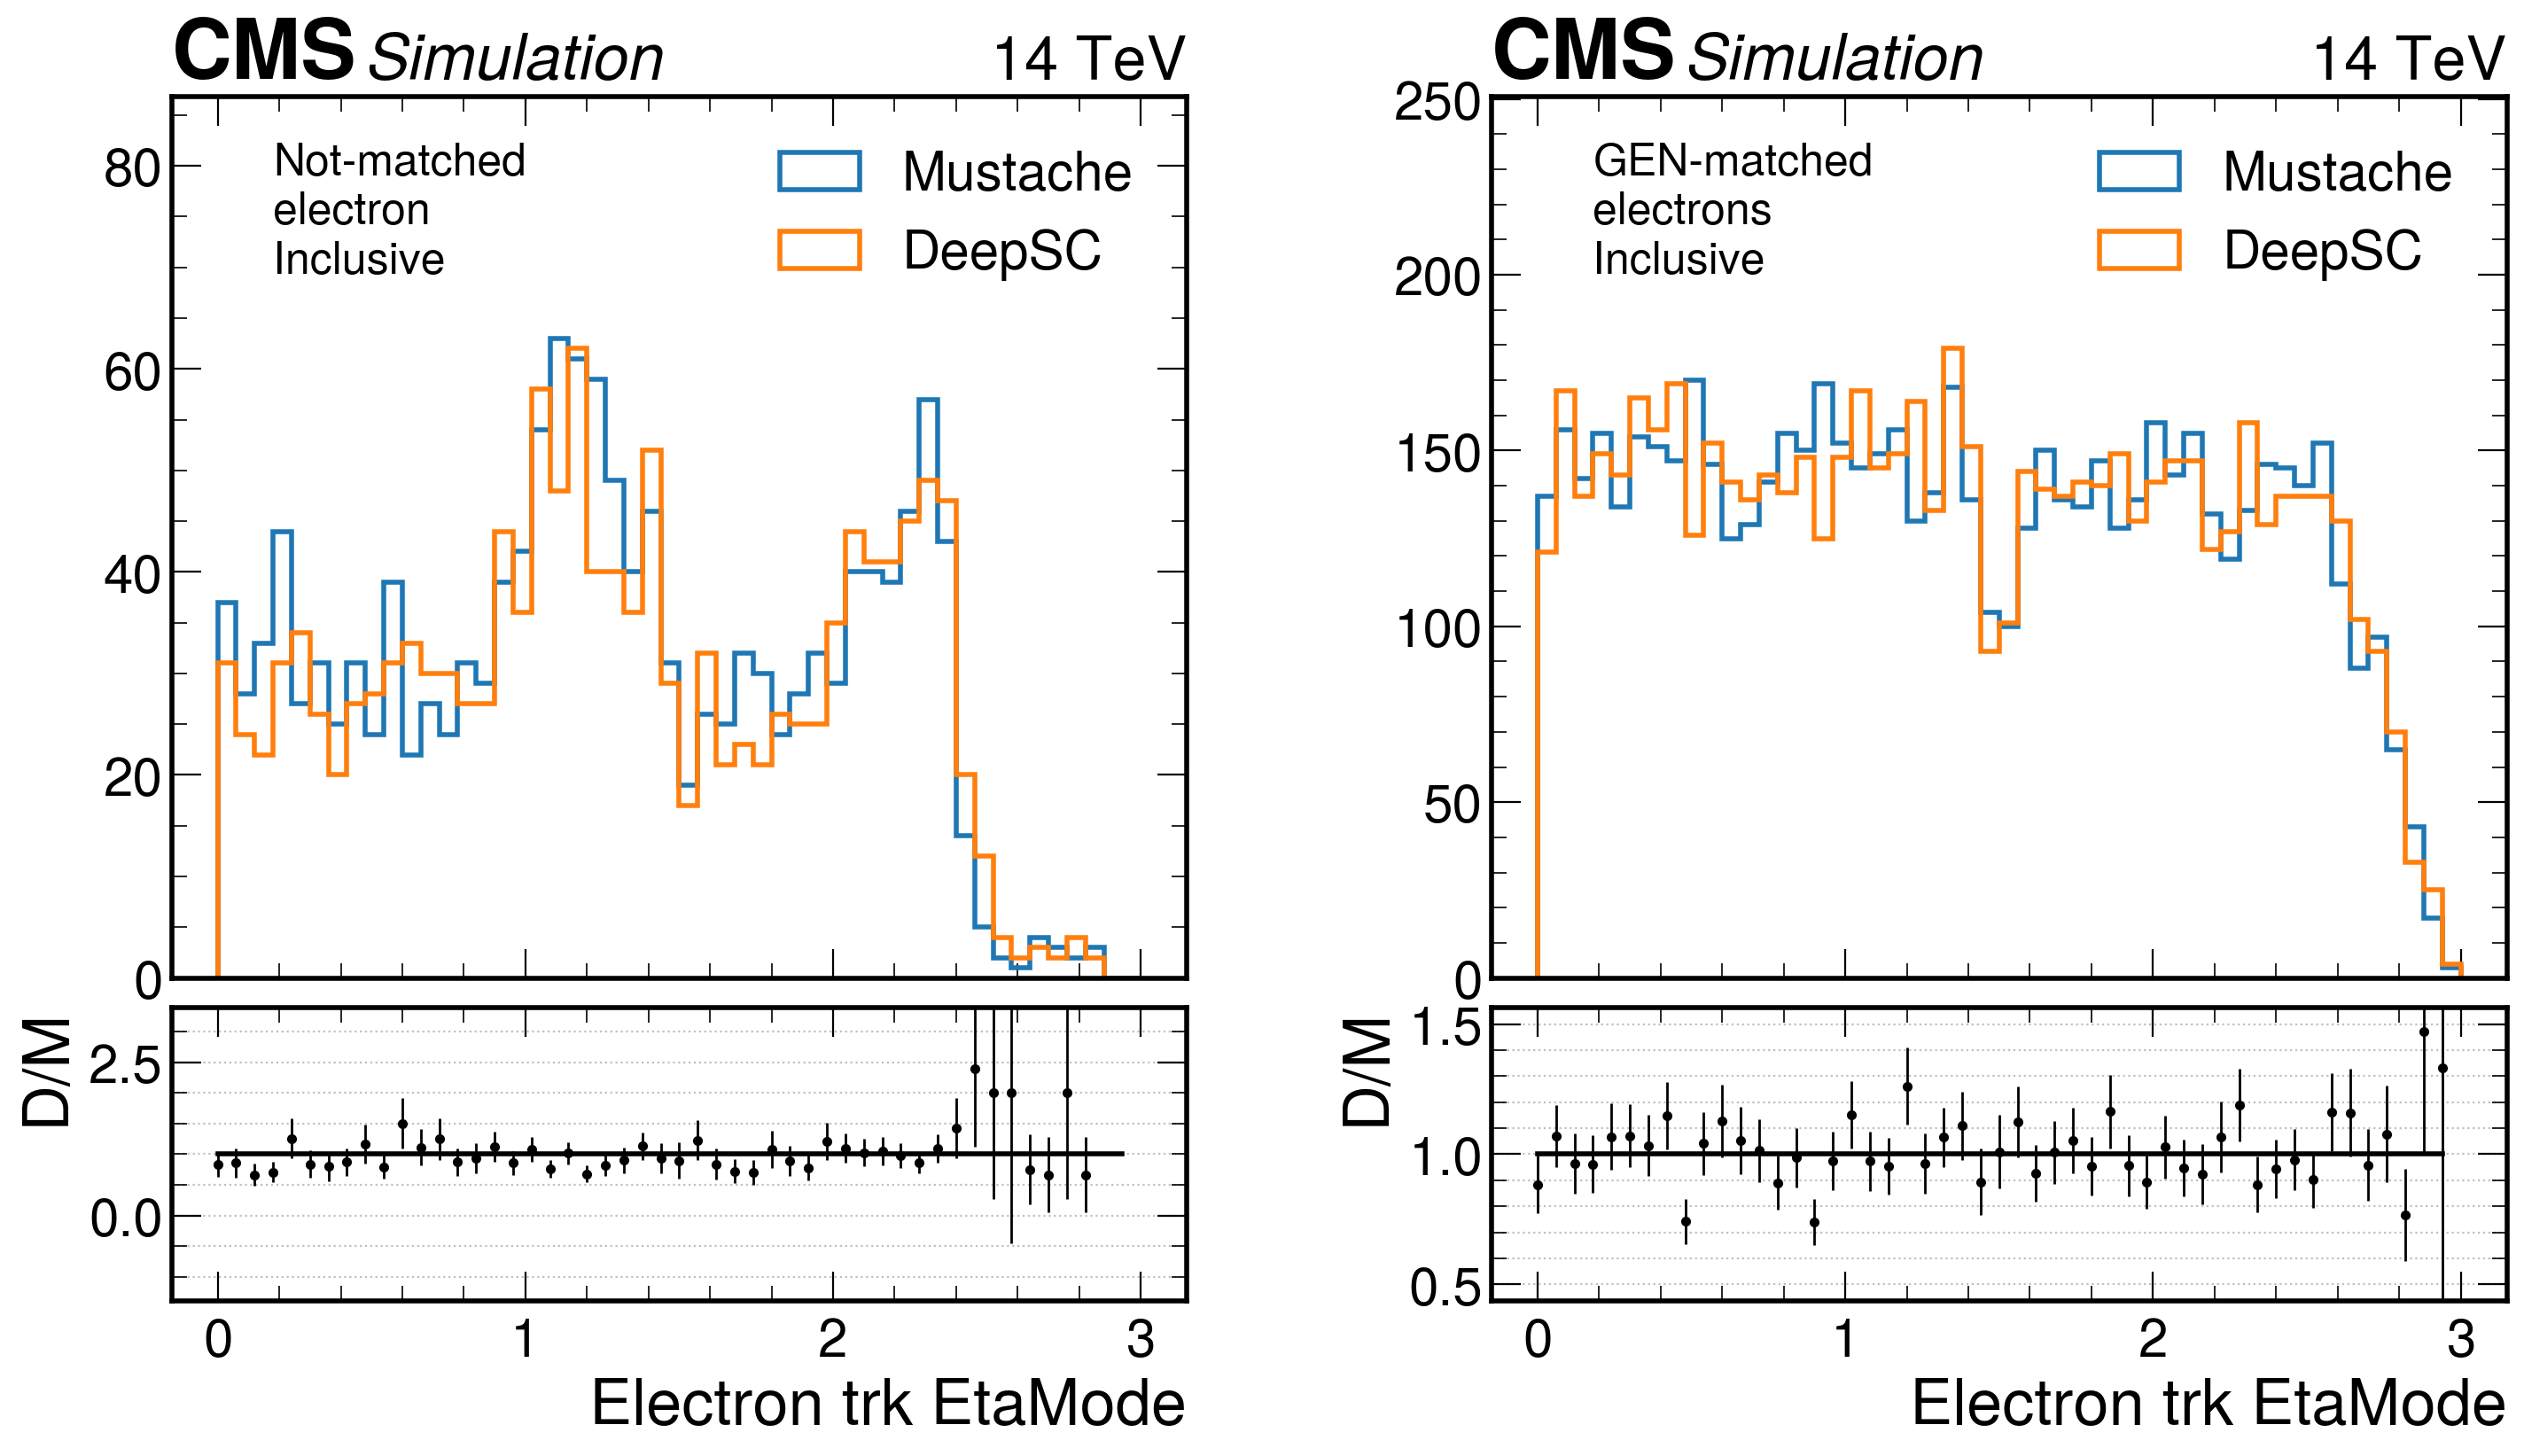

In [31]:
plot_distribution("ele_trkEtaMode", "Electron trk EtaMode", 50, (0,3), 
                  output_folder+"/basic_distribution_comparison", ylog=False)

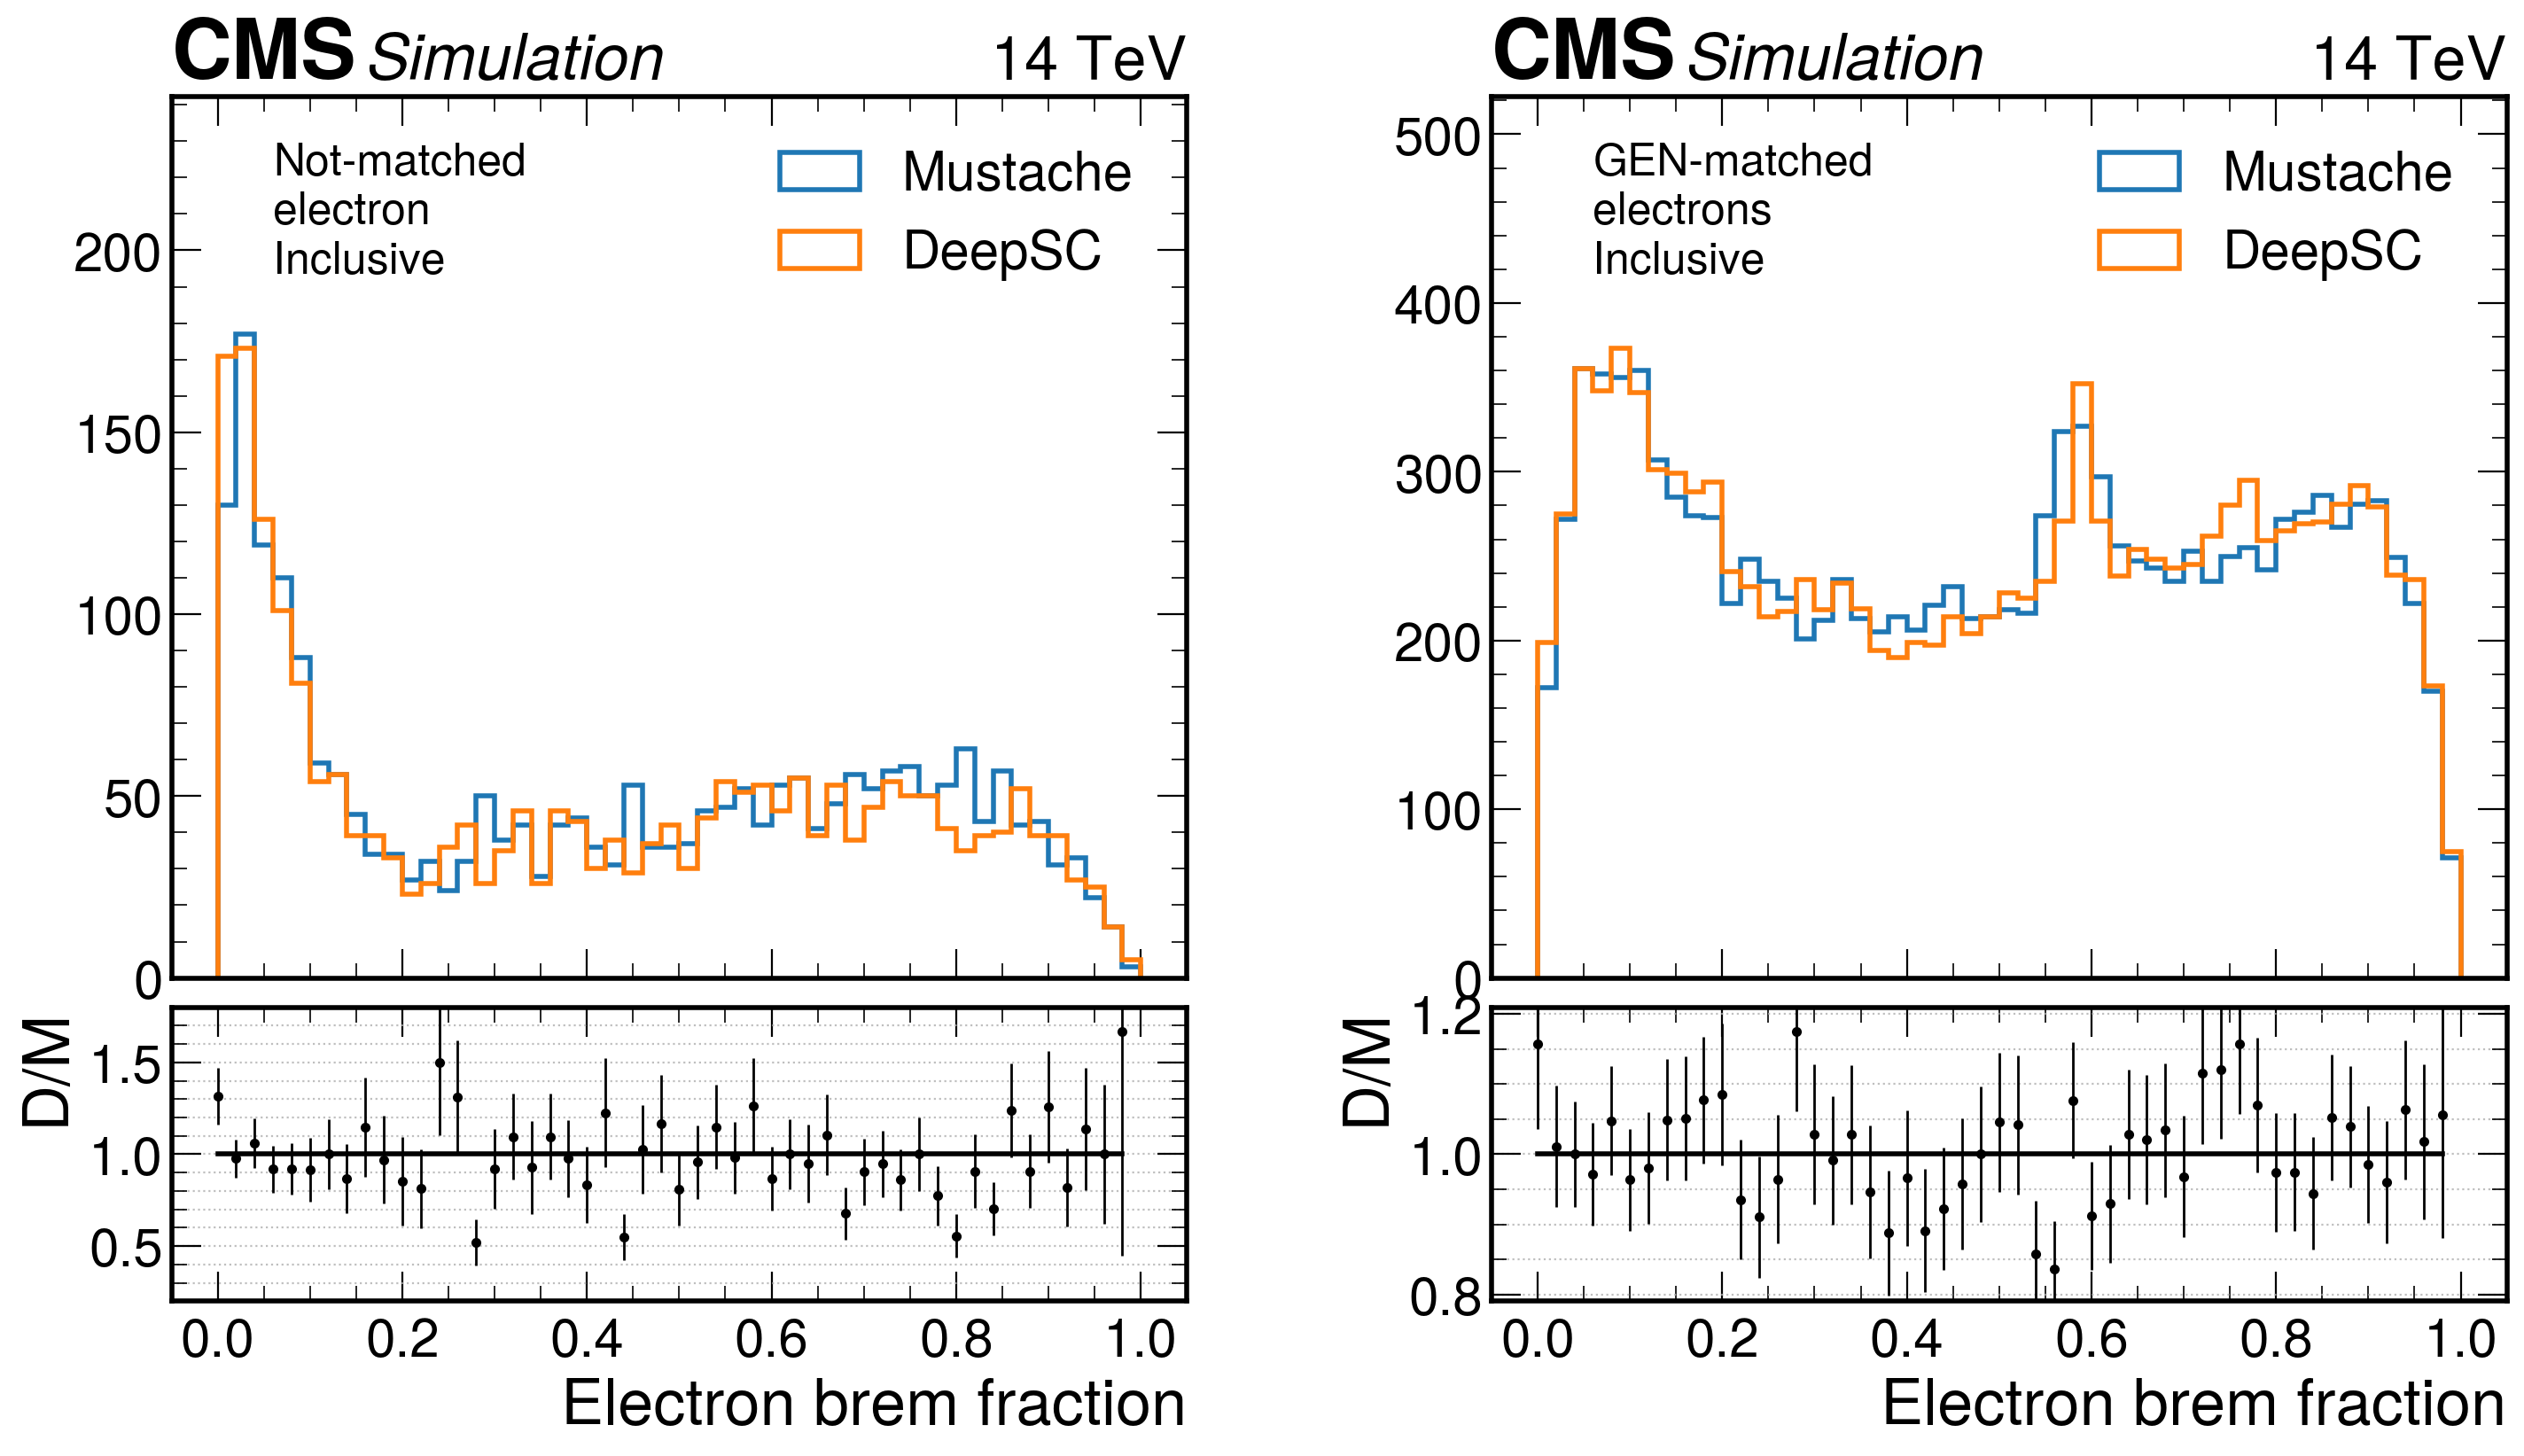

In [32]:
plot_distribution("ele_fbrem", "Electron brem fraction", 50, (0,1), 
                  output_folder+"/basic_distribution_comparison", ylog=False)

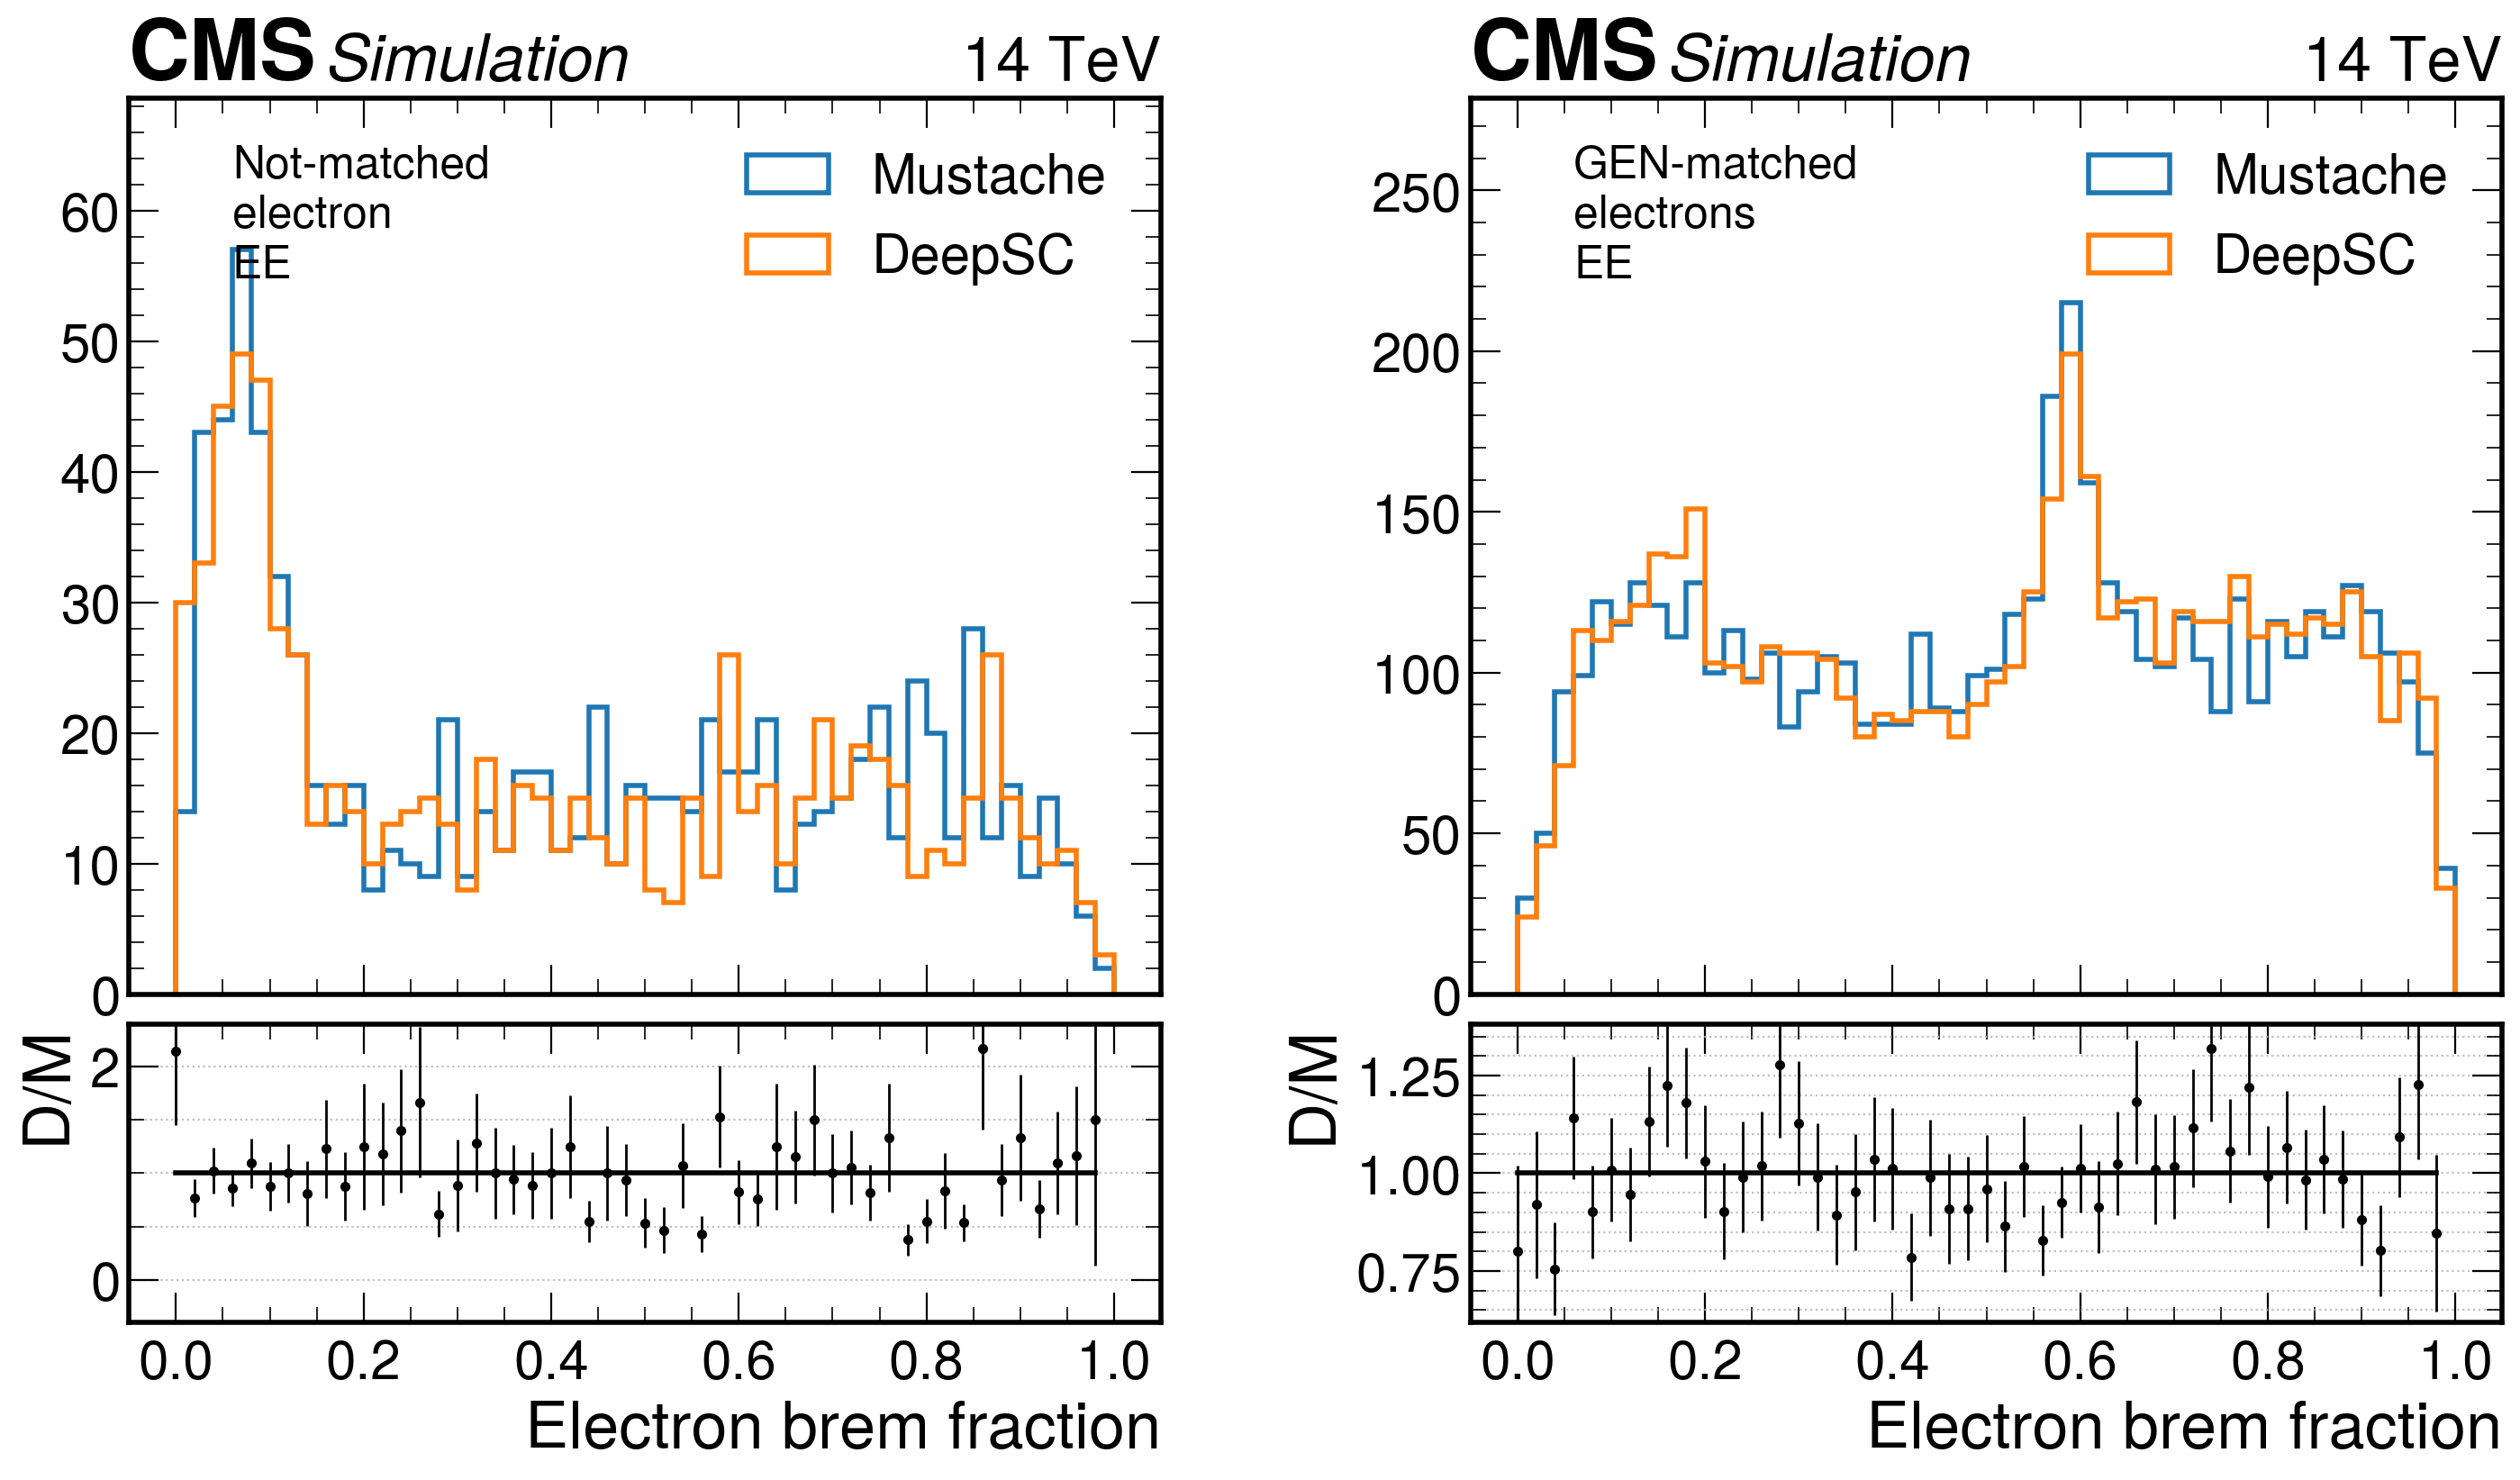

In [33]:
plot_distribution("ele_fbrem", "Electron brem fraction", 50, (0,1), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EE")

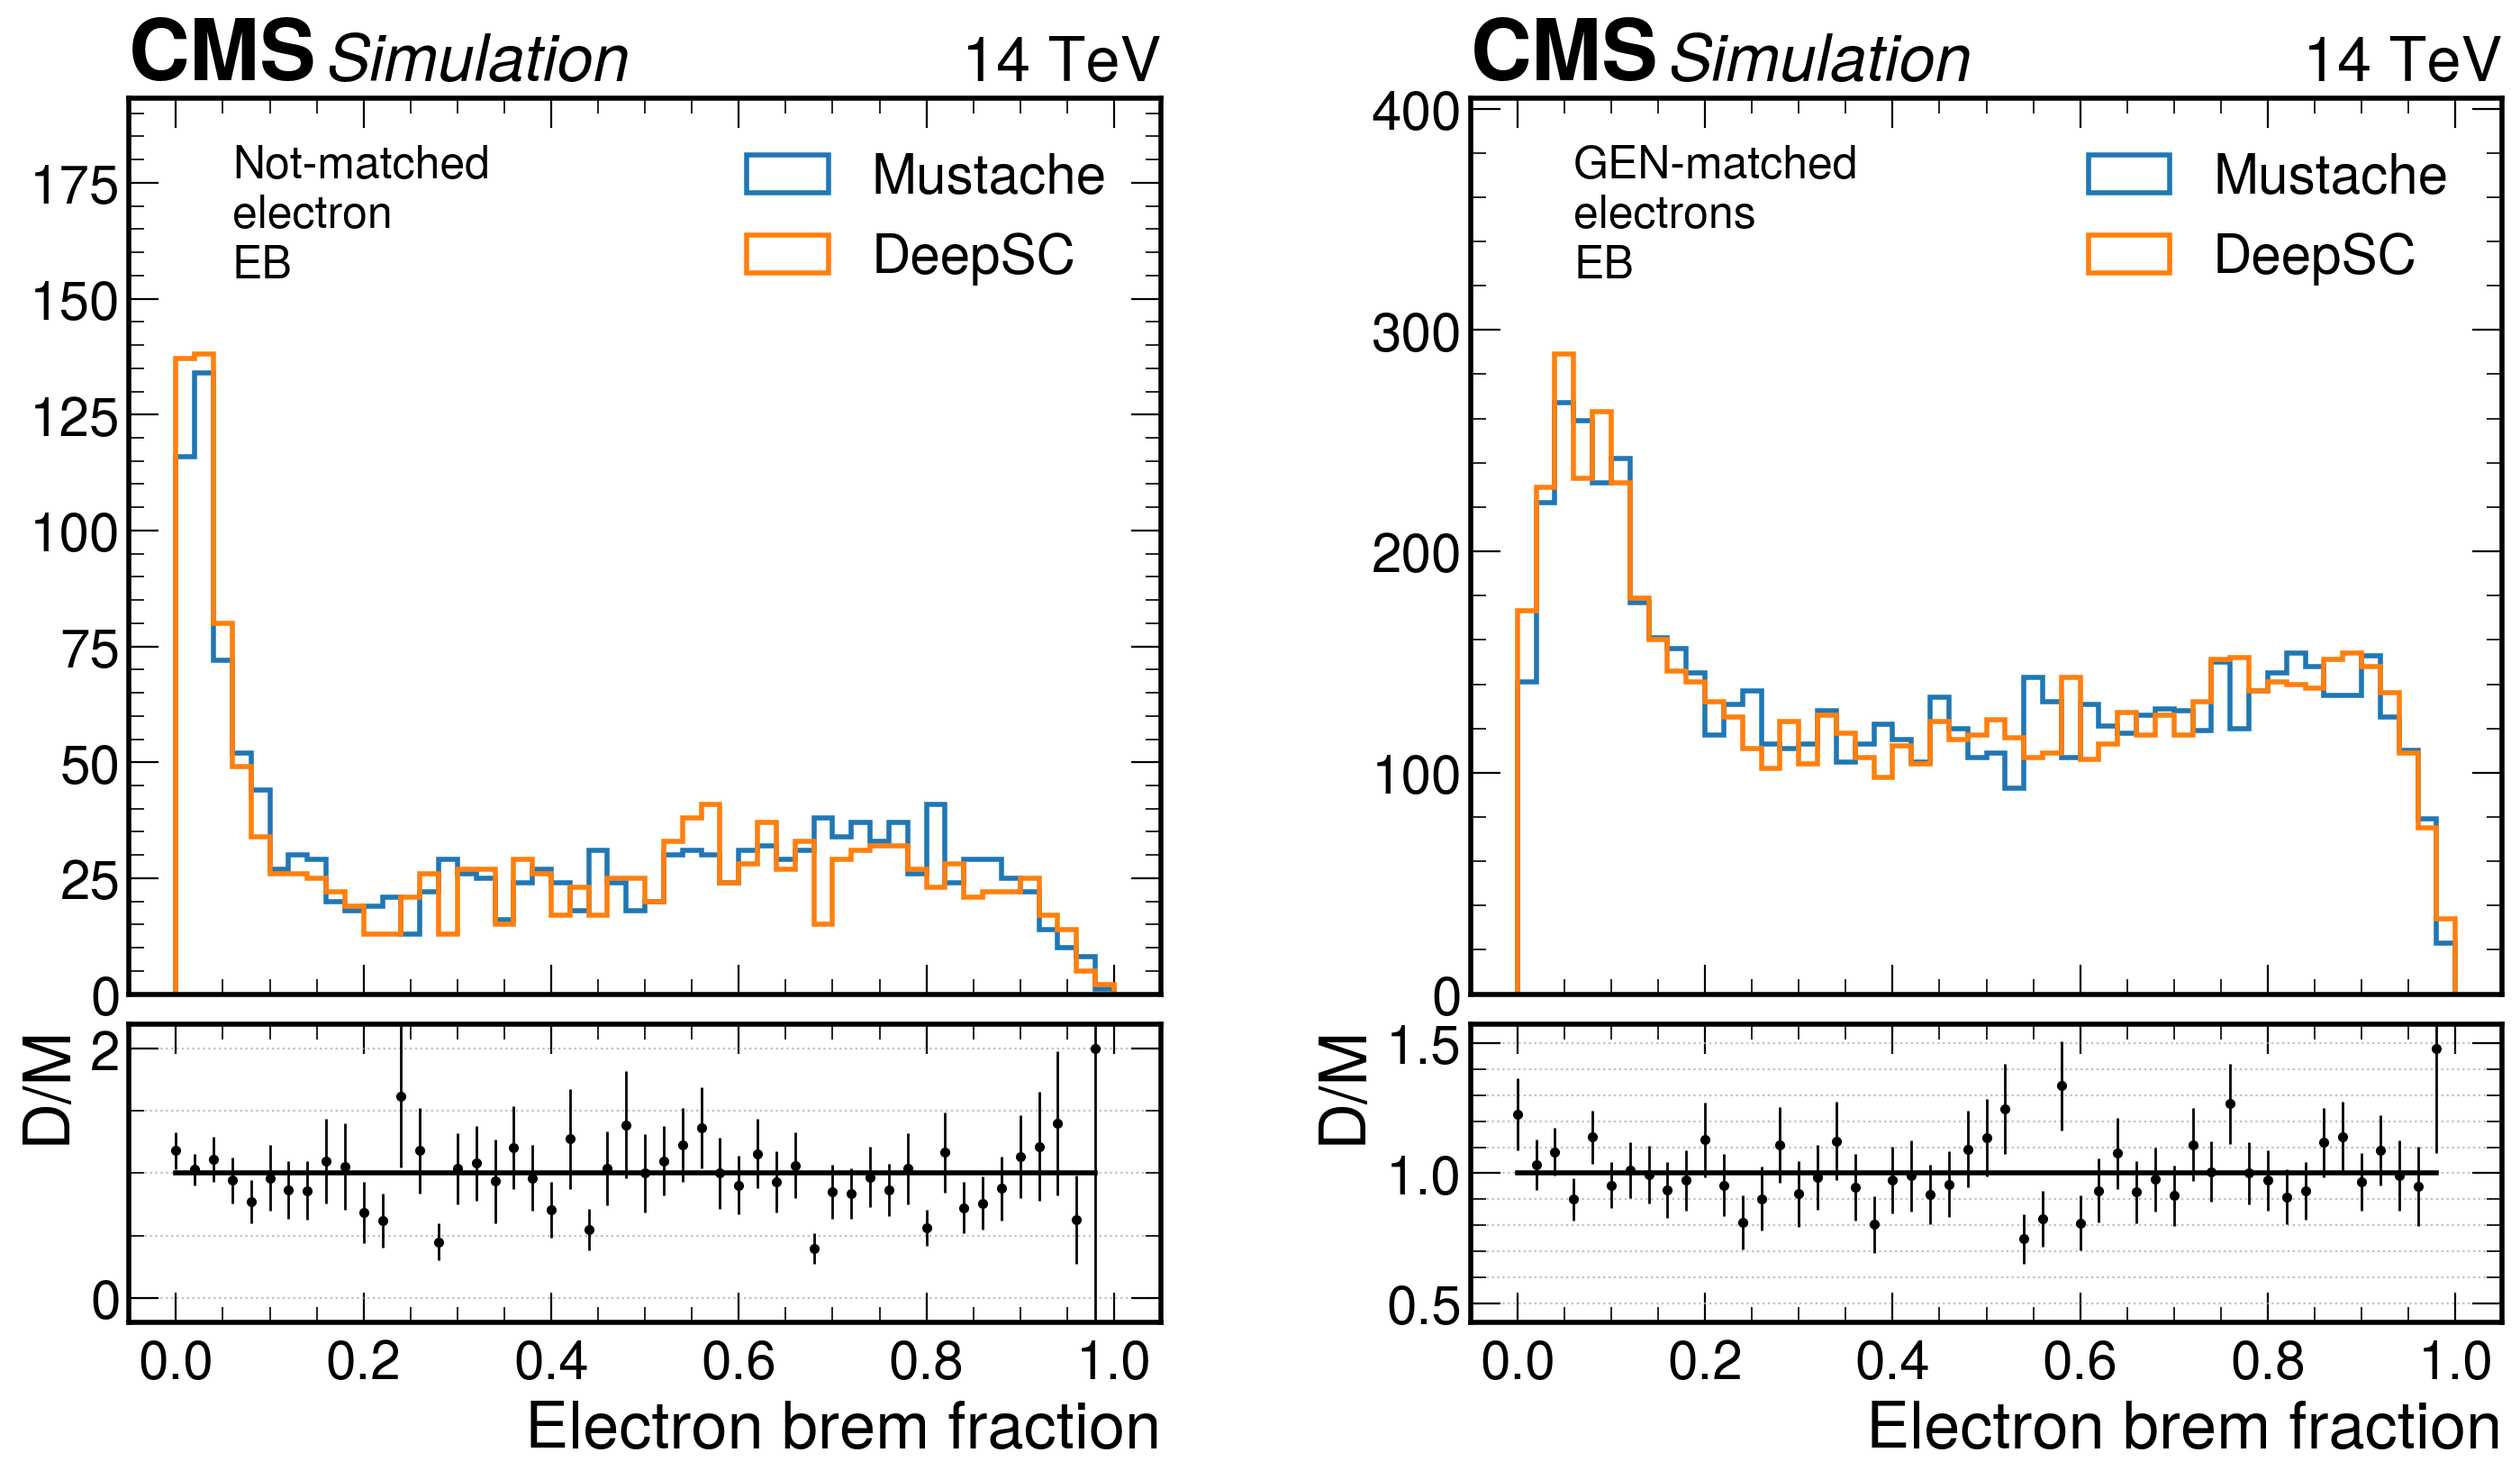

In [34]:
plot_distribution("ele_fbrem", "Electron brem fraction", 50, (0,1), 
                  output_folder+"/basic_distribution_comparison", ylog=False, split_EEEB="EB")

In [35]:
# Gen-matched resolution plots
#Now genmatching the dataset

In [36]:
# for Electron analysis
dfm_1 = df_1[(df_1.genmatched == 1)&(df_1.genpart_et>=10) & (df_1.ele_et >= 10)]
dfm_2 = df_2[(df_2.genmatched == 1)&(df_2.genpart_et>=10) & (df_2.ele_et >= 10)]

dfm_1["SC_Eraw_ov_Esim"] = dfm_1.en_sc_raw / dfm_1.calo_en_sim
dfm_1["SC_Ecorr_ov_Esim"] = dfm_1.en_sc_calib / dfm_1.calo_en_sim
dfm_2["SC_Eraw_ov_Esim"] = dfm_2.en_sc_raw / dfm_2.calo_en_sim
dfm_2["SC_Ecorr_ov_Esim"] = dfm_2.en_sc_calib / dfm_2.calo_en_sim

dfm_1["SC_Eraw_ov_EGen"] = dfm_1.en_sc_raw / dfm_1.genpart_en
dfm_1["SC_Ecorr_ov_EGen"] = dfm_1.en_sc_calib / dfm_1.genpart_en
dfm_2["SC_Eraw_ov_EGen"] = dfm_2.en_sc_raw / dfm_2.genpart_en
dfm_2["SC_Ecorr_ov_EGen"] = dfm_2.en_sc_calib / dfm_2.genpart_en

dfm_1["Ele_Eraw_ov_EGen"] = dfm_1.ele_energy / dfm_1.genpart_en
dfm_1["Ele_Ecorr_ov_EGen"] = dfm_1.ele_energy / dfm_1.genpart_en
dfm_2["Ele_Eraw_ov_EGen"] = dfm_2.ele_energy / dfm_2.genpart_en
dfm_2["Ele_Ecorr_ov_EGen"] = dfm_2.ele_energy / dfm_2.genpart_en

/tmp/ipykernel_751/1513183778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_1["SC_Eraw_ov_Esim"] = dfm_1.en_sc_raw / dfm_1.calo_en_sim
/tmp/ipykernel_751/1513183778.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_1["SC_Ecorr_ov_Esim"] = dfm_1.en_sc_calib / dfm_1.calo_en_sim
/tmp/ipykernel_751/1513183778.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

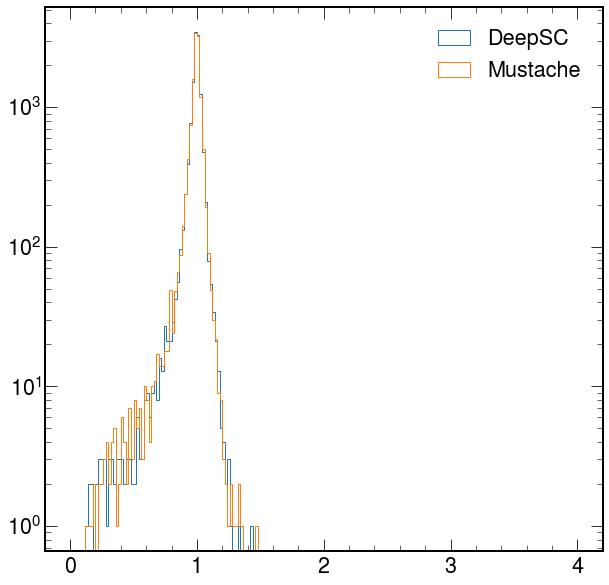

In [37]:
plt.hist(dfm_1.Ele_Ecorr_ov_EGen, bins=200, range=(0,4), histtype="step", label="DeepSC")
plt.hist(dfm_2.Ele_Ecorr_ov_EGen, bins=200, range=(0,4), histtype="step", label="Mustache")
plt.yscale("log")
plt.legend()

In [38]:
# Resolution

In [39]:
from plotting_code import * 

In [40]:
def do_plot(*, name, df1, df2, res_var1, res_var2, 
            bins1, bins2, binlabel1, binlabel2, binvar1, binvar2, binleg,
            xlabel, ylabel, general_label, ylabelratio,
            yvar, ylims1, ylims2, 
            bin_analysis="cruijff",
            yvar_err=None,
            logy = True,
            exclude_x_bin=-1,
            exclude_y_bin=-1,
            nbins_fit=250, prange=1, 
            legendExt = "",
            xlabel_fit = "$E/E_{true}$",
            fill_between=None,  output_folder=None, 
            plot_fits=False,
            load_from_file=False):
            
        
    binCol1 = binlabel1+"_bin"
    binCol2 = binlabel2+"_bin"
    if not load_from_file:
       
        for df in [df1, df2]:
            df.loc[:,binCol1] = pd.cut(df[binvar1].abs(), bins1, labels=list(range(len(bins1)-1)))
            df.loc[:,binCol2] = pd.cut(df[binvar2].abs(), bins2, labels=list(range(len(bins2)-1)))

        if bin_analysis == "cruijff":
            res = df1.groupby([binCol1,binCol2]).apply(bin_analysis_cruijff(f"{res_var1}", nbins=nbins_fit, prange=prange))
            res_must = df2.groupby([binCol1,binCol2]).apply(bin_analysis_cruijff(f"{res_var2}", nbins=nbins_fit, prange=prange))
        elif bin_analysis == "ext_quantile":
            res = df1.groupby([binCol1,binCol2]).apply(bin_analysis_extquantiles(f"{res_var1}"))
            res_must = df2.groupby([binCol1,binCol2]).apply(bin_analysis_extquantiles(f"{res_var2}"))
        elif bin_analysis == "central_quantile":
            res = df1.groupby([binCol1,binCol2]).apply(bin_analysis_central_smallest(f"{res_var1}"))
            res_must = df2.groupby([binCol1,binCol2]).apply(bin_analysis_central_smallest(f"{res_var2}"))
        res.reset_index(level=0, inplace=True)
        res.reset_index(level=0, inplace=True)
        res_must.reset_index(level=0, inplace=True)
        res_must.reset_index(level=0, inplace=True)

        # computing sigma_Avg
        if bin_analysis == "cruijff":
            res.loc[:,"sigma_avg"] = (res.sigmaL + res.sigmaR)/2
            res.loc[:,"sigma_avg_err"] = 0.5 * np.sqrt( res.sigmaL_err**2 + res.sigmaR_err**2)
            res_must.loc[:,"sigma_avg"] = (res_must.sigmaL + res_must.sigmaR)/2
            res_must.loc[:,"sigma_avg_err"] = 0.5 * np.sqrt( res_must.sigmaL_err**2 + res_must.sigmaR_err**2)
    else:
        res = pd.read_csv(f"{output_folder}/resolution_{name}_deepsc.csv", sep=',')
        res_must = pd.read_csv(f"{output_folder}/resolution_{name}_mustache.csv", sep=',')
    
    
    fig = plt.figure(figsize=(8,9), dpi=200)
    gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
    axs = gs.subplots(sharex=True)

    errx = []
    x = []
    for i in range(len(bins1)-1):
        errx.append((bins1[i+1]- bins1[i])/2)
        x.append((bins1[i+1]+ bins1[i])/2)

    mustl = []
    deepl = []

    res.loc[res[binCol1] == exclude_x_bin, [yvar]] = 0
    res_must.loc[res_must[binCol1] == exclude_x_bin, [yvar]] = 0
    

    for iet, et in enumerate(bins2[:-1]):
        if iet == exclude_y_bin: continue
        if not yvar_err:
            l = axs[0].errorbar(x, res_must[res_must[binCol2] == iet][yvar], xerr=errx, 
                                label=f"[{bins2[iet]}, {bins2[iet+1]}]", fmt = ".")
        else:
            l = axs[0].errorbar(x, res_must[res_must[binCol2] == iet][yvar], 
                                xerr=errx, yerr=res_must[res_must[binCol2] == iet][yvar_err],
                                label=f"[{bins2[iet]}, {bins2[iet+1]}]", fmt = ".", elinewidth=1)
        mustl.append(l)

    i = 0
    for iet, et in enumerate(bins2[:-1]):
        if iet == exclude_y_bin: continue
        if not yvar_err:
            l = axs[0].errorbar(x, res[res[binCol2]== iet][yvar],  
                            xerr=errx,                    
                            label=f"[{bins2[iet]}, {bins2[iet+1]}]", 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=0)
        else:
            l = axs[0].errorbar(x, res[res[binCol2]== iet][yvar],  
                            xerr=0,  yerr=res[res[binCol2]== iet][yvar_err],                  
                            label=f"[{bins2[iet]}, {bins2[iet+1]}]", 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=1) #not drawing the error
        i+=1
        deepl.append(l)

    if fill_between:
        axs[0].fill_between(fill_between, [ylims1[0]]*2,[ylims1[1]]*2, color="lightgray", alpha=0.5)
        axs[1].fill_between(fill_between, [ylims2[0]]*2,[ylims2[1]]*2, color="lightgray", alpha=0.5)


    for iet, et in enumerate(bins2[:-1]):
        if iet == exclude_y_bin: continue
        rd = res[res[binCol2]==iet][yvar]
        rm = res_must[res_must[binCol2]==iet][yvar]
        var = rd/rm
        if not yvar_err:
            axs[1].errorbar(x, var,xerr=errx, fmt=".", linestyle='none', elinewidth=0)
        else:
            # Error of the ratio
            deep_err = res[res[binCol2]==iet][yvar_err]
            must_err = res_must[res_must[binCol2]==iet][yvar_err]
            err_ratio = np.sqrt( ((1/rm)**2) * deep_err**2 + ((rd/(rm**2))**2 )*must_err**2 )
            axs[1].errorbar(x, var,xerr=errx, yerr=err_ratio,
                            fmt=".", linestyle='none', elinewidth=1)

    axs[0].set_ylabel(ylabel)
    axs[1].set_xlabel(xlabel)
    axs[0].set_ylim(*ylims1)
    axs[1].set_ylim(*ylims2)
    

    axs[1].set_ylabel(ylabelratio, fontsize=22)
    axs[0].get_yaxis().set_label_coords(-0.1,1)
    axs[1].get_yaxis().set_label_coords(-0.1,1)

    l1= axs[0].legend(handles=mustl, title=binleg, title_fontsize=18, loc="upper left", fontsize=18)

    ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache'+ legendExt )
    dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC'+ legendExt)
    axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", 
                  bbox_to_anchor=(0.93, 1), fontsize=18)
    axs[0].add_artist(l1)

    axs[0].text(0.7, 0.62, general_label, transform=axs[0].transAxes, fontsize=20)

    if logy:
        axs[0].set_yscale("log")
    axs[0].grid(which="both",axis="y")
    axs[1].grid(which="both",axis="y")

    hep.cms.label(rlabel="14 TeV", llabel="Simulation Preliminary", loc=0, ax=axs[0]) 
    
    if (output_folder):
        os.makedirs(output_folder, exist_ok=True)
        os.system(f"cp /eos/user/d/dvalsecc/www/index.php {output_folder}")
        fig.savefig(output_folder + f"/resolution_{name}_{yvar}_ratio.png")
        fig.savefig(output_folder + f"/resolution_{name}_{yvar}_ratio.pdf")
        fig.savefig(output_folder + f"/resolution_{name}_{yvar}_ratio.svg")
        
    #######
    #Plot the single fit bins
    if bin_analysis=="cruijff" and plot_fits and output_folder:
        output_fits = output_folder + "/fits_"+ name
        os.makedirs(output_fits, exist_ok=True)
        os.system(f"cp /eos/user/d/dvalsecc/www/index.php {output_fits}")
        
        for iBin1, bin1, in enumerate(bins1[:-1]):
            for iBin2, bin2 in enumerate(bins2[:-1]):
                df_d = df1[(df1[binCol1] == iBin1)&(df1[binCol2]==iBin2)]
                df_m = df2[(df2[binCol1] == iBin1)&(df2[binCol2]==iBin2)]
                fit_deep = res[(res[binCol1]== iBin1)&(res[binCol2]==iBin2)]
                fit_must = res_must[(res_must[binCol1]== iBin1)&(res_must[binCol2]==iBin2)]
                if fit_deep.sigma_avg.values[0] == -1 or fit_must.sigma_avg.values[0]==-1:
                    print(f"Fit failed iBin1:{iBin1}, iBin2:{iBin2}")
                    continue
                    
                fig = plt.figure(figsize=(9,8), dpi=100)
                ax = plt.gca()
                #using same range and nbins for both plots
                H_m = np.histogram(df_m[res_var2],bins=nbins_fit, range=(fit_must.xmin.values[0], fit_must.xmax.values[0]))
                xm = H_m[1][:-1]
                Ym = H_m[0]
                ax.errorbar(xm, Ym, np.sqrt(Ym),0, linestyle='none',fmt=".", label="Mustache"+legendExt,zorder=0)


                H_d = np.histogram(df_d[res_var1],bins=nbins_fit, range=(fit_deep.xmin.values[0], fit_deep.xmax.values[0]))
                xd = H_d[1][:-1]
                Yd = H_d[0]
                ax.errorbar(xd, Yd, np.sqrt(Yd),0, linestyle='none', fmt=".",label="DeepSC"+legendExt, zorder=1)


                y_cr_D = cruijff(xd, fit_deep.A.values[0], fit_deep.m.values[0], fit_deep.sigmaL.values[0], 
                                 fit_deep.sigmaR.values[0], fit_deep.alphaL.values[0], fit_deep.alphaR.values[0])
                
                y_cr_M = cruijff(xm, fit_must.A.values[0], fit_must.m.values[0], fit_must.sigmaL.values[0],
                                 fit_must.sigmaR.values[0], fit_must.alphaL.values[0], fit_must.alphaR.values[0])
                
                ax.plot(xm, y_cr_M, label="Cruijiff Mustache", linewidth=3, zorder=10, color="green")
                ax.plot(xd, y_cr_D, label="Cruijiff DeepSC", linewidth =3, zorder=11, color="red")

                ax.legend(loc="upper right", bbox_to_anchor=(1, 1), fontsize=17)
                ax.text(0.05, 0.9, f"Mustache:\nm={fit_must.m.values[0]:.3f}, $\sigma_L$={fit_must.sigmaL.values[0]:.3f}, $\sigma_R$={fit_must.sigmaR.values[0]:.3f}",
                        transform=ax.transAxes, fontsize=15, color="green")
                ax.text(0.05, 0.8, f"DeepSC:\nm={fit_deep.m.values[0]:.3f}, $\sigma_L$={fit_deep.sigmaL.values[0]:.3f}, $\sigma_R$={fit_deep.sigmaR.values[0]:.3f}",
                        transform=ax.transAxes, fontsize=15, color="red")

                ax.text(0.05, 0.65, f"{xlabel} [{bins1[iBin1]},{bins1[iBin1+1]}] \n{binleg}: [{bins2[iBin2]},{bins2[iBin2+1]}]",
                        transform=ax.transAxes, fontsize=17)
                
                ax.text(0.65, 0.65, general_label, transform=ax.transAxes, fontsize=20)

                ax.set_ylim(0,max(Yd)*1.5)
                ax.set_xlabel(xlabel_fit)
                hep.cms.label(rlabel="14 TeV",  llabel="Simulation Preliminary", loc=0, ax=ax)

                if (output_folder):
                    fig.savefig(output_fits + f"/cruijff_fit_{binlabel1}{bins1[iBin1]}_{bins1[iBin1+1]}_{binlabel2}{bins2[iBin2]}_{bins2[iBin2+1]}.png")
                    fig.savefig(output_fits + f"/cruijff_fit_{binlabel1}{bins1[iBin1]}_{bins1[iBin1+1]}_{binlabel2}{bins2[iBin2]}_{bins2[iBin2+1]}.pdf")
                    fig.savefig(output_fits + f"/cruijff_fit_{binlabel1}{bins1[iBin1]}_{bins1[iBin1+1]}_{binlabel2}{bins2[iBin2]}_{bins2[iBin2+1]}.svg")
                plt.close()
                
    if output_folder:
        res.to_csv(f"{output_folder}/resolution_{name}_deepsc.csv", sep=',', index=False)
        res_must.to_csv(f"{output_folder}/resolution_{name}_mustache.csv", sep=',', index=False)
    
    return res, res_must

In [41]:
# Generic plotting function

In [42]:
# By Eta

/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Fit failed
Fit failed


/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fit failed
Fit failed
Fit failed


cp: cannot open ‘/eos/user/d/dvalsecc/www/index.php’ for reading: Operation not permitted
cp: cannot open ‘/eos/user/d/dvalsecc/www/index.php’ for reading: Operation not permitted


Fit failed iBin1:4, iBin2:1
Fit failed iBin1:5, iBin2:0


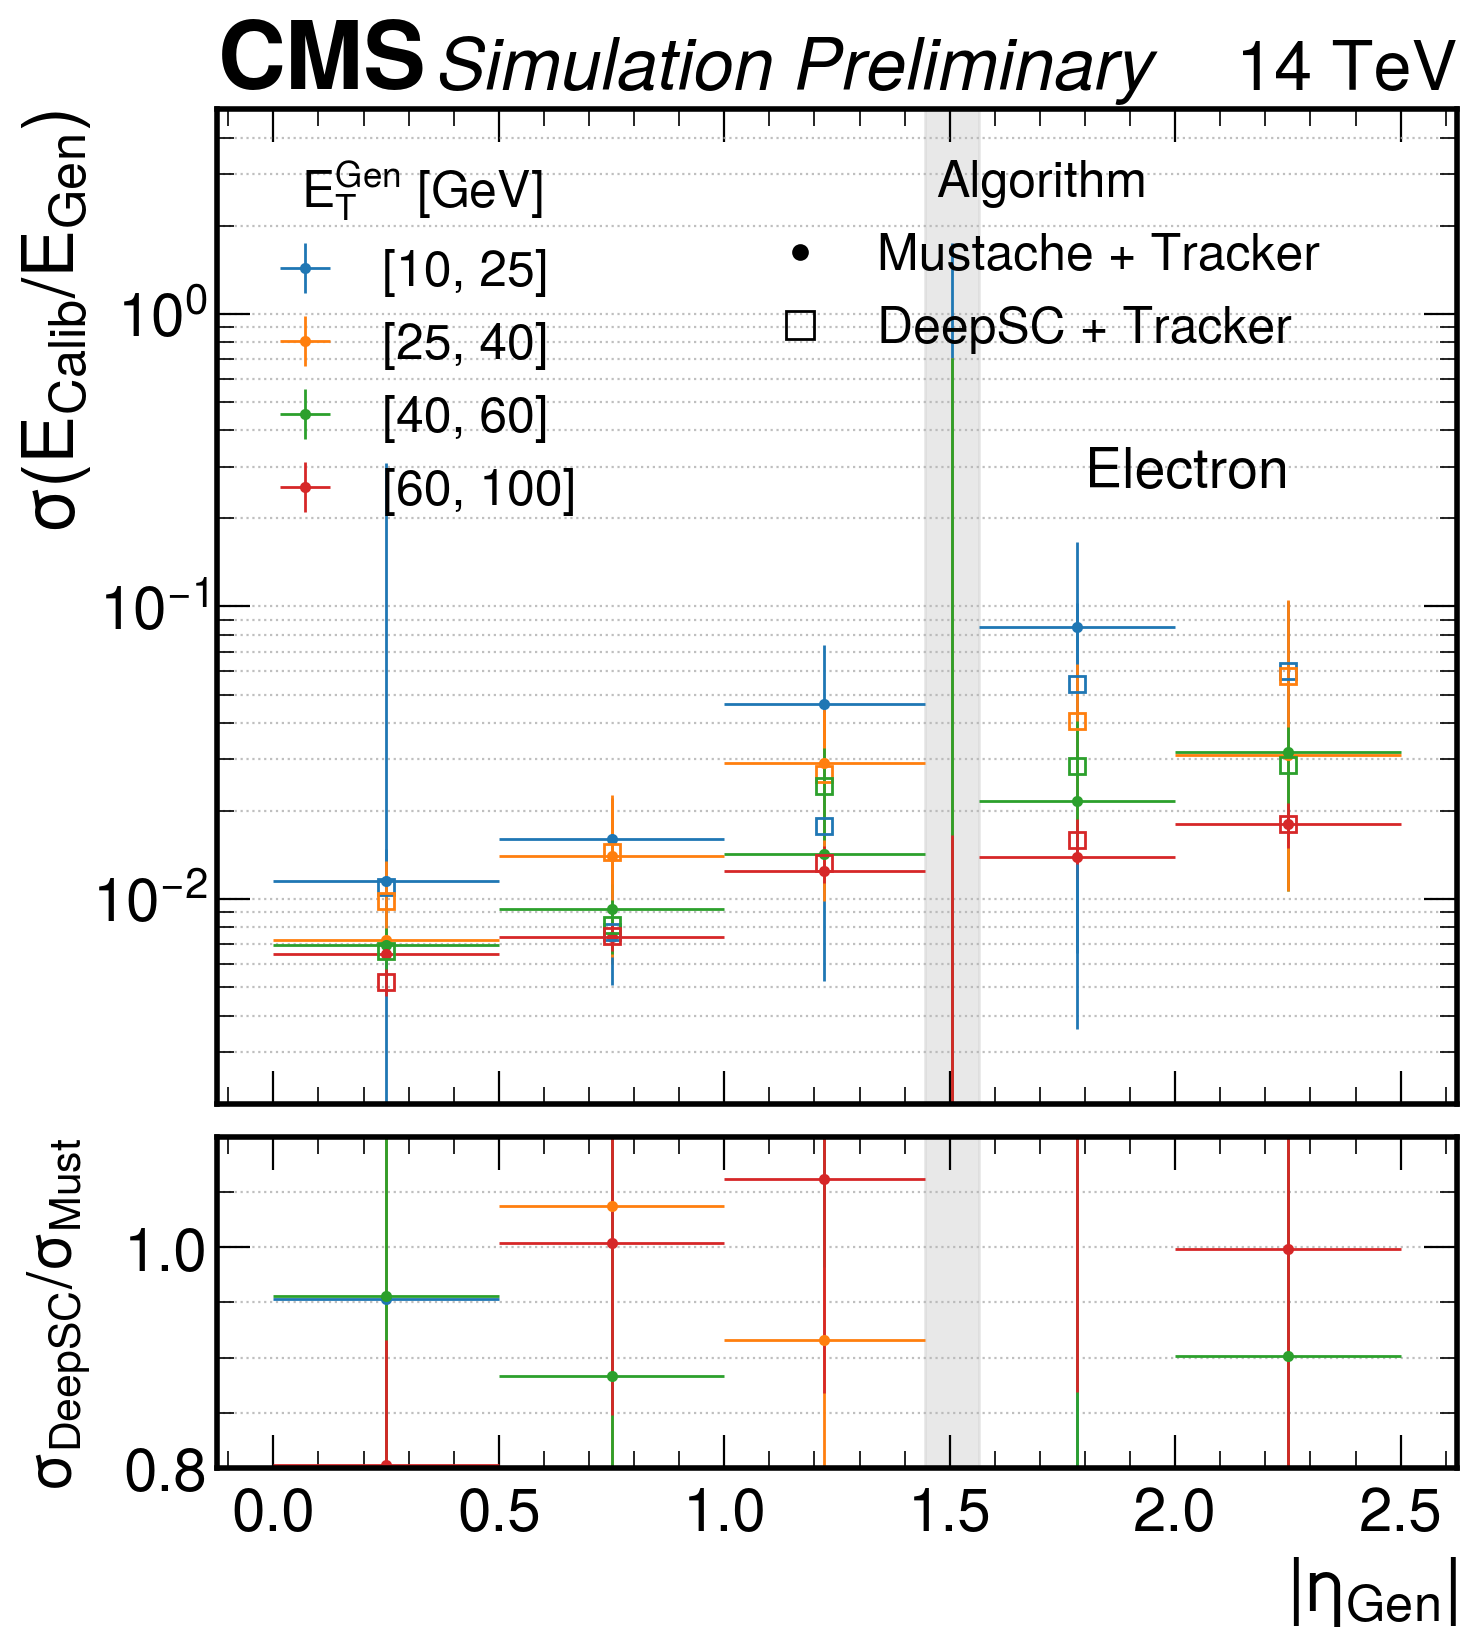

In [43]:
res_d, res_m = do_plot(name="ele_gen_matched_byEta_cruijff_sigmaAvg",
        df1=dfm_1, 
        df2=dfm_2,
        res_var1="Ele_Ecorr_ov_EGen", 
        res_var2="Ele_Ecorr_ov_EGen",
        bins1=[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        bins2=[10,25, 40, 60,100], 
        binlabel1="eta",
        binlabel2="et",
        binleg="$E_T^{Gen}$ [GeV]", 
        binvar1="ele_eta", 
        binvar2="calo_et_gen", 
        nbins_fit=350, 
        prange=0.965, 
        exclude_x_bin=3, 
        general_label="Electron", 
        legendExt = " + Tracker",
        xlabel_fit = "$E_{calib}/E_{Gen}$",
        xlabel="$|\eta_{Gen}|$", 
        ylabel="$\sigma (E_{Calib}/E_{Gen})$",
        ylabelratio="$\sigma_{DeepSC}/\sigma_{Must}$", 
        yvar="sigma_avg",
        bin_analysis="cruijff",
        yvar_err="sigma_avg_err",
        ylims1=(2e-3,5),
        ylims2=(0.8, 1.1),
        fill_between=[1.4442, 1.566],
        output_folder=output_folder, 
        plot_fits=True, 
        load_from_file=False)

/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Fit failed
Fit failed
Fit failed
Fit failed


/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
cp: cannot open ‘/eos/user/d/dvalsecc/www/index.php’ for reading: Operation not permitted
cp: cannot open ‘/eos/user/d/dvalsecc/www/index.php’ for reading: Operation not permitted


Fit failed
Fit failed iBin1:3, iBin2:1
Fit failed iBin1:3, iBin2:2
Fit failed iBin1:3, iBin2:3
Fit failed iBin1:4, iBin2:0


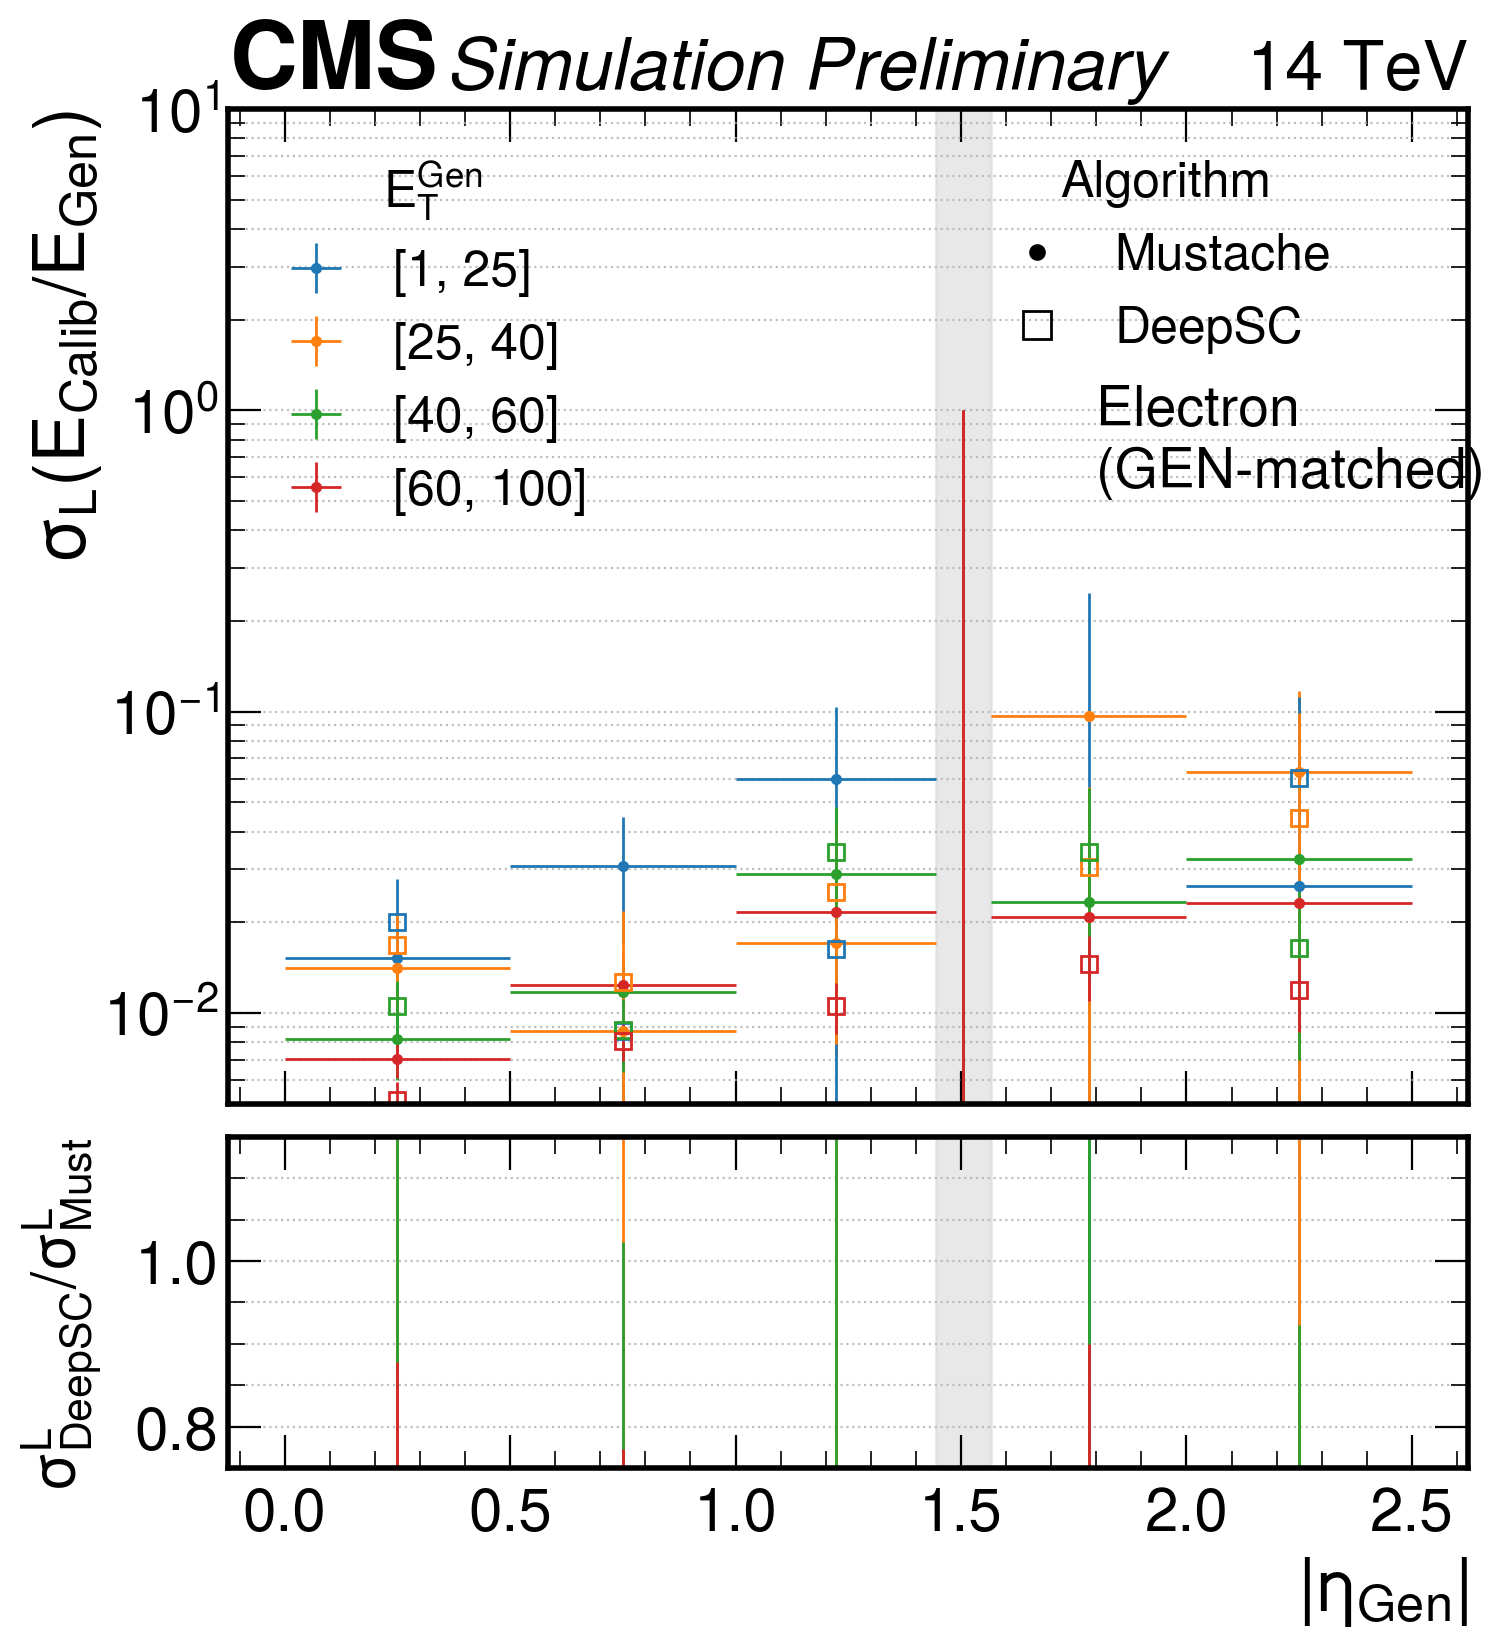

In [44]:
res_d, res_m = do_plot(name="ele_gen_matched_corr_cruijff_sigmaL",
        df1=dfm_1, 
        df2=dfm_2,
        res_var1="Ele_Ecorr_ov_EGen", 
        res_var2="Ele_Ecorr_ov_EGen",
        bins1=[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        bins2=[1,25, 40, 60,100], 
        binlabel1="eta",
        binlabel2="et",
        binleg="$E_T^{Gen}$", 
        binvar1="ele_eta", 
        binvar2="calo_et_gen", 
        nbins_fit=300, 
        prange=0.96, 
        exclude_x_bin=3, 
        general_label="Electron \n(GEN-matched)", 
        xlabel="$|\eta_{Gen}|$", 
        ylabel="$\sigma_L (E_{Calib}/E_{Gen})$",
        ylabelratio="$\sigma^L_{DeepSC}/\sigma^L_{Must}$", 
        yvar="sigmaL",
        bin_analysis="cruijff",
        yvar_err="sigmaL_err",
        ylims1=(5e-3,1e1),
        ylims2=(0.75, 1.15),
        fill_between=[1.4442, 1.566],
        output_folder=output_folder, 
        plot_fits=True)

/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Fit failed
Fit failed
Fit failed
Fit failed
Fit failed


/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
cp: cannot open ‘/eos/user/d/dvalsecc/www/index.php’ for reading: Operation not permitted
cp: cannot open ‘/eos/user/d/dvalsecc/www/index.php’ for reading: Operation not permitted


Fit failed iBin1:3, iBin2:1
Fit failed iBin1:3, iBin2:2
Fit failed iBin1:3, iBin2:3
Fit failed iBin1:4, iBin2:0


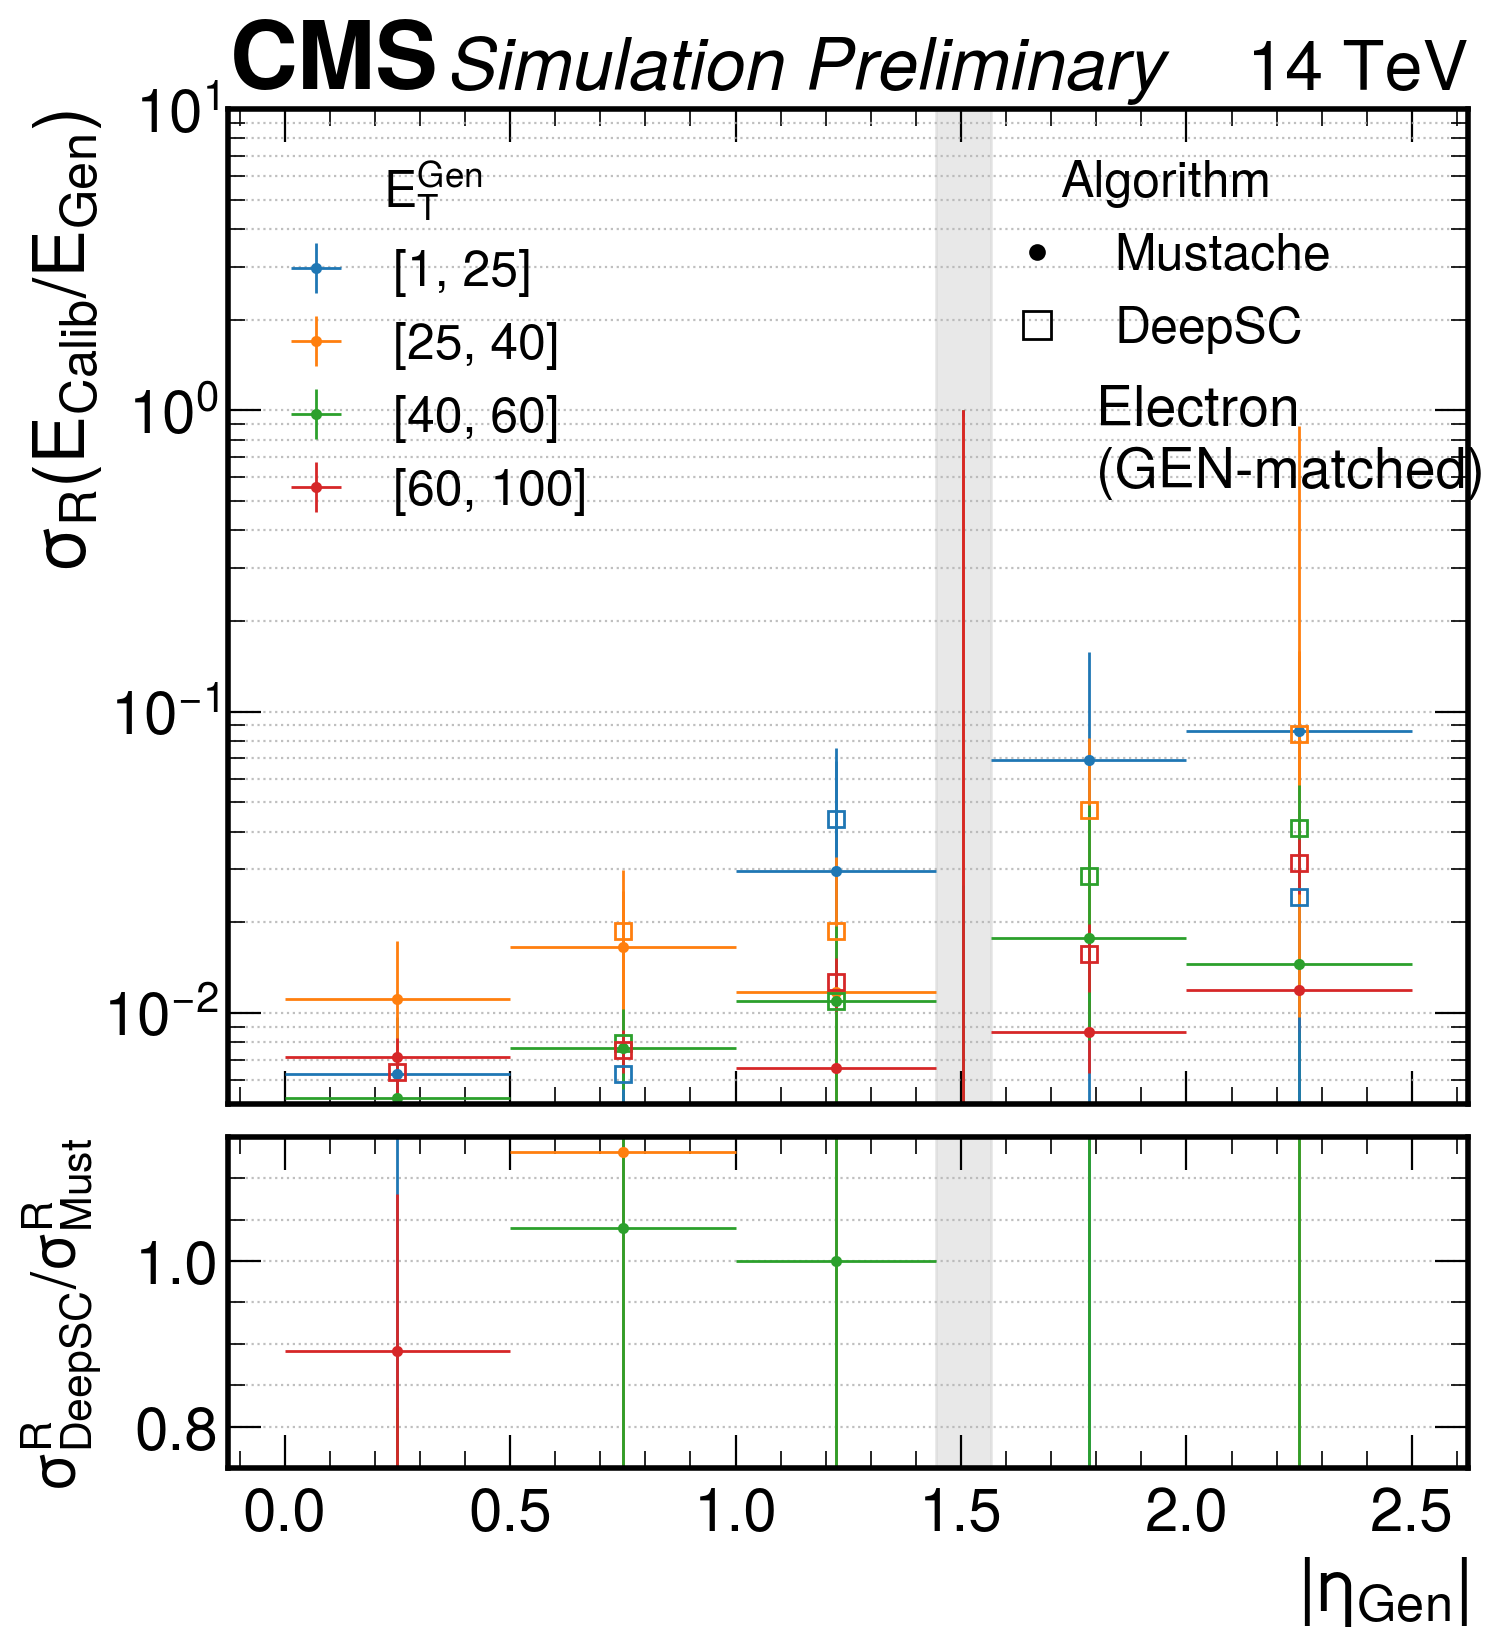

In [45]:
res_d, res_m = do_plot(name="ele_gen_matched_corr_cruijff_sigmaR",
        df1=dfm_1, 
        df2=dfm_2,
        res_var1="Ele_Ecorr_ov_EGen", 
        res_var2="Ele_Ecorr_ov_EGen",
        bins1=[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        bins2=[1,25, 40, 60,100], 
        binlabel1="eta",
        binlabel2="et",
        binleg="$E_T^{Gen}$", 
        binvar1="ele_eta", 
        binvar2="calo_et_gen", 
        nbins_fit=300, 
        prange=0.96, 
        exclude_x_bin=3, 
        general_label="Electron \n(GEN-matched)", 
        xlabel="$|\eta_{Gen}|$", 
        ylabel="$\sigma_R (E_{Calib}/E_{Gen})$",
        ylabelratio="$\sigma^R_{DeepSC}/\sigma^R_{Must}$", 
        yvar="sigmaR",
        bin_analysis="cruijff",
        yvar_err="sigmaR_err",
        ylims1=(5e-3,1e1),
        ylims2=(0.75, 1.15),
        fill_between=[1.4442, 1.566],
        output_folder=output_folder, 
        plot_fits=True)